In [7]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

## Camera Calibration

### 1. Briefly state how you computed the camera matrix and distortion coefficients. 



Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
Provide an example of a distortion corrected calibration image.

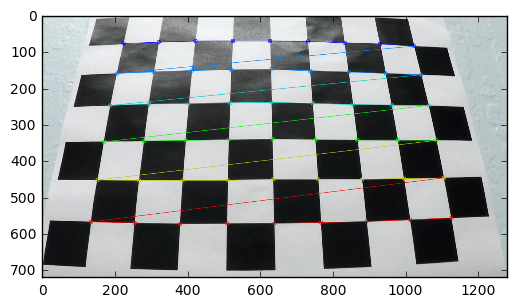

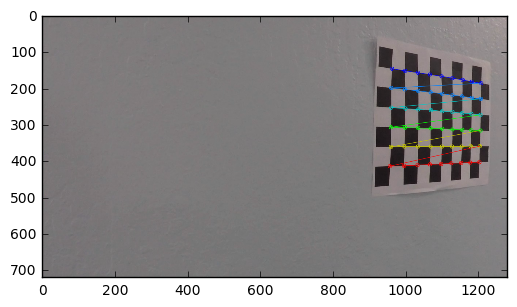

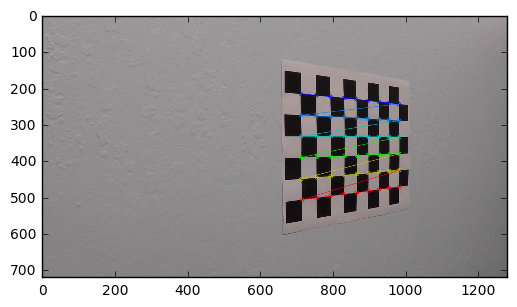

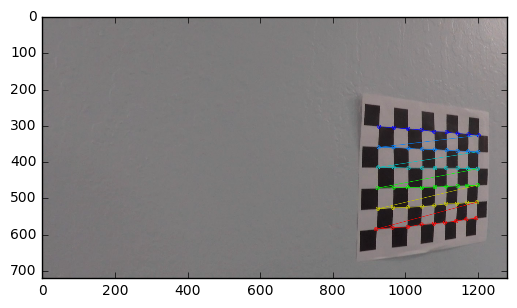

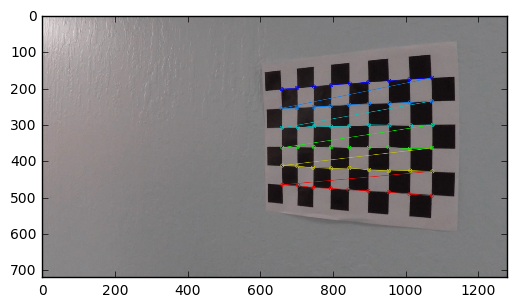

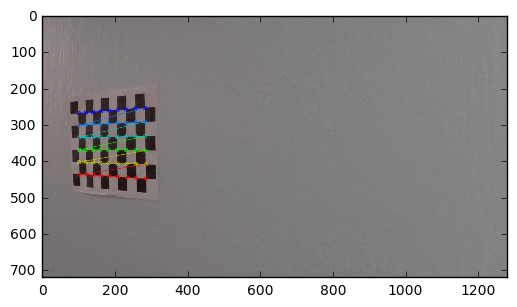

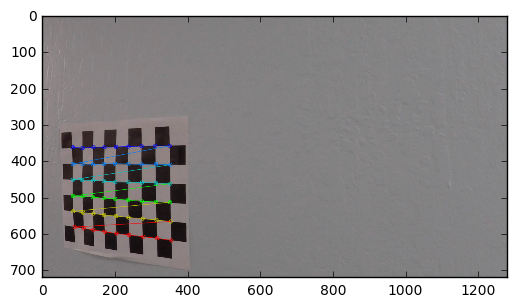

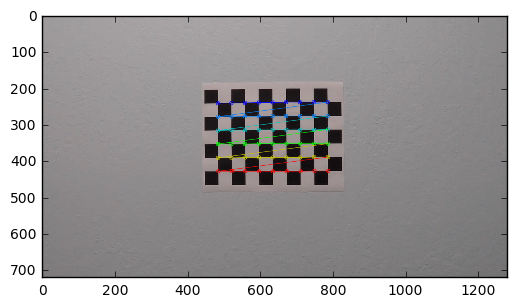

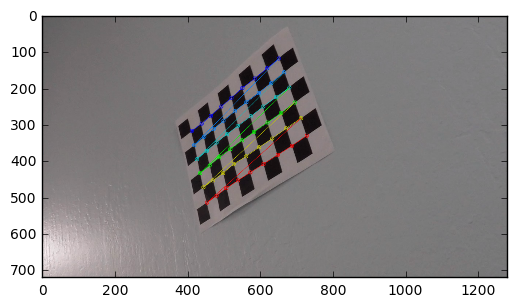

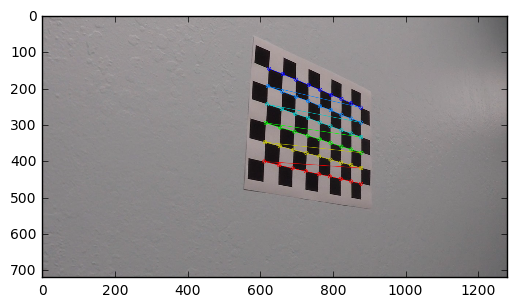

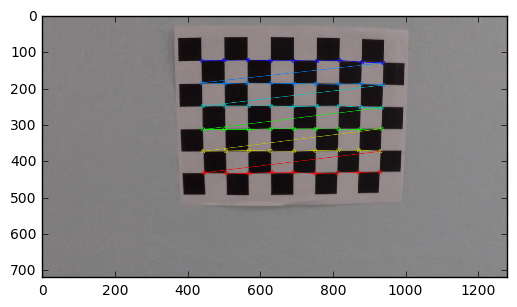

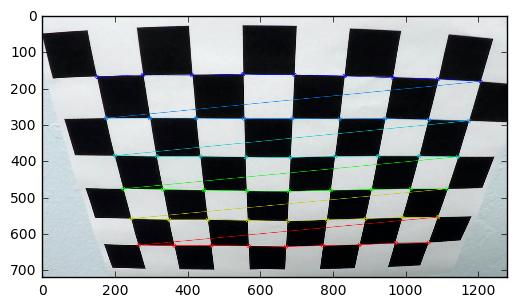

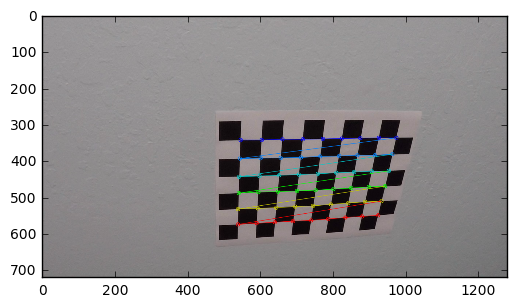

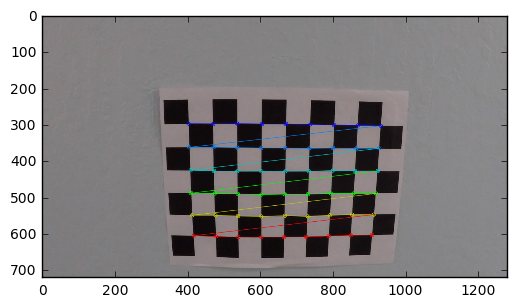

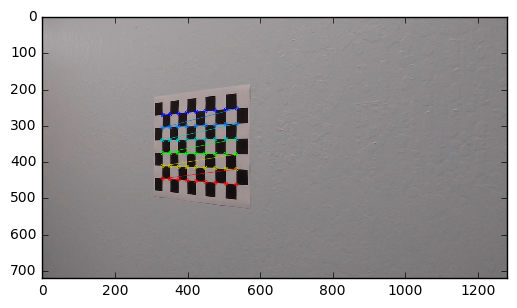

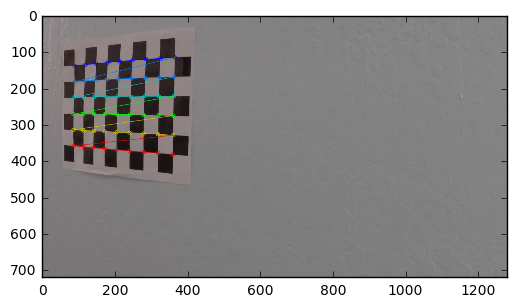

In [8]:

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)
        plt.show()
        

ret, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
def cal_undistort(img, cameraMatrix, distCoeffs):
    # Use cv2.calibrateCamera() and cv2.undistort()
    undist = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix)
    return undist



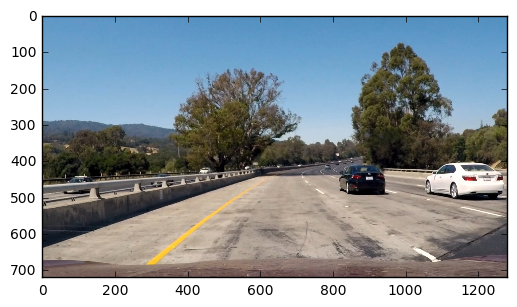

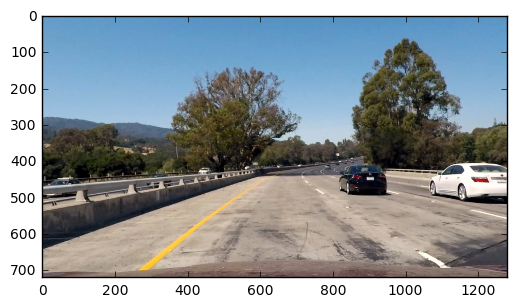

In [9]:
example_image = plt.imread('./test_images/test1.jpg')
plt.imshow(example_image)
plt.show()
img_undist = cal_undistort(example_image, cameraMatrix, distCoeffs)
plt.imshow(img_undist)
plt.show()

#### 2. Creating a thresholded binary image.

In [42]:
class WidgetCom:
    """ Stores data for handling with interactive widget """
    value = dict()
WidgetCom.value['mutex'] = False
WidgetCom.value['image'] = img_undist
WidgetCom.value['H_chan_min'] = 10
WidgetCom.value['H_chan_max'] = 30
WidgetCom.value['S_chan_min'] = 60
WidgetCom.value['V_chan_min'] = 80
WidgetCom.value['gray_min'] = 190
WidgetCom.value['sobel_angle_min'] = -15.0
WidgetCom.value['sobel_angle_max'] = 15.0
WidgetCom.value['sobel_mag'] = 70
WidgetCom.value['clipLimit'] = 2 # CLAHE histogram
WidgetCom.value['tileGridSize'] = 8 # CLAHE histogram
WidgetCom.value['sobel_mag'] = 70
WidgetCom.value['image'] = img_undist
# Hmin : 15
# Hmax : 30
# Smin : 60
# Vmin : 80
# gray : 190

In [75]:
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html
# Using widget to help calibrating computer vision parameters
    
def handle_slider_h_chan_min_change(change):
    WidgetCom.value['H_chan_min'] = change.new
    display_image()    
        
def handle_slider_h_chan_max_change(change):
    WidgetCom.value['H_chan_max'] = change.new
    display_image()
    
def handle_slider_s_chan_change(change):
    WidgetCom.value['S_chan_min'] = change.new
    display_image()
    
def handle_slider_v_chan_change(change):
    WidgetCom.value['V_chan_min'] = change.new
    display_image()
    
def handle_slider_gray_min_change(change):
    WidgetCom.value['gray_min'] = change.new
    display_image()
    
def handle_slider_sobel_angle_min_change(change):
    WidgetCom.value['sobel_angle_min'] = change.new
    display_image()
    
def handle_slider_sobel_angle_max_change(change):
    WidgetCom.value['sobel_angle_max'] = change.new
    display_image()
    
def handle_slider_sobel_mag_change(change):
    WidgetCom.value['sobel_mag'] = change.new
    display_image()
    
def handle_slider_clipLimit_clahe_change(change):
    WidgetCom.value['clipLimit'] = change.new
    display_image()
    
def handle_slider_tileGridSize_clahe_change(change):
    WidgetCom.value['tileGridSize'] = change.new
    display_image()
    
from ipywidgets import widgets
slider_h_min_chan = widgets.IntSlider(min=0, max=128, value=WidgetCom.value['H_chan_min'], description='H min')
slider_h_max_chan = widgets.IntSlider(min=0, max=128, value=WidgetCom.value['H_chan_max'], description='H max')
slider_s_chan = widgets.IntSlider(min=0, max=255, value=WidgetCom.value['S_chan_min'], description='S min')
slider_v_chan = widgets.IntSlider(min=0, max=255, value=WidgetCom.value['V_chan_min'], description='V min')
slider_gray_min = widgets.IntSlider(min=0, max=255, value=WidgetCom.value['gray_min'], description='gray')
slider_sobel_angle_min = widgets.FloatSlider(min=-45, max=45, value=WidgetCom.value['sobel_angle_min'], description='sobel angle min')
slider_sobel_angle_max = widgets.FloatSlider(min=-45, max=45, value=WidgetCom.value['sobel_angle_max'], description='sobel angle max')
slider_sobel_mag = widgets.FloatSlider(min=0.1, max=100, value=WidgetCom.value['sobel_mag'], description='sobel mag')
slider_tileGridSize_clahe_mag = widgets.IntSlider(min=8, max=512, value=WidgetCom.value['tileGridSize'], description='tileGridSize')
slider_clipLimit_clahe_mag = widgets.IntSlider(min=1, max=256.0, value=WidgetCom.value['clipLimit'], description='clipLimit')

slider_h_min_chan.observe(handle_slider_h_chan_min_change, names='value')
slider_h_max_chan.observe(handle_slider_h_chan_max_change, names='value')
slider_s_chan.observe(handle_slider_s_chan_change, names='value')
slider_v_chan.observe(handle_slider_v_chan_change, names='value')
slider_gray_min.observe(handle_slider_gray_min_change, names='value')
slider_sobel_angle_min.observe(handle_slider_sobel_angle_min_change, names='value')
slider_sobel_angle_max.observe(handle_slider_sobel_angle_max_change, names='value')
slider_sobel_mag.observe(handle_slider_sobel_mag_change, names='value')
slider_tileGridSize_clahe_mag.observe(handle_slider_tileGridSize_clahe_change, names='value')
slider_clipLimit_clahe_mag.observe(handle_slider_tileGridSize_clahe_change, names='value')

In [76]:
# Let's get the yellow in the image
def segment_image(img_undist, S_chan_min,V_chan_min, gray_min):
    
    # Let's perform some histogram based brightness compensation
    img_yuv = cv2.cvtColor(img_undist, cv2.COLOR_RGB2YUV)
    gray = img_yuv[:,:,0]
    clahe = cv2.createCLAHE(clipLimit=WidgetCom.value['clipLimit'], 
                            tileGridSize=(WidgetCom.value['tileGridSize'] ,WidgetCom.value['tileGridSize'] ))
    gray_clahe = clahe.apply(gray)
    mask = np.uint8(gray_clahe>gray_min)*255
    
    #plt.imshow(np.hstack((gray,gray_clahe)), cmap='gray')
    #plt.show()
    
    img_yuv[:,:,0] = gray_clahe
    img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    
    im_white = cv2.bitwise_and(img,img, mask= mask)
    
    
    # Look for yellow, for color segmentation
    lower_yellow = np.array([WidgetCom.value['H_chan_min'], S_chan_min, V_chan_min], np.uint8)
    upper_yellow = np.array([WidgetCom.value['H_chan_max'], 255, 255], np.uint8)

    # Calculate mask for color segmentation
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
    im_yellow = cv2.bitwise_and(img,img, mask= mask)
    
    #im_white = cv2.bitwise_and(im_white,im_white, mask= gray_slice)
    return np.clip(im_white.astype('uint16')//2+ im_yellow.astype('uint16')//2,
                   0,255).astype('uint8')

def sobel_angle_image(img, thresh_min, thresh_max, mag_thresh):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mask_mag = np.zeros_like(gradmag).astype('uint8')
    mask_mag[gradmag >= mag_thresh] = 1
    
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    absgraddir = np.float32(absgraddir)*180.0/np.pi
    #binary_output =  np.zeros_like(absgraddir).astype('uint8')
    direction_im = np.bitwise_and((absgraddir>thresh_min).astype('uint8'),
                                   (absgraddir<thresh_max).astype('uint8')).astype('uint8')
    
    binary_output = cv2.bitwise_and(direction_im,mask_mag, mask=mask_mag)
    
    #print('thresh_min:',thresh_min,'thresh_max:', thresh_max)
    #print('absgraddir:',np.max(absgraddir),np.min(absgraddir))
    #print('direction_im',np.max(direction_im),np.min(direction_im))
    return binary_output*1.0



# Let's get the yellow in the image


import time
from IPython import display
def compute_image(image):
    S_chan_min = WidgetCom.value['S_chan_min']
    V_chan_min = WidgetCom.value['V_chan_min']
    gray_min =   WidgetCom.value['gray_min']
    thresh_min = WidgetCom.value['sobel_angle_min']
    thresh_max = WidgetCom.value['sobel_angle_max']
    mag_thresh = WidgetCom.value['sobel_mag']
    img = segment_image(image, S_chan_min, V_chan_min, gray_min)
    edge_img = sobel_angle_image(img, thresh_min, thresh_max, mag_thresh)
    return img, edge_img
        
def display_image():
    if WidgetCom.value['mutex'] == False:
        WidgetCom.value['mutex'] = True
        
        img, edge_img = compute_image(WidgetCom.value['image'])

        fig = plt.figure(figsize=(8, 5))
        ax = fig.add_subplot(1, 3, 1)
        plt.title('Original Image')
        ax.imshow(WidgetCom.value['image'])
        ax = fig.add_subplot(1, 3, 2)
        plt.title('Masked Image')
        ax.imshow(img)
        ax = fig.add_subplot(1, 3, 3)
        ax.imshow(edge_img, cmap='gray')
        plt.title('Edges')
        plt.show()
        plt.close(fig)
        display.clear_output(wait=True)
        WidgetCom.value['mutex'] = False
    
    

In [77]:
# Display interactive sliders
from IPython import display
from ipywidgets import HBox

display.display(HBox([slider_h_min_chan, slider_h_max_chan, slider_tileGridSize_clahe_mag, slider_clipLimit_clahe_mag]))
display.display(HBox([slider_s_chan, slider_v_chan, slider_gray_min, ]))
display.display(HBox([slider_sobel_angle_min, slider_sobel_angle_max, slider_sobel_mag]))


Transformation matrix: 
 [[ -5.94642857e-02  -4.75200893e-01   2.37026429e+02]
 [ -4.29344060e-17   1.11383929e-01  -7.58750000e+01]
 [  8.18572640e-18  -2.38839286e-03   1.00000000e+00]]

Transformation matrix inverse: 
 [[ -1.68168168e+01  -2.18920452e+01   2.32497110e+03]
 [ -1.39224134e-13  -1.43193895e+01  -1.08648368e+03]
 [ -1.94864065e-16  -3.42003276e-02  -1.59494986e+00]]


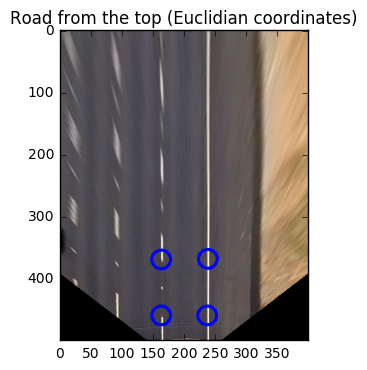

In [78]:
# Find PROJECTIVE transform for the road to find better masking region
# On an highway we could assume for this exercise (not safe in real car, just like masking with a 
# a triangle, that the lines should be fairly parallel to the direction of the vehicle.
# Minimum lane width: Minimum lane width of 12 feet (3.7 m)
# Each dashed line measures 10 feet (3.0 m), and the empty spaces in-between measure 30 feet (9.0m).


example_image = plt.imread('./test_images/straight_lines2.jpg')
#plt.imshow(example_image)
#plt.show()
img_undist = cal_undistort(example_image, cameraMatrix, distCoeffs)
plt.imshow(img_undist)

image_proj_work = img_undist.copy()
plt.imshow(image_proj_work)
plt.title('Camera view (Added markers on lanes to find distances)')

# Mark known points in image
points_px = np.float32( [ [436, 560], [540, 488],   [856, 560], [746, 488] ] )
plt.scatter(points_px[0][0], points_px[0][1], s=50, c='blue', marker='x')
plt.scatter(points_px[1][0], points_px[1][1], s=50, c='blue', marker='x')
plt.scatter(points_px[2][0], points_px[2][1], s=50, c='blue', marker='x')
plt.scatter(points_px[3][0], points_px[3][1], s=50, c='blue', marker='x')
plt.show()

# Points in meters
pt_distance_to_car = 4.0
dash_line_len = 9.0
lane_width = 3.7
center_of_car = 20
points_dest_px = np.float32( [ [center_of_car-lane_width, pt_distance_to_car],
                        [center_of_car-lane_width, pt_distance_to_car+dash_line_len],
                        [center_of_car+lane_width, pt_distance_to_car],
                        [center_of_car+lane_width, pt_distance_to_car+dash_line_len] ] )
meters_to_px = 10.0
points_m = meters_to_px * points_dest_px

transfM = cv2.getPerspectiveTransform(points_px,points_m)
print('\nTransformation matrix: \n', transfM)

transfMInv = np.linalg.inv(transfM)
print('\nTransformation matrix inverse: \n', transfMInv)

wrappedIm = cv2.warpPerspective(image_proj_work, transfM, (center_of_car*2*int(meters_to_px),500))


plt.imshow(wrappedIm)
plt.title('Road from the top (Euclidian coordinates)')

#cv2.imwrite('foo.png',wrappedIm)
radius = 15
color_circle = (0,0,255)
thickness = 4
wrappedIm_copy = wrappedIm.copy()

for line in range(points_px.shape[0]):
    points_dest_px2 = np.matmul(transfM, np.concatenate((points_px[line],[1]), axis=0)[np.newaxis].T)
    points_dest_px2 = points_dest_px2/points_dest_px2[2]
    wrappedIm = cv2.circle(wrappedIm, tuple(points_dest_px2[0:2]), radius, color_circle,thickness)

wrappedIm = cv2.flip(wrappedIm,0) #Vertical flip

plt.imshow(wrappedIm)
plt.show()


In [79]:
# Saving calibration data in "static" object for kater global access
class CameraCalibration:
    """
    Saving calibration data in "static" object for kater global access.
    Description of the dictionary field 'value' 
        cameraMatrix: camera matrix
        distCoeffs : camera distorsion coefficients
        transfM : transformation matrix (from pixels to 0.1 meters on the road), use on undistorted image
        transfMInv : transformation matrix inverse (from pixels to 0.1 meters on the road)
        center_of_car : Lateral position of car in the lane
    """
    value = dict()
    def undistort(img):
        """
        Undistort image using the cameraMatrix and the distorsion coefficients
        """
        undist = cv2.undistort(img, CameraCalibration.value['cameraMatrix'], 
                               CameraCalibration.value['distCoeffs'], None,
                               CameraCalibration.value['cameraMatrix'])
        return undist
    def birdview(img):
        """
        Apply wrap perspective transform to undistorted image
        """
        wrappedIm = cv2.warpPerspective(img, CameraCalibration.value['transfM'], 
                                        (CameraCalibration.value['center_of_car'] * 
                                         2*int(CameraCalibration.value['meters_to_px']),500))
        return wrappedIm

# Initialize camera calibration parameter (see parameter definitions above)
CameraCalibration.value['cameraMatrix'] = cameraMatrix
CameraCalibration.value['distCoeffs'] = distCoeffs
CameraCalibration.value['transfM'] = transfM
CameraCalibration.value['transfMInv'] = transfMInv
CameraCalibration.value['center_of_car'] = center_of_car 
CameraCalibration.value['meters_to_px'] = meters_to_px 


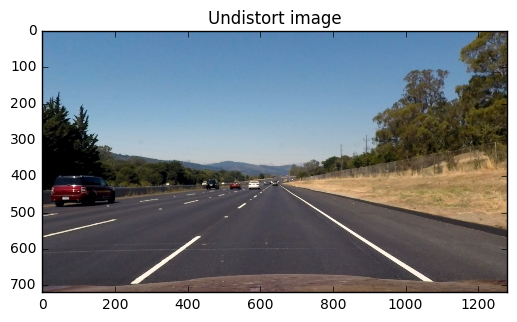

In [80]:
# Testing undistort function
plt.imshow(CameraCalibration.undistort(example_image))
plt.title('Undistort image')
plt.show()
plt.imshow(CameraCalibration.birdview(CameraCalibration.undistort(example_image)))
plt.title('Apply wrap perspective transform')
plt.show()

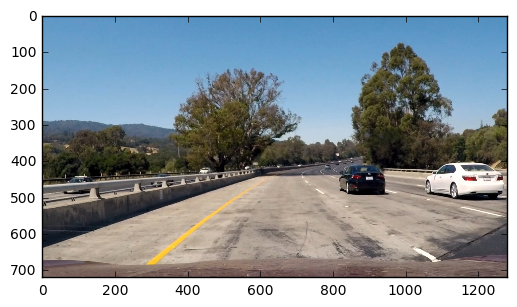

In [81]:
example_image = plt.imread('./test_images/test1.jpg')
#example_image = plt.imread('./test_images/test2.jpg')
#example_image = plt.imread('./test_images/straight_lines2.jpg')
plt.imshow(example_image)
plt.show()

In [84]:
example_image = plt.imread('./test_images/test4.jpg')

from ipywidgets import HBox
WidgetCom.value['image'] = CameraCalibration.birdview(CameraCalibration.undistort(example_image))
boxColor = HBox([slider_h_min_chan, slider_h_max_chan, slider_tileGridSize_clahe_mag, slider_clipLimit_clahe_mag])
boxSV = HBox([slider_s_chan, slider_v_chan,slider_gray_min])
boxSobel = HBox([slider_sobel_angle_min, slider_sobel_angle_max, slider_sobel_mag])

display.display(boxColor,boxSV, boxSobel)


# Experimenting with histogram
# Hmin : 14
# Hmax : 25
# Smin : 81
# Vmin : 188
# gray : 215
# tileGridSize: 170
# clipLimit : 17
# sobel mag : 40


./test_images/straight_lines2.jpg


./test_images/test1.jpg


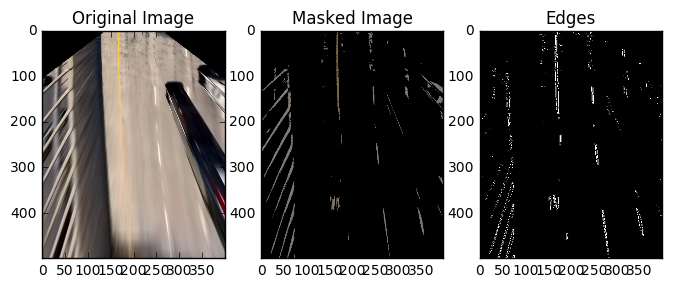

./test_images/test6.jpg


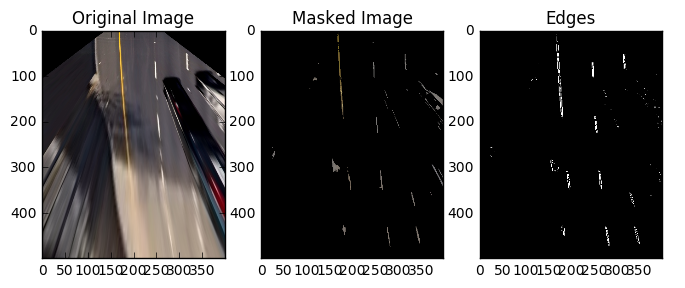

./test_images/test3.jpg


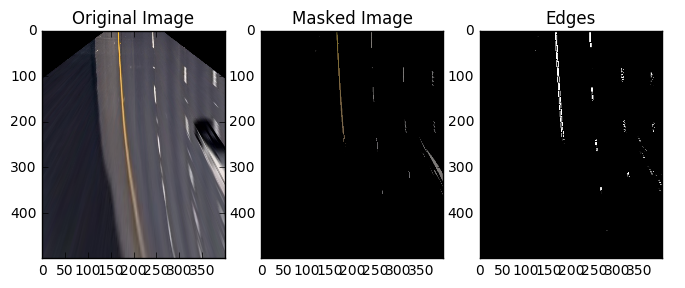

./test_images/test2.jpg


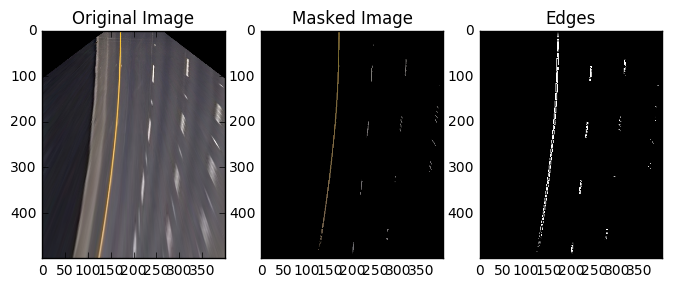

./test_images/test5.jpg


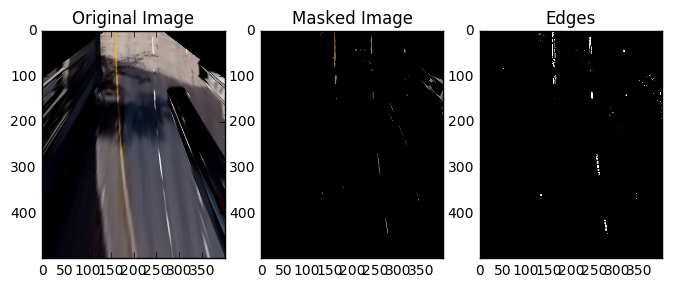

./test_images/test4.jpg


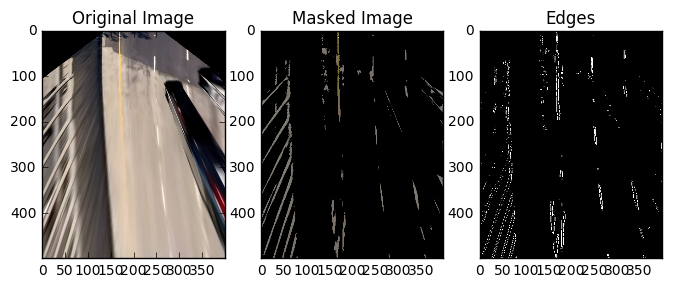

./test_images/straight_lines1.jpg


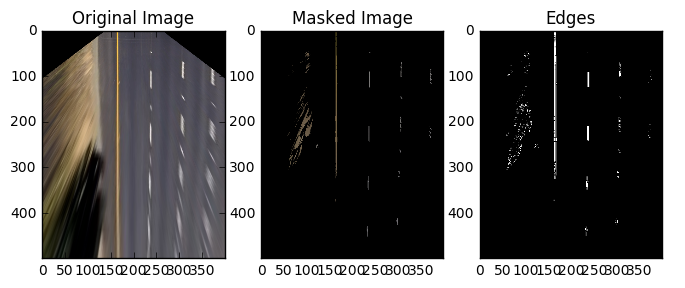

In [85]:
## Display all test images
list_images = glob.glob('./test_images/*.jpg')

for image_file in list_images:
    print(image_file)
    image = plt.imread(image_file)
    WidgetCom.value['image'] = CameraCalibration.birdview(CameraCalibration.undistort(image))

    img, edge_img = compute_image(WidgetCom.value['image'])

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 3, 1)
    plt.title('Original Image')
    ax.imshow(WidgetCom.value['image'])
    ax = fig.add_subplot(1, 3, 2)
    plt.title('Masked Image')
    ax.imshow(img)
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(edge_img, cmap='gray')
    plt.title('Edges')
    plt.show()
    plt.close(fig)

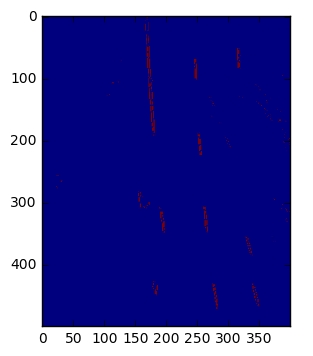

Image shape: (500, 400)


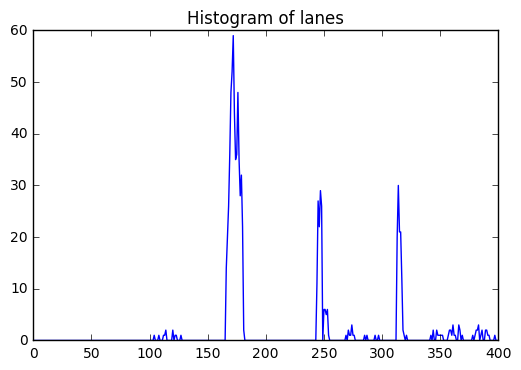

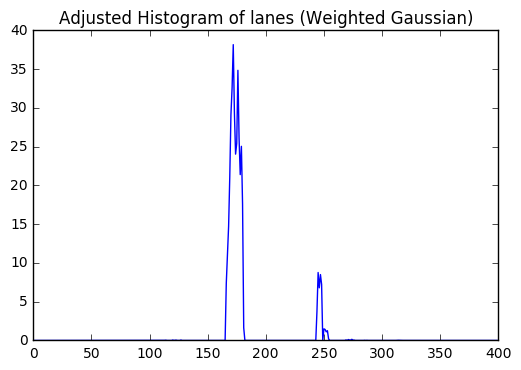

Left lane position : 172
Right lane position : 245


In [96]:


image = plt.imread('./test_images/test6.jpg')
birdview_img = CameraCalibration.birdview(CameraCalibration.undistort(image))
img, edge_img = compute_image(birdview_img)

def find_lanes_peaks(edge_img,debug=False):
    binary_warped = edge_img.astype('uint8')
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    #histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    histogram = np.sum(binary_warped[:binary_warped.shape[1]//2,:], axis=0)

    
    if debug:
        plt.imshow(binary_warped)
        plt.show()
        print('Image shape:',binary_warped.shape)
        plt.plot(histogram)
        plt.title('Histogram of lanes')
        plt.show()
        
    x = np.arange(histogram.shape[0])

    def gaussian(x, mu, sig):
        return np.exp(-np.square(x - mu) / (2 * np.square(sig)))

    histogram_gauss = histogram*(gaussian(x,histogram.shape[0]/2,30))

    if debug:
        plt.plot(x,histogram_gauss)
        plt.title('Adjusted Histogram of lanes (Weighted Gaussian)')
        plt.show()

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram_gauss.shape[0]/2)
    leftx_base = np.argmax(histogram_gauss[:midpoint])
    rightx_base = np.argmax(histogram_gauss[midpoint:]) + midpoint
    if debug:
        print('Left lane position :',leftx_base)
        print('Right lane position :',rightx_base)
    
    return binary_warped, leftx_base, rightx_base, histogram_gauss

binary_warped,leftx_base, rightx_base, histogram_gauss = find_lanes_peaks(edge_img,debug=True)

[ -1.07386684e-04   9.60373955e-02   1.64632563e+02]
[  1.49602793e-04   6.48507950e-03   2.44698905e+02]
[ -1.07386684e-04   9.60373955e-02   1.64632563e+02]
[  1.49602793e-04   6.48507950e-03   2.44698905e+02]


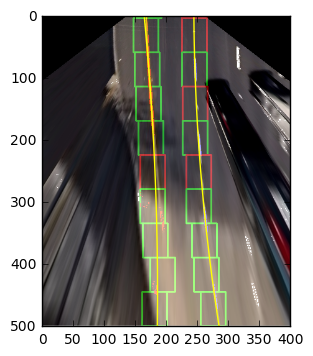

In [107]:

def lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss, debug=True):
    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 20
    # Set minimum number of pixels found to recenter window
    minpix = 10
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Window color
    found_lane_color =  (0,255,0)
    no_lane_color =  (255,0,0)
    
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255

    # Step through the windows one by one
    for window in range(nwindows, -1, -1):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                          (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                           (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)


        left_window_color =  right_window_color = no_lane_color
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            left_window_color = found_lane_color
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
            right_window_color = found_lane_color
            
        """if len(good_left_inds) > minpix and not len(good_right_inds) > minpix:
            # Draw circles
            radius = 15
            color_circle = (0,0,255)
            thickness = 4
            wrappedIm = cv2.circle(wrappedIm, tuple(points_dest_px2[0:2]), radius, color_circle,thickness)"""
            
        # Draw the windows on the visualization image
        out_img = cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),left_window_color, 2) 
        out_img = cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),right_window_color, 2) 

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    if debug:
        print(left_fit)
        print(right_fit)

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    out_img = cv2.addWeighted(out_img,0.5,birdview_img,0.9,0)

    
    return left_fit, right_fit, out_img



def generate_plot_points(binary_warped, left_fit, right_fit):
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    return ploty, left_fitx, right_fitx

left_fit, right_fit,  out_img = lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss)
ploty, left_fitx, right_fitx = generate_plot_points(binary_warped, left_fit, right_fit)
print(left_fit)
print(right_fit)
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, binary_warped.shape[1] )
plt.ylim(binary_warped.shape[0], 0)
plt.show()

In [108]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
def poly_envelope_lane_search(binary_warped, left_fit, right_fit):
    
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    margin = 25
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty, left_fitx, right_fitx = generate_plot_points(binary_warped, left_fit, right_fit)
    return left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty

left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty = poly_envelope_lane_search(binary_warped, left_fit, right_fit)

In [109]:
# Create an image to draw on and an image to show the selection window
def draw_poly_search (binary_warped, left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty, debug=False):
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    #out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    #out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty,rightx] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    margin = 20
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    if debug:
        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
        plt.imshow(result)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, binary_warped.shape[1] )
        plt.ylim(binary_warped.shape[0], 0)


draw_poly_search (binary_warped, left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty)

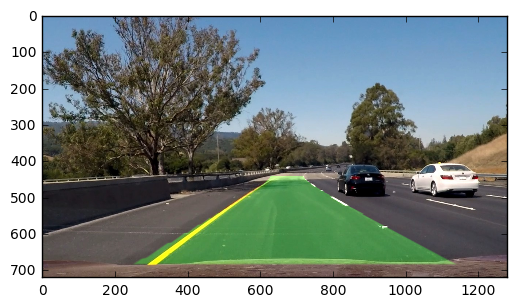

In [100]:
def add_overlay_on_frame(image, binary_warped, left_fitx, right_fitx, ploty):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))*0
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    color_warp = cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    #plt.imshow(color_warp)
    #plt.show()

    # Warp the blank back to original image space using inverse perspective matrix
    newwarp = cv2.warpPerspective(color_warp, CameraCalibration.value['transfMInv'], (image.shape[1], image.shape[0])) 
    
    # Combine the result with the original image
    image = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
    return image
    
result = add_overlay_on_frame(image, binary_warped, left_fitx, right_fitx, ploty)

plt.imshow(result)
plt.show()

In [165]:
class Filter:
    value = dict()
    
    def apply(left_fit, right_fit):
        Filter.value['left_fit_list'].append(left_fit)
        Filter.value['right_fit_list'].append(right_fit)
        print('In = :', left_fit)
        if len(Filter.value['left_fit_list'])>len(Filter.value['coeffs']):
            del Filter.value['left_fit_list'][0]
            del Filter.value['right_fit_list'][0]
            left_fit = np.zeros(3)
            right_fit = np.zeros(3)
            for lfit, rfit, coeff in zip(Filter.value['left_fit_list'], 
                                  Filter.value['right_fit_list'], Filter.value['coeffs']):
                left_fit  = left_fit + lfit*coeff
                right_fit = right_fit + rfit*coeff
            Filter.value['left_fit_list'][-1] = left_fit
            Filter.value['right_fit_list'][-1] = right_fit  
        
        print('Out = :', left_fit)
        return left_fit, right_fit
            
Filter.value['left_fit_list'] = list()
Filter.value['right_fit_list'] = list()
Filter.value['coeffs'] = [0.99, 0.01]

# Define callback for processing image
def process_image(image):
    image = CameraCalibration.undistort(image)
    birdview_img = CameraCalibration.birdview(image)
    img, edge_img = compute_image(birdview_img)
    binary_warped,leftx_base, rightx_base, histogram_gauss = find_lanes_peaks(edge_img,debug=False)
    
    try:
        left_fit, right_fit,  out_img = lane_sliding_window(binary_warped,leftx_base, rightx_base, histogram_gauss,debug=False)
        left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty = poly_envelope_lane_search(binary_warped, left_fit, right_fit)
    except Exception:
        left_fit =  Filter.value['left_fit_list'][-1]
        right_fit = Filter.value['right_fit_list'][-1]
        
    left_fit, right_fit = Filter.apply(left_fit, right_fit)
        
    ploty, left_fitx, right_fitx = generate_plot_points(binary_warped, left_fit, right_fit)
    
    #draw_poly_search (binary_warped, left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty)
    result = add_overlay_on_frame(image, binary_warped, left_fitx, right_fitx, ploty)
    
    return result


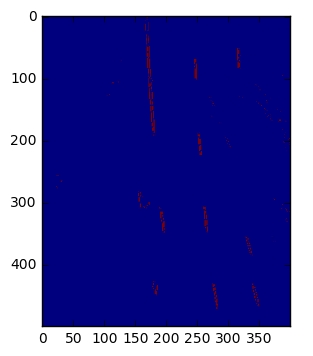

In = : [ -1.07386684e-04   9.60373955e-02   1.64632563e+02]
Out = : [ -1.07386684e-04   9.60373955e-02   1.64632563e+02]


In [166]:

image = plt.imread('./test_images/test6.jpg')
plt.clf()
plt.imshow((binary_warped))
plt.show()
result = process_image(image)
plt.clf()
plt.imshow(result)
plt.show()

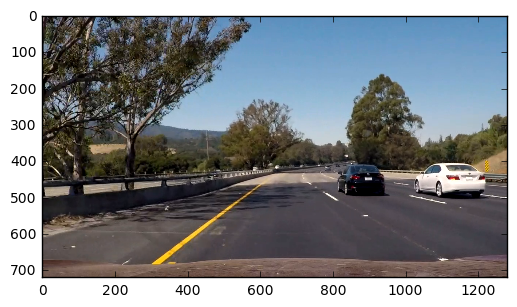

In = : [ -2.10457988e-04   9.85545188e-02   1.65175729e+02]
Out = : [ -2.10457988e-04   9.85545188e-02   1.65175729e+02]


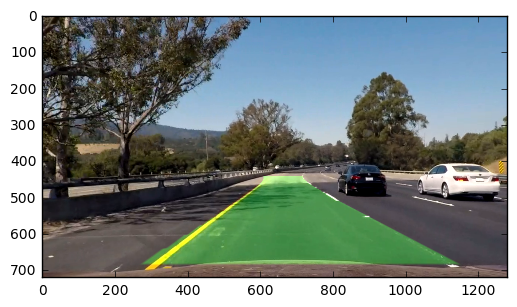


 59%|█████▊    | 738/1261 [01:19<00:56,  9.27it/s]

In [167]:
# Extract difficult image from extra challenge
from moviepy.editor import VideoFileClip
clip1 = VideoFileClip("project_video.mp4")
image = clip1.get_frame(39)
plt.clf()
plt.imshow(image)
plt.show()

result = process_image(image)
plt.clf()
plt.imshow(result)
plt.show()

In [170]:
from moviepy.editor import VideoFileClip
clip1 = VideoFileClip("project_video.mp4")
video_output = './output_images/project_video.mp4'

Filter.value['left_fit_list'] = list()
Filter.value['right_fit_list'] = list()
Filter.value['coeffs'] = [0.9, 0.1]

white_clip = clip1.fl_image(process_image)

%time white_clip.write_videofile(video_output, audio=False)

In = : [ -1.72933788e-04  -5.26280537e-03   1.69756350e+02]
Out = : [ -1.72933788e-04  -5.26280537e-03   1.69756350e+02]
[MoviePy] >>>> Building video ./output_images/project_video.mp4
[MoviePy] Writing video ./output_images/project_video.mp4




  0%|          | 0/1261 [00:00<?, ?it/s]

  0%|          | 2/1261 [00:00<01:24, 14.84it/s]

In = : [ -1.72933788e-04  -5.26280537e-03   1.69756350e+02]
Out = : [ -1.72933788e-04  -5.26280537e-03   1.69756350e+02]
In = : [ -1.80386268e-04  -3.10418171e-03   1.69739757e+02]
Out = : [ -1.73679036e-04  -5.04694300e-03   1.69754691e+02]




  0%|          | 3/1261 [00:00<01:46, 11.82it/s]

In = : [ -1.85824771e-04  -1.80706261e-03   1.69743105e+02]
Out = : [ -1.74893610e-04  -4.72295497e-03   1.69753532e+02]




  0%|          | 5/1261 [00:00<01:36, 12.97it/s]

In = : [ -1.85047513e-04  -3.23846628e-03   1.69969996e+02]
Out = : [ -1.75909000e-04  -4.57450610e-03   1.69775179e+02]
In = : [ -1.85076570e-04  -3.86748552e-03   1.69995366e+02]
Out = : [ -1.76825757e-04  -4.50380404e-03   1.69797197e+02]
In = : [ -1.81906617e-04  -6.78034324e-03   1.70405169e+02]
Out = : [ -1.77333843e-04  -4.73145796e-03   1.69857995e+02]




  1%|          | 7/1261 [00:00<01:31, 13.71it/s]

In = : [ -1.76666925e-04  -9.25004694e-03   1.70467159e+02]
Out = : [ -1.77267151e-04  -5.18331686e-03   1.69918911e+02]




  1%|          | 9/1261 [00:00<01:27, 14.34it/s]

In = : [ -1.78329796e-04  -1.03361276e-02   1.70726229e+02]
Out = : [ -1.77373416e-04  -5.69859793e-03   1.69999643e+02]
In = : [ -1.69986175e-04  -1.32007958e-02   1.70601331e+02]
Out = : [ -1.76634691e-04  -6.44881772e-03   1.70059812e+02]
In = : [ -1.67711453e-04  -1.49084883e-02   1.70570713e+02]
Out = : [ -1.75742368e-04  -7.29478477e-03   1.70110902e+02]




  1%|          | 11/1261 [00:00<01:27, 14.22it/s]

  1%|          | 13/1261 [00:00<01:22, 15.09it/s]

In = : [ -1.69287320e-04  -1.54007627e-02   1.70654036e+02]
Out = : [ -1.75096863e-04  -8.10538257e-03   1.70165215e+02]
In = : [ -1.49677617e-04  -2.26397317e-02   1.70454466e+02]
Out = : [ -1.72554938e-04  -9.55881748e-03   1.70194140e+02]
In = : [ -1.57199843e-04  -2.07874310e-02   1.70363429e+02]
Out = : [ -1.71019429e-04  -1.06816788e-02   1.70211069e+02]
In = : [ -1.62844529e-04  -1.92300588e-02   1.70223069e+02]
Out = : [ -1.70201939e-04  -1.15365168e-02   1.70212269e+02]




  1%|          | 15/1261 [00:01<01:21, 15.38it/s]

  1%|▏         | 17/1261 [00:01<01:23, 14.94it/s]

In = : [ -1.79882174e-04  -1.36076578e-02   1.70052111e+02]
Out = : [ -1.71169962e-04  -1.17436309e-02   1.70196253e+02]
In = : [ -1.89278676e-04  -1.08357571e-02   1.70033871e+02]
Out = : [ -1.72980834e-04  -1.16528435e-02   1.70180015e+02]
In = : [ -1.92644305e-04  -1.00768578e-02   1.69908828e+02]
Out = : [ -1.74947181e-04  -1.14952450e-02   1.70152896e+02]




  2%|▏         | 19/1261 [00:01<01:22, 15.01it/s]

In = : [ -1.89041448e-04  -1.12347019e-02   1.69939580e+02]
Out = : [ -1.76356608e-04  -1.14691907e-02   1.70131565e+02]
In = : [ -1.87939171e-04  -1.15092685e-02   1.69662362e+02]
Out = : [ -1.77514864e-04  -1.14731985e-02   1.70084645e+02]
In = : [ -1.83482542e-04  -1.33713795e-02   1.69552376e+02]
Out = : [ -1.78111632e-04  -1.16630166e-02   1.70031418e+02]
In = : [ -1.70891323e-04  -1.72573291e-02   1.69477757e+02]
Out = : [ -1.77389601e-04  -1.22224478e-02   1.69976052e+02]




  2%|▏         | 21/1261 [00:01<01:19, 15.52it/s]

  2%|▏         | 23/1261 [00:01<01:20, 15.37it/s]

In = : [ -1.70883836e-04  -1.69636746e-02   1.69060146e+02]
Out = : [ -1.76739024e-04  -1.26965705e-02   1.69884461e+02]
In = : [ -1.69699863e-04  -1.69515693e-02   1.68776348e+02]
Out = : [ -1.76035108e-04  -1.31220704e-02   1.69773650e+02]
In = : [ -1.86059353e-04  -1.03523517e-02   1.68400570e+02]
Out = : [ -1.77037533e-04  -1.28450985e-02   1.69636342e+02]




  2%|▏         | 25/1261 [00:01<02:15,  9.12it/s]

In = : [ -1.96992868e-04  -6.41720734e-03   1.68262054e+02]
Out = : [ -1.79033066e-04  -1.22023094e-02   1.69498913e+02]
In = : [ -1.92915425e-04  -6.66105300e-03   1.67881861e+02]
Out = : [ -1.80421302e-04  -1.16481837e-02   1.69337208e+02]




  2%|▏         | 27/1261 [00:02<02:26,  8.42it/s]

  2%|▏         | 29/1261 [00:02<02:10,  9.45it/s]

In = : [ -2.02053815e-04  -3.61245674e-03   1.67670338e+02]
Out = : [ -1.82584554e-04  -1.08446110e-02   1.69170521e+02]
In = : [ -1.94587378e-04  -5.51839202e-03   1.67451142e+02]
Out = : [ -1.83784836e-04  -1.03119891e-02   1.68998583e+02]
In = : [ -2.02213375e-04  -3.28031973e-03   1.67564860e+02]
Out = : [ -1.85627690e-04  -9.60882220e-03   1.68855211e+02]




  2%|▏         | 31/1261 [00:02<02:24,  8.52it/s]

In = : [ -2.16474536e-04   1.44813153e-03   1.67527116e+02]
Out = : [ -1.88712375e-04  -8.50312683e-03   1.68722401e+02]
In = : [ -2.40429447e-04   8.86871007e-03   1.67438696e+02]
Out = : [ -1.93884082e-04  -6.76594314e-03   1.68594031e+02]
In = : [ -2.52586364e-04   1.22373538e-02   1.67625904e+02]
Out = : [ -1.99754310e-04  -4.86561345e-03   1.68497218e+02]
In = : [ -2.44256560e-04   9.33865293e-03   1.67680072e+02]
Out = : [ -2.04204535e-04  -3.44518681e-03   1.68415503e+02]




  3%|▎         | 33/1261 [00:02<02:02, 10.05it/s]

  3%|▎         | 35/1261 [00:02<01:55, 10.65it/s]

In = : [ -2.48558479e-04   9.67181819e-03   1.67875519e+02]
Out = : [ -2.08639929e-04  -2.13348631e-03   1.68361505e+02]
In = : [ -2.52390537e-04   9.72358453e-03   1.68051380e+02]
Out = : [ -2.13014990e-04  -9.47779227e-04   1.68330492e+02]
In = : [ -2.61458370e-04   1.13892797e-02   1.68263589e+02]
Out = : [ -2.17859328e-04   2.85926669e-04   1.68323802e+02]
In = : [ -2.66657929e-04   1.22030249e-02   1.68309390e+02]
Out = : [ -2.22739188e-04   1.47763649e-03   1.68322361e+02]




  3%|▎         | 37/1261 [00:03<01:41, 12.01it/s]

  3%|▎         | 39/1261 [00:03<01:35, 12.80it/s]

In = : [ -2.70226599e-04   1.17122624e-02   1.68560496e+02]
Out = : [ -2.27487929e-04   2.50109908e-03   1.68346174e+02]
In = : [ -2.77713574e-04   1.27779350e-02   1.68699110e+02]
Out = : [ -2.32510494e-04   3.52878267e-03   1.68381468e+02]
In = : [ -2.64039713e-04   7.63633006e-03   1.68917437e+02]
Out = : [ -2.35663416e-04   3.93953741e-03   1.68435065e+02]
In = : [ -2.57781638e-04   5.01366585e-03   1.69061263e+02]
Out = : [ -2.37875238e-04   4.04695026e-03   1.68497685e+02]




  3%|▎         | 41/1261 [00:03<01:31, 13.36it/s]

  3%|▎         | 43/1261 [00:03<01:48, 11.18it/s]

In = : [ -2.50007893e-04   1.95744871e-03   1.69182280e+02]
Out = : [ -2.39088503e-04   3.83800010e-03   1.68566144e+02]
In = : [ -2.33036183e-04  -4.54935866e-03   1.69541797e+02]
Out = : [ -2.38483271e-04   2.99926422e-03   1.68663709e+02]




  4%|▎         | 45/1261 [00:03<01:42, 11.91it/s]

In = : [ -2.16834114e-04  -9.73525385e-03   1.69632696e+02]
Out = : [ -2.36318356e-04   1.72581242e-03   1.68760608e+02]
In = : [ -2.06008420e-04  -1.38622807e-02   1.69767718e+02]
Out = : [ -2.33287362e-04   1.67003103e-04   1.68861319e+02]




  4%|▎         | 47/1261 [00:04<02:05,  9.67it/s]

In = : [ -2.02655887e-04  -1.47839194e-02   1.69705242e+02]
Out = : [ -2.30224215e-04  -1.32808914e-03   1.68945711e+02]
In = : [ -1.91526514e-04  -1.84536677e-02   1.69710713e+02]
Out = : [ -2.26354445e-04  -3.04064700e-03   1.69022212e+02]




  4%|▍         | 49/1261 [00:04<02:02,  9.93it/s]

In = : [ -1.88485016e-04  -1.96733189e-02   1.69771668e+02]
Out = : [ -2.22567502e-04  -4.70391419e-03   1.69097157e+02]
In = : [ -1.76337880e-04  -2.36368795e-02   1.69701618e+02]
Out = : [ -2.17944540e-04  -6.59721073e-03   1.69157603e+02]




  4%|▍         | 51/1261 [00:04<02:00, 10.05it/s]

In = : [ -1.73605479e-04  -2.52221644e-02   1.69810937e+02]
Out = : [ -2.13510634e-04  -8.45970610e-03   1.69222937e+02]
In = : [ -1.70318941e-04  -2.62169070e-02   1.69784030e+02]
Out = : [ -2.09191464e-04  -1.02354262e-02   1.69279046e+02]




  4%|▍         | 53/1261 [00:04<01:59, 10.10it/s]

In = : [ -1.74631186e-04  -2.43017898e-02   1.69751608e+02]
Out = : [ -2.05735436e-04  -1.16420625e-02   1.69326302e+02]
In = : [ -1.76884119e-04  -2.36087026e-02   1.69725493e+02]
Out = : [ -2.02850305e-04  -1.28387266e-02   1.69366221e+02]
In = : [ -1.69885525e-04  -2.51092030e-02   1.69706495e+02]
Out = : [ -1.99553827e-04  -1.40657742e-02   1.69400249e+02]




  4%|▍         | 55/1261 [00:04<01:51, 10.86it/s]

In = : [ -1.66916653e-04  -2.55771487e-02   1.69555014e+02]
Out = : [ -1.96290109e-04  -1.52169116e-02   1.69415725e+02]
In = : [ -1.63022595e-04  -2.59043793e-02   1.69366959e+02]
Out = : [ -1.92963358e-04  -1.62856584e-02   1.69410848e+02]
In = : [ -1.63737601e-04  -2.47585407e-02   1.69237727e+02]
Out = : [ -1.90040782e-04  -1.71329466e-02   1.69393536e+02]




  5%|▍         | 57/1261 [00:04<01:54, 10.52it/s]

  5%|▍         | 59/1261 [00:05<01:51, 10.76it/s]

In = : [ -1.62367649e-04  -2.44127339e-02   1.69086419e+02]
Out = : [ -1.87273469e-04  -1.78609254e-02   1.69362825e+02]
In = : [ -1.75201666e-04  -1.88346843e-02   1.68973838e+02]
Out = : [ -1.86066289e-04  -1.79583013e-02   1.69323926e+02]
In = : [ -1.85148548e-04  -1.41803106e-02   1.68828127e+02]
Out = : [ -1.85974515e-04  -1.75805022e-02   1.69274346e+02]




  5%|▍         | 61/1261 [00:05<01:49, 10.93it/s]

  5%|▍         | 63/1261 [00:05<01:48, 11.02it/s]

In = : [ -1.87096339e-04  -1.17823020e-02   1.68648928e+02]
Out = : [ -1.86086697e-04  -1.70006822e-02   1.69211804e+02]
In = : [ -1.96126447e-04  -7.88337748e-03   1.68512277e+02]
Out = : [ -1.87090672e-04  -1.60889517e-02   1.69141851e+02]
In = : [ -1.90376623e-04  -8.69959755e-03   1.68360993e+02]
Out = : [ -1.87419267e-04  -1.53500163e-02   1.69063766e+02]




  5%|▌         | 65/1261 [00:05<01:47, 11.09it/s]

In = : [ -1.95389379e-04  -5.60918186e-03   1.68190122e+02]
Out = : [ -1.88216278e-04  -1.43759328e-02   1.68976401e+02]
In = : [ -1.86649274e-04  -7.22825110e-03   1.68057511e+02]
Out = : [ -1.88059578e-04  -1.36611647e-02   1.68884512e+02]
In = : [ -1.92405239e-04  -4.30259489e-03   1.67990807e+02]
Out = : [ -1.88494144e-04  -1.27253077e-02   1.68795142e+02]




  5%|▌         | 67/1261 [00:05<01:46, 11.24it/s]

In = : [ -1.89219884e-04  -4.21645302e-03   1.67832225e+02]
Out = : [ -1.88566718e-04  -1.18744222e-02   1.68698850e+02]
In = : [ -1.87445734e-04  -3.74650352e-03   1.67546157e+02]
Out = : [ -1.88454620e-04  -1.10616304e-02   1.68583581e+02]
In = : [ -1.87109591e-04  -3.20840117e-03   1.67658562e+02]
Out = : [ -1.88320117e-04  -1.02763074e-02   1.68491079e+02]




  5%|▌         | 69/1261 [00:06<01:49, 10.84it/s]

  6%|▌         | 71/1261 [00:06<01:48, 10.95it/s]

In = : [ -1.80649289e-04  -4.89060403e-03   1.67456576e+02]
Out = : [ -1.87553034e-04  -9.73773710e-03   1.68387629e+02]
In = : [ -1.73745870e-04  -6.92164131e-03   1.67581155e+02]
Out = : [ -1.86172318e-04  -9.45612752e-03   1.68306981e+02]
In = : [ -1.71578181e-04  -7.62959783e-03   1.67435520e+02]
Out = : [ -1.84712904e-04  -9.27347455e-03   1.68219835e+02]




  6%|▌         | 73/1261 [00:06<01:44, 11.33it/s]

  6%|▌         | 75/1261 [00:06<01:37, 12.13it/s]

In = : [ -1.68162327e-04  -8.74250558e-03   1.67360102e+02]
Out = : [ -1.83057846e-04  -9.22037765e-03   1.68133862e+02]
In = : [ -1.66490590e-04  -9.31952698e-03   1.67354788e+02]
Out = : [ -1.81401121e-04  -9.23029259e-03   1.68055954e+02]
In = : [ -1.61623284e-04  -1.05300517e-02   1.67066132e+02]
Out = : [ -1.79423337e-04  -9.36026850e-03   1.67956972e+02]




  6%|▌         | 77/1261 [00:06<01:41, 11.71it/s]

In = : [ -1.64597587e-04  -9.59975695e-03   1.67085065e+02]
Out = : [ -1.77940762e-04  -9.38421734e-03   1.67869782e+02]
In = : [ -1.48627048e-04  -1.47698730e-02   1.66854075e+02]
Out = : [ -1.75009390e-04  -9.92278291e-03   1.67768211e+02]
In = : [ -1.48602795e-04  -1.42484452e-02   1.66610884e+02]
Out = : [ -1.72368731e-04  -1.03553491e-02   1.67652478e+02]
In = : [ -1.48508291e-04  -1.33174419e-02   1.66226392e+02]
Out = : [ -1.69982687e-04  -1.06515584e-02   1.67509869e+02]




  6%|▋         | 79/1261 [00:07<02:12,  8.93it/s]

  6%|▋         | 81/1261 [00:07<02:02,  9.65it/s]

In = : [ -1.52564816e-04  -1.12505111e-02   1.66010467e+02]
Out = : [ -1.68240900e-04  -1.07114537e-02   1.67359929e+02]
In = : [ -1.64076139e-04  -5.87152396e-03   1.65648474e+02]
Out = : [ -1.67824424e-04  -1.02274607e-02   1.67188784e+02]
In = : [ -1.61618328e-04  -6.50187526e-03   1.65516983e+02]
Out = : [ -1.67203814e-04  -9.85490217e-03   1.67021604e+02]




  7%|▋         | 83/1261 [00:07<01:59,  9.89it/s]

In = : [ -1.64702690e-04  -4.82495194e-03   1.65274108e+02]
Out = : [ -1.66953702e-04  -9.35190715e-03   1.66846854e+02]
In = : [ -1.55625469e-04  -7.78247343e-03   1.64908645e+02]
Out = : [ -1.65820878e-04  -9.19496378e-03   1.66653033e+02]




  7%|▋         | 85/1261 [00:07<02:04,  9.44it/s]

  7%|▋         | 87/1261 [00:07<01:48, 10.78it/s]

In = : [ -1.62439968e-04  -4.91184338e-03   1.64777241e+02]
Out = : [ -1.65482787e-04  -8.76665174e-03   1.66465454e+02]
In = : [ -1.66999857e-04  -2.74391707e-03   1.64735438e+02]
Out = : [ -1.65634494e-04  -8.16437827e-03   1.66292452e+02]
In = : [ -1.91991526e-04   7.18735141e-03   1.64726788e+02]
Out = : [ -1.68270198e-04  -6.62920530e-03   1.66135886e+02]


In = : [ -2.12349173e-04   1.46742327e-02   1.64667163e+02]
Out = : [ -1.72678095e-04  -4.49886150e-03   1.65989014e+02]
In = : [ -2.26011607e-04   1.93273514e-02   1.64718644e+02]
Out = : [ -1.78011446e-04  -2.11624022e-03   1.65861977e+02]




  7%|▋         | 89/1261 [00:08<02:02,  9.56it/s]

  7%|▋         | 91/1261 [00:08<01:50, 10.57it/s]

In = : [ -2.40477525e-04   2.41683291e-02   1.64958490e+02]
Out = : [ -1.84258054e-04   5.12216720e-04   1.65771628e+02]
In = : [ -2.27294198e-04   2.02047568e-02   1.65028690e+02]
Out = : [ -1.88561669e-04   2.48147073e-03   1.65697334e+02]
In = : [ -2.20859054e-04   1.70539238e-02   1.65328536e+02]
Out = : [ -1.91791407e-04   3.93871604e-03   1.65660454e+02]




  7%|▋         | 93/1261 [00:08<01:43, 11.28it/s]

  8%|▊         | 95/1261 [00:08<01:42, 11.35it/s]

In = : [ -2.27471408e-04   1.87699283e-02   1.65566792e+02]
Out = : [ -1.95359407e-04   5.42183727e-03   1.65651088e+02]
In = : [ -2.31605707e-04   1.97669200e-02   1.65676684e+02]
Out = : [ -1.98984037e-04   6.85634554e-03   1.65653648e+02]
In = : [ -2.32012324e-04   1.96043168e-02   1.65566331e+02]
Out = : [ -2.02286866e-04   8.13114267e-03   1.65644916e+02]




  8%|▊         | 97/1261 [00:08<01:41, 11.49it/s]

In = : [ -2.25992072e-04   1.74058934e-02   1.65688992e+02]
Out = : [ -2.04657387e-04   9.05861774e-03   1.65649324e+02]
In = : [ -2.21808158e-04   1.48377170e-02   1.65974559e+02]
Out = : [ -2.06372464e-04   9.63652766e-03   1.65681847e+02]
In = : [ -2.14601300e-04   1.25899034e-02   1.65912105e+02]
Out = : [ -2.07195347e-04   9.93186523e-03   1.65704873e+02]




  8%|▊         | 99/1261 [00:08<01:41, 11.44it/s]

  8%|▊         | 101/1261 [00:09<01:43, 11.26it/s]

In = : [ -2.22054646e-04   1.40638585e-02   1.66085542e+02]
Out = : [ -2.08681277e-04   1.03450646e-02   1.65742940e+02]
In = : [ -2.22279595e-04   1.39003436e-02   1.66055186e+02]
Out = : [ -2.10041109e-04   1.07005925e-02   1.65774164e+02]
In = : [ -2.24176000e-04   1.38827781e-02   1.66187506e+02]
Out = : [ -2.11454598e-04   1.10188110e-02   1.65815499e+02]




  8%|▊         | 103/1261 [00:09<01:42, 11.25it/s]

In = : [ -2.24198726e-04   1.35885263e-02   1.66422263e+02]
Out = : [ -2.12729011e-04   1.12757826e-02   1.65876175e+02]
In = : [ -2.26919760e-04   1.41651361e-02   1.66455834e+02]
Out = : [ -2.14148086e-04   1.15647179e-02   1.65934141e+02]
In = : [ -2.30730921e-04   1.49491701e-02   1.66554621e+02]
Out = : [ -2.15806369e-04   1.19031631e-02   1.65996189e+02]




  8%|▊         | 105/1261 [00:09<01:45, 10.96it/s]

In = : [ -2.18236216e-04   1.10403998e-02   1.66544755e+02]
Out = : [ -2.16049354e-04   1.18168868e-02   1.66051045e+02]
In = : [ -2.12609126e-04   8.94945825e-03   1.66602767e+02]
Out = : [ -2.15705331e-04   1.15301439e-02   1.66106218e+02]
In = : [ -2.05621768e-04   6.60443462e-03   1.66634850e+02]
Out = : [ -2.14696975e-04   1.10375730e-02   1.66159081e+02]




  8%|▊         | 107/1261 [00:09<01:47, 10.71it/s]

  9%|▊         | 109/1261 [00:09<01:46, 10.86it/s]

In = : [ -2.15205551e-04   8.91229888e-03   1.66971196e+02]
Out = : [ -2.14747833e-04   1.08250456e-02   1.66240292e+02]
In = : [ -2.19764647e-04   1.04250833e-02   1.66947889e+02]
Out = : [ -2.15249514e-04   1.07850494e-02   1.66311052e+02]
In = : [ -2.19119270e-04   1.03072858e-02   1.66944110e+02]
Out = : [ -2.15636490e-04   1.07372730e-02   1.66374358e+02]




  9%|▉         | 111/1261 [00:09<01:44, 10.98it/s]

In = : [ -2.23325388e-04   1.13367280e-02   1.67057685e+02]
Out = : [ -2.16405379e-04   1.07972185e-02   1.66442691e+02]




  9%|▉         | 113/1261 [00:10<02:03,  9.33it/s]

In = : [ -2.08601310e-04   6.46683852e-03   1.67063975e+02]
Out = : [ -2.15624972e-04   1.03641805e-02   1.66504819e+02]
In = : [ -2.19506710e-04   9.47523989e-03   1.67254556e+02]
Out = : [ -2.16013146e-04   1.02752865e-02   1.66579793e+02]
In = : [ -2.23043721e-04   1.05844411e-02   1.67325427e+02]
Out = : [ -2.16716204e-04   1.03062019e-02   1.66654356e+02]




  9%|▉         | 115/1261 [00:10<01:52, 10.20it/s]

  9%|▉         | 117/1261 [00:10<01:49, 10.44it/s]

In = : [ -2.37297276e-04   1.44053834e-02   1.67432414e+02]
Out = : [ -2.18774311e-04   1.07161201e-02   1.66732162e+02]
In = : [ -2.34412092e-04   1.23059971e-02   1.67798339e+02]
Out = : [ -2.20338089e-04   1.08751078e-02   1.66838780e+02]
In = : [ -2.28209605e-04   9.62113884e-03   1.67944240e+02]
Out = : [ -2.21125241e-04   1.07497109e-02   1.66949326e+02]




  9%|▉         | 119/1261 [00:10<01:50, 10.35it/s]

In = : [ -2.30424410e-04   1.00029560e-02   1.67967739e+02]
Out = : [ -2.22055158e-04   1.06750354e-02   1.67051167e+02]
In = : [ -2.30539076e-04   9.80740806e-03   1.67994209e+02]
Out = : [ -2.22903549e-04   1.05882727e-02   1.67145471e+02]




 10%|▉         | 121/1261 [00:11<01:57,  9.66it/s]

In = : [ -2.36953495e-04   1.06516701e-02   1.68287713e+02]
Out = : [ -2.24308544e-04   1.05946124e-02   1.67259695e+02]
In = : [ -2.40132949e-04   1.11179302e-02   1.68302473e+02]
Out = : [ -2.25890984e-04   1.06469442e-02   1.67363973e+02]
In = : [ -2.37224976e-04   9.97616170e-03   1.68430923e+02]
Out = : [ -2.27024384e-04   1.05798659e-02   1.67470668e+02]




 10%|▉         | 123/1261 [00:11<01:53, 10.01it/s]

 10%|▉         | 125/1261 [00:11<01:50, 10.25it/s]

In = : [ -2.38427435e-04   9.18760983e-03   1.68794949e+02]
Out = : [ -2.28164689e-04   1.04406403e-02   1.67603096e+02]
In = : [ -2.38152532e-04   8.76676927e-03   1.68892676e+02]
Out = : [ -2.29163473e-04   1.02732532e-02   1.67732054e+02]
In = : [ -2.38919244e-04   8.69600353e-03   1.69012321e+02]
Out = : [ -2.30139050e-04   1.01155282e-02   1.67860081e+02]


In = : [ -2.16945252e-04   1.37102287e-03   1.69169567e+02]
Out = : [ -2.28819670e-04   9.24107770e-03   1.67991029e+02]




 10%|█         | 127/1261 [00:11<02:07,  8.89it/s]

 10%|█         | 128/1261 [00:11<02:19,  8.14it/s]

In = : [ -2.23705276e-04   3.56867891e-03   1.69102782e+02]
Out = : [ -2.28308231e-04   8.67383782e-03   1.68102205e+02]
In = : [ -2.15686069e-04   1.30699386e-03   1.69069898e+02]
Out = : [ -2.27046015e-04   7.93715343e-03   1.68198974e+02]




 10%|█         | 129/1261 [00:11<02:19,  8.14it/s]

 10%|█         | 130/1261 [00:12<02:14,  8.44it/s]

In = : [ -2.22221695e-04   1.30665170e-03   1.69562402e+02]
Out = : [ -2.26563583e-04   7.27410325e-03   1.68335317e+02]
In = : [ -2.10640268e-04  -1.75674587e-03   1.69580743e+02]
Out = : [ -2.24971251e-04   6.37101834e-03   1.68459859e+02]




 10%|█         | 131/1261 [00:12<02:11,  8.61it/s]

 10%|█         | 132/1261 [00:12<02:10,  8.64it/s]

In = : [ -2.11946708e-04  -1.36446903e-03   1.69582408e+02]
Out = : [ -2.23668797e-04   5.59746960e-03   1.68572114e+02]
In = : [ -2.13109806e-04  -9.97171046e-04   1.69771507e+02]
Out = : [ -2.22612898e-04   4.93800554e-03   1.68692053e+02]




 11%|█         | 133/1261 [00:12<02:11,  8.61it/s]

 11%|█         | 134/1261 [00:12<02:06,  8.88it/s]

In = : [ -2.08052779e-04  -2.13146597e-03   1.69785287e+02]
Out = : [ -2.21156886e-04   4.23105839e-03   1.68801377e+02]
In = : [ -2.01160529e-04  -4.87043364e-03   1.70139409e+02]
Out = : [ -2.19157250e-04   3.32090919e-03   1.68935180e+02]
In = : [ -1.94946631e-04  -6.09176850e-03   1.70152920e+02]
Out = : [ -2.16736188e-04   2.37964142e-03   1.69056954e+02]




 11%|█         | 136/1261 [00:12<01:58,  9.47it/s]

 11%|█         | 138/1261 [00:12<01:50, 10.15it/s]

In = : [ -1.87671942e-04  -8.42069502e-03   1.70281286e+02]
Out = : [ -2.13829764e-04   1.29960777e-03   1.69179387e+02]
In = : [ -1.81032330e-04  -9.77817082e-03   1.70210850e+02]
Out = : [ -2.10550020e-04   1.91829914e-04   1.69282533e+02]
In = : [ -1.74974145e-04  -1.07237702e-02   1.69959873e+02]
Out = : [ -2.06992433e-04  -8.99730097e-04   1.69350267e+02]




 11%|█         | 140/1261 [00:13<01:46, 10.52it/s]

In = : [ -1.70453487e-04  -1.14096607e-02   1.69913850e+02]
Out = : [ -2.03338538e-04  -1.95072316e-03   1.69406626e+02]
In = : [ -1.62573145e-04  -1.36346724e-02   1.69722887e+02]
Out = : [ -1.99261999e-04  -3.11911808e-03   1.69438252e+02]
In = : [ -1.64415133e-04  -1.20677800e-02   1.69570868e+02]
Out = : [ -1.95777312e-04  -4.01398427e-03   1.69451513e+02]




 11%|█▏        | 142/1261 [00:13<01:44, 10.76it/s]

 11%|█▏        | 144/1261 [00:13<01:38, 11.34it/s]

In = : [ -1.60830963e-04  -1.27963937e-02   1.69600497e+02]
Out = : [ -1.92282677e-04  -4.89222521e-03   1.69466412e+02]
In = : [ -1.69800231e-04  -9.16225287e-03   1.69564424e+02]
Out = : [ -1.90034433e-04  -5.31922798e-03   1.69476213e+02]
In = : [ -1.73034478e-04  -7.27952928e-03   1.69351810e+02]
Out = : [ -1.88334437e-04  -5.51525811e-03   1.69463773e+02]




 12%|█▏        | 146/1261 [00:13<01:39, 11.17it/s]

In = : [ -1.72130245e-04  -7.14275413e-03   1.69292394e+02]
Out = : [ -1.86714018e-04  -5.67800771e-03   1.69446635e+02]
In = : [ -1.81974126e-04  -3.20896854e-03   1.69197722e+02]
Out = : [ -1.86240029e-04  -5.43110379e-03   1.69421744e+02]
In = : [ -1.79937159e-04  -3.30681259e-03   1.69147868e+02]
Out = : [ -1.85609742e-04  -5.21867467e-03   1.69394356e+02]




 12%|█▏        | 148/1261 [00:13<01:34, 11.79it/s]

 12%|█▏        | 150/1261 [00:13<01:33, 11.88it/s]

In = : [ -1.92491308e-04   7.85377689e-04   1.69463772e+02]
Out = : [ -1.86297898e-04  -4.61826944e-03   1.69401298e+02]
In = : [ -2.00237503e-04   3.41436716e-03   1.69347775e+02]
Out = : [ -1.87691859e-04  -3.81500578e-03   1.69395945e+02]
In = : [ -1.90189905e-04   3.43554167e-04   1.69311610e+02]
Out = : [ -1.87941663e-04  -3.39914978e-03   1.69387512e+02]




 12%|█▏        | 152/1261 [00:14<01:39, 11.20it/s]

In = : [ -1.85078155e-04  -1.26697071e-03   1.69270860e+02]
Out = : [ -1.87655313e-04  -3.18593188e-03   1.69375847e+02]
In = : [ -1.82347356e-04  -2.22961763e-03   1.69083352e+02]
Out = : [ -1.87124517e-04  -3.09030045e-03   1.69346597e+02]
In = : [ -1.87543138e-04  -7.21245770e-04   1.69121923e+02]
Out = : [ -1.87166379e-04  -2.85339498e-03   1.69324130e+02]




 12%|█▏        | 154/1261 [00:14<01:42, 10.83it/s]

 12%|█▏        | 156/1261 [00:14<01:41, 10.87it/s]

In = : [ -1.87111996e-04  -6.02362062e-04   1.68673880e+02]
Out = : [ -1.87160941e-04  -2.62829169e-03   1.69259105e+02]
In = : [ -1.79336509e-04  -4.49240840e-03   1.68730236e+02]
Out = : [ -1.86378498e-04  -2.81470336e-03   1.69206218e+02]
In = : [ -1.83505270e-04  -3.39641992e-03   1.68565760e+02]
Out = : [ -1.86091175e-04  -2.87287502e-03   1.69142172e+02]




 13%|█▎        | 158/1261 [00:14<01:52,  9.79it/s]

In = : [ -1.85563177e-04  -3.47895482e-03   1.68439812e+02]
Out = : [ -1.86038375e-04  -2.93348300e-03   1.69071936e+02]
In = : [ -1.91335522e-04  -1.45105875e-03   1.68453510e+02]
Out = : [ -1.86568090e-04  -2.78524057e-03   1.69010093e+02]




 13%|█▎        | 160/1261 [00:14<01:51,  9.91it/s]

In = : [ -1.93400775e-04  -1.38555786e-03   1.68185803e+02]
Out = : [ -1.87251358e-04  -2.64527230e-03   1.68927664e+02]
In = : [ -1.98942780e-04  -3.11776037e-04   1.68112107e+02]
Out = : [ -1.88420501e-04  -2.41192268e-03   1.68846109e+02]




 13%|█▎        | 162/1261 [00:15<01:54,  9.61it/s]

In = : [ -1.89497606e-04  -4.45976585e-03   1.68061077e+02]
Out = : [ -1.88528211e-04  -2.61670699e-03   1.68767605e+02]
In = : [ -1.92690531e-04  -4.31437126e-03   1.67896039e+02]
Out = : [ -1.88944443e-04  -2.78647342e-03   1.68680449e+02]
In = : [ -1.83796320e-04  -7.83709275e-03   1.67833633e+02]
Out = : [ -1.88429631e-04  -3.29153535e-03   1.68595767e+02]




 13%|█▎        | 164/1261 [00:15<01:50,  9.94it/s]

 13%|█▎        | 166/1261 [00:15<01:45, 10.35it/s]

In = : [ -1.96198335e-04  -4.54809668e-03   1.67807972e+02]
Out = : [ -1.89206501e-04  -3.41719149e-03   1.68516988e+02]
In = : [ -2.07083402e-04  -1.35136340e-03   1.67865703e+02]
Out = : [ -1.90994191e-04  -3.21060868e-03   1.68451859e+02]
In = : [ -2.06804323e-04  -2.15315453e-03   1.67701298e+02]
Out = : [ -1.92575205e-04  -3.10486326e-03   1.68376803e+02]




 13%|█▎        | 168/1261 [00:15<01:51,  9.76it/s]

In = : [ -2.11314242e-04  -1.03402585e-03   1.67793313e+02]
Out = : [ -1.94449108e-04  -2.89777952e-03   1.68318454e+02]
In = : [ -1.97755928e-04  -5.94682512e-03   1.67703940e+02]
Out = : [ -1.94779790e-04  -3.20268408e-03   1.68257003e+02]
In = : [ -1.97157825e-04  -7.21848022e-03   1.67561267e+02]
Out = : [ -1.95017594e-04  -3.60426369e-03   1.68187429e+02]




 13%|█▎        | 170/1261 [00:15<01:53,  9.64it/s]

In = : [ -1.91648231e-04  -9.46781788e-03   1.67337398e+02]
Out = : [ -1.94680657e-04  -4.19061911e-03   1.68102426e+02]
In = : [ -1.97307978e-04  -8.44190241e-03   1.67138588e+02]
Out = : [ -1.94943390e-04  -4.61574744e-03   1.68006042e+02]




 14%|█▎        | 172/1261 [00:16<01:54,  9.51it/s]

 14%|█▍        | 174/1261 [00:16<01:46, 10.23it/s]

In = : [ -1.99156206e-04  -8.05674643e-03   1.67025235e+02]
Out = : [ -1.95364671e-04  -4.95984734e-03   1.67907961e+02]
In = : [ -2.06031501e-04  -5.91706443e-03   1.66921080e+02]
Out = : [ -1.96431354e-04  -5.05556905e-03   1.67809273e+02]
In = : [ -2.28124295e-04   6.85573580e-04   1.66724771e+02]
Out = : [ -1.99600648e-04  -4.48145479e-03   1.67700823e+02]




 14%|█▍        | 176/1261 [00:16<01:38, 11.03it/s]

In = : [ -2.33329303e-04   1.59603250e-03   1.66802370e+02]
Out = : [ -2.02973514e-04  -3.87370606e-03   1.67610978e+02]
In = : [ -2.38975491e-04   3.78517624e-03   1.66574140e+02]
Out = : [ -2.06573711e-04  -3.10781783e-03   1.67507294e+02]
In = : [ -2.25344047e-04  -6.19808100e-04   1.66440110e+02]
Out = : [ -2.08450745e-04  -2.85901686e-03   1.67400576e+02]




 14%|█▍        | 178/1261 [00:16<01:37, 11.08it/s]

 14%|█▍        | 180/1261 [00:16<01:36, 11.17it/s]

In = : [ -2.27240232e-04   2.44991935e-04   1.66281280e+02]
Out = : [ -2.10329694e-04  -2.54861598e-03   1.67288646e+02]
In = : [ -2.29476306e-04   1.02645858e-03   1.66254242e+02]
Out = : [ -2.12244355e-04  -2.19110852e-03   1.67185206e+02]
In = : [ -2.28987186e-04   1.97075577e-03   1.66071393e+02]
Out = : [ -2.13918638e-04  -1.77492209e-03   1.67073824e+02]




 14%|█▍        | 182/1261 [00:16<01:33, 11.51it/s]

In = : [ -2.47512798e-04   8.59518653e-03   1.65925972e+02]
Out = : [ -2.17278054e-04  -7.37911230e-04   1.66959039e+02]
In = : [ -2.41631861e-04   7.47347064e-03   1.65834648e+02]
Out = : [ -2.19713435e-04   8.32269574e-05   1.66846600e+02]
In = : [ -2.56264761e-04   1.29138636e-02   1.65755539e+02]
Out = : [ -2.23368567e-04   1.36629063e-03   1.66737494e+02]




 15%|█▍        | 184/1261 [00:17<01:30, 11.93it/s]

In = : [ -2.70175089e-04   1.71379498e-02   1.65821393e+02]
Out = : [ -2.28049220e-04   2.94345655e-03   1.66645884e+02]
In = : [ -2.78600414e-04   2.01860520e-02   1.65815395e+02]
Out = : [ -2.33104339e-04   4.66771609e-03   1.66562835e+02]




 15%|█▍        | 186/1261 [00:17<01:41, 10.62it/s]

In = : [ -3.11688910e-04   3.00584735e-02   1.65842922e+02]
Out = : [ -2.40962796e-04   7.20679183e-03   1.66490844e+02]
In = : [ -3.06166766e-04   2.70117736e-02   1.66267854e+02]
Out = : [ -2.47483193e-04   9.18729000e-03   1.66468545e+02]




 15%|█▍        | 188/1261 [00:17<01:47, 10.01it/s]

 15%|█▌        | 190/1261 [00:17<01:43, 10.35it/s]

In = : [ -3.12580689e-04   2.77514413e-02   1.66561649e+02]
Out = : [ -2.53992943e-04   1.10437051e-02   1.66477855e+02]
In = : [ -3.07603530e-04   2.60070532e-02   1.66769729e+02]
Out = : [ -2.59354001e-04   1.25400399e-02   1.66507042e+02]
In = : [ -2.99246424e-04   2.17270722e-02   1.67281407e+02]
Out = : [ -2.63343244e-04   1.34587432e-02   1.66584479e+02]




 15%|█▌        | 192/1261 [00:17<01:41, 10.51it/s]

In = : [ -3.08033132e-04   2.36594983e-02   1.67447185e+02]
Out = : [ -2.67812233e-04   1.44788187e-02   1.66670750e+02]
In = : [ -2.93285210e-04   1.88604180e-02   1.67661552e+02]
Out = : [ -2.70359530e-04   1.49169786e-02   1.66769830e+02]




 15%|█▌        | 194/1261 [00:18<01:43, 10.35it/s]

In = : [ -2.90978584e-04   1.63248213e-02   1.68181908e+02]
Out = : [ -2.72421436e-04   1.50577629e-02   1.66911038e+02]
In = : [ -2.81089607e-04   1.37419531e-02   1.68303608e+02]
Out = : [ -2.73288253e-04   1.49261819e-02   1.67050295e+02]
In = : [ -2.78972113e-04   1.30217343e-02   1.68329484e+02]
Out = : [ -2.73856639e-04   1.47357371e-02   1.67178214e+02]




 16%|█▌        | 196/1261 [00:18<01:40, 10.57it/s]

In = : [ -2.42321536e-04   2.30001668e-03   1.68224941e+02]
Out = : [ -2.70703129e-04   1.34921651e-02   1.67282886e+02]
In = : [ -2.15739257e-04  -5.53966737e-03   1.67996549e+02]
Out = : [ -2.65206741e-04   1.15889818e-02   1.67354253e+02]




 16%|█▌        | 198/1261 [00:18<01:44, 10.21it/s]

In = : [ -1.92233760e-04  -1.31260600e-02   1.67726312e+02]
Out = : [ -2.57909443e-04   9.11747766e-03   1.67391459e+02]
In = : [ -1.72293199e-04  -1.98346531e-02   1.67447594e+02]
Out = : [ -2.49347819e-04   6.22226458e-03   1.67397072e+02]
In = : [ -1.77635246e-04  -1.82994957e-02   1.67337071e+02]
Out = : [ -2.42176562e-04   3.77008856e-03   1.67391072e+02]




 16%|█▌        | 200/1261 [00:18<01:44, 10.20it/s]

 16%|█▌        | 202/1261 [00:18<01:47,  9.84it/s]

In = : [ -1.73509849e-04  -1.90911403e-02   1.67033805e+02]
Out = : [ -2.35309890e-04   1.48396568e-03   1.67355345e+02]
In = : [ -1.87725058e-04  -1.42055088e-02   1.66916859e+02]
Out = : [ -2.30551407e-04  -8.49817718e-05   1.67311497e+02]
In = : [ -1.97587384e-04  -1.00583033e-02   1.66713012e+02]
Out = : [ -2.27255005e-04  -1.08231392e-03   1.67251648e+02]




 16%|█▌        | 204/1261 [00:19<01:43, 10.25it/s]

 16%|█▋        | 206/1261 [00:19<01:37, 10.86it/s]

In = : [ -1.97350826e-04  -1.00708133e-02   1.66593352e+02]
Out = : [ -2.24264587e-04  -1.98116386e-03   1.67185819e+02]
In = : [ -2.08272990e-04  -6.09184419e-03   1.66646384e+02]
Out = : [ -2.22665427e-04  -2.39223189e-03   1.67131875e+02]
In = : [ -2.12505238e-04  -5.18048064e-03   1.66763727e+02]
Out = : [ -2.21649408e-04  -2.67105677e-03   1.67095060e+02]




 16%|█▋        | 208/1261 [00:19<01:31, 11.47it/s]

In = : [ -2.36662916e-04   2.27911795e-03   1.66870200e+02]
Out = : [ -2.23150759e-04  -2.17603930e-03   1.67072574e+02]
In = : [ -2.45465460e-04   5.01777571e-03   1.66957547e+02]
Out = : [ -2.25382229e-04  -1.45665780e-03   1.67061072e+02]
In = : [ -2.35730173e-04   1.52684427e-03   1.67008954e+02]
Out = : [ -2.26417024e-04  -1.15830759e-03   1.67055860e+02]




 17%|█▋        | 210/1261 [00:19<01:25, 12.23it/s]

 17%|█▋        | 212/1261 [00:19<01:21, 12.84it/s]

In = : [ -2.24576323e-04  -2.09162963e-03   1.67017046e+02]
Out = : [ -2.26232953e-04  -1.25163979e-03   1.67051979e+02]
In = : [ -2.04188392e-04  -8.64820903e-03   1.67005314e+02]
Out = : [ -2.24028497e-04  -1.99129672e-03   1.67047312e+02]
In = : [ -2.08132861e-04  -7.82084322e-03   1.67078514e+02]
Out = : [ -2.22438934e-04  -2.57425137e-03   1.67050432e+02]




 17%|█▋        | 214/1261 [00:19<01:25, 12.18it/s]

In = : [ -2.08448438e-04  -7.69308105e-03   1.66982783e+02]
Out = : [ -2.21039884e-04  -3.08613434e-03   1.67043667e+02]
In = : [ -2.14686942e-04  -6.11637521e-03   1.66902506e+02]
Out = : [ -2.20404590e-04  -3.38915842e-03   1.67029551e+02]
In = : [ -2.10483304e-04  -7.65271140e-03   1.66944169e+02]
Out = : [ -2.19412461e-04  -3.81551372e-03   1.67021013e+02]




 17%|█▋        | 216/1261 [00:20<01:26, 12.09it/s]

 17%|█▋        | 218/1261 [00:20<01:25, 12.14it/s]

In = : [ -2.09492289e-04  -8.37853067e-03   1.66849153e+02]
Out = : [ -2.18420444e-04  -4.27181542e-03   1.67003827e+02]
In = : [ -2.10504805e-04  -8.31588950e-03   1.66826505e+02]
Out = : [ -2.17628880e-04  -4.67622282e-03   1.66986095e+02]
In = : [ -1.94888672e-04  -1.40637537e-02   1.66847974e+02]
Out = : [ -2.15354859e-04  -5.61497591e-03   1.66972283e+02]




 17%|█▋        | 220/1261 [00:20<01:23, 12.43it/s]

In = : [ -2.03024958e-04  -1.19830837e-02   1.66933966e+02]
Out = : [ -2.14121869e-04  -6.25178669e-03   1.66968451e+02]
In = : [ -1.85813312e-04  -1.83007990e-02   1.66939720e+02]
Out = : [ -2.11291013e-04  -7.45668791e-03   1.66965578e+02]
In = : [ -1.82386691e-04  -1.96055804e-02   1.66915333e+02]
Out = : [ -2.08400581e-04  -8.67157716e-03   1.66960553e+02]




 18%|█▊        | 222/1261 [00:20<01:27, 11.87it/s]

In = : [ -1.82373235e-04  -1.94819248e-02   1.66864015e+02]
Out = : [ -2.05797847e-04  -9.75261193e-03   1.66950900e+02]
In = : [ -1.77933512e-04  -2.10055965e-02   1.66850031e+02]
Out = : [ -2.03011413e-04  -1.08779104e-02   1.66940813e+02]




 18%|█▊        | 224/1261 [00:20<01:35, 10.83it/s]

In = : [ -1.90220269e-04  -1.61151526e-02   1.66801110e+02]
Out = : [ -2.01732299e-04  -1.14016346e-02   1.66926843e+02]
In = : [ -1.86017597e-04  -1.72060739e-02   1.66684854e+02]
Out = : [ -2.00160828e-04  -1.19820785e-02   1.66902644e+02]




 18%|█▊        | 226/1261 [00:20<01:39, 10.41it/s]

 18%|█▊        | 228/1261 [00:21<01:37, 10.56it/s]

In = : [ -1.91768703e-04  -1.47182441e-02   1.66693972e+02]
Out = : [ -1.99321616e-04  -1.22556951e-02   1.66881776e+02]
In = : [ -1.83508627e-04  -1.72890183e-02   1.66651047e+02]
Out = : [ -1.97740317e-04  -1.27590274e-02   1.66858704e+02]
In = : [ -1.79737981e-04  -1.78872651e-02   1.66355967e+02]
Out = : [ -1.95940083e-04  -1.32718512e-02   1.66808430e+02]




 18%|█▊        | 230/1261 [00:21<01:34, 10.90it/s]

In = : [ -1.81008528e-04  -1.74810114e-02   1.66245934e+02]
Out = : [ -1.94446928e-04  -1.36927672e-02   1.66752180e+02]
In = : [ -1.70960791e-04  -2.08046543e-02   1.65992100e+02]
Out = : [ -1.92098314e-04  -1.44039559e-02   1.66676172e+02]
In = : [ -1.76157292e-04  -1.89789272e-02   1.65872676e+02]
Out = : [ -1.90504212e-04  -1.48614530e-02   1.66595823e+02]




 18%|█▊        | 232/1261 [00:21<01:32, 11.11it/s]

 19%|█▊        | 234/1261 [00:21<01:29, 11.51it/s]

In = : [ -1.68483843e-04  -2.15704961e-02   1.65597244e+02]
Out = : [ -1.88302175e-04  -1.55323573e-02   1.66495965e+02]
In = : [ -1.78353399e-04  -1.73876676e-02   1.65095227e+02]
Out = : [ -1.87307297e-04  -1.57178884e-02   1.66355891e+02]
In = : [ -1.74906789e-04  -1.85126818e-02   1.65051658e+02]
Out = : [ -1.86067247e-04  -1.59973677e-02   1.66225468e+02]




 19%|█▊        | 236/1261 [00:21<01:26, 11.89it/s]

In = : [ -1.76510044e-04  -1.78531844e-02   1.64881309e+02]
Out = : [ -1.85111526e-04  -1.61829494e-02   1.66091052e+02]
In = : [ -1.92885195e-04  -1.20669367e-02   1.64823271e+02]
Out = : [ -1.85888893e-04  -1.57713481e-02   1.65964274e+02]
In = : [ -1.93719221e-04  -1.16053006e-02   1.64640225e+02]
Out = : [ -1.86671926e-04  -1.53547434e-02   1.65831869e+02]




 19%|█▉        | 238/1261 [00:21<01:25, 11.97it/s]

 19%|█▉        | 240/1261 [00:22<01:27, 11.68it/s]

In = : [ -2.02228894e-04  -8.46388439e-03   1.64505426e+02]
Out = : [ -1.88227623e-04  -1.46656575e-02   1.65699225e+02]
In = : [ -2.08702998e-04  -5.49700614e-03   1.64334992e+02]
Out = : [ -1.90275160e-04  -1.37487923e-02   1.65562801e+02]
In = : [ -2.02918132e-04  -7.24554987e-03   1.64346488e+02]
Out = : [ -1.91539458e-04  -1.30984681e-02   1.65441170e+02]




 19%|█▉        | 242/1261 [00:22<01:31, 11.12it/s]

In = : [ -2.14678946e-04  -2.52127862e-03   1.63957302e+02]
Out = : [ -1.93853406e-04  -1.20407491e-02   1.65292783e+02]
In = : [ -2.02605059e-04  -5.91417402e-03   1.63736459e+02]
Out = : [ -1.94728572e-04  -1.14280916e-02   1.65137151e+02]
In = : [ -2.16526606e-04  -1.11440821e-03   1.63791140e+02]
Out = : [ -1.96908375e-04  -1.03967233e-02   1.65002550e+02]




 19%|█▉        | 244/1261 [00:22<01:26, 11.80it/s]

 20%|█▉        | 246/1261 [00:22<01:24, 12.07it/s]

In = : [ -2.06295701e-04  -3.78375157e-03   1.63773960e+02]
Out = : [ -1.97847108e-04  -9.73542611e-03   1.64879691e+02]
In = : [ -2.17201485e-04   4.61579693e-04   1.63699909e+02]
Out = : [ -1.99782545e-04  -8.71572553e-03   1.64761713e+02]
In = : [ -2.19460276e-04   1.82009708e-03   1.63629357e+02]
Out = : [ -2.01750318e-04  -7.66214327e-03   1.64648477e+02]




 20%|█▉        | 248/1261 [00:22<01:34, 10.76it/s]

In = : [ -2.15838435e-04   1.23185222e-03   1.63448991e+02]
Out = : [ -2.03159130e-04  -6.77274372e-03   1.64528528e+02]
In = : [ -2.26647750e-04   4.78681469e-03   1.63606676e+02]
Out = : [ -2.05507992e-04  -5.61678788e-03   1.64436343e+02]




 20%|█▉        | 250/1261 [00:23<01:29, 11.29it/s]

In = : [ -2.14850130e-04   1.40111464e-03   1.63524522e+02]
Out = : [ -2.06442206e-04  -4.91499763e-03   1.64345161e+02]
In = : [ -2.14837776e-04   2.03118747e-03   1.63590429e+02]
Out = : [ -2.07281763e-04  -4.22037912e-03   1.64269688e+02]
In = : [ -2.06566988e-04  -6.29627323e-05   1.63517557e+02]
Out = : [ -2.07210285e-04  -3.80463748e-03   1.64194475e+02]




 20%|█▉        | 252/1261 [00:23<01:28, 11.44it/s]

In = : [ -2.04174946e-04  -4.84490773e-04   1.63517694e+02]
Out = : [ -2.06906751e-04  -3.47262281e-03   1.64126797e+02]
In = : [ -2.07333629e-04   1.60256202e-03   1.63391071e+02]
Out = : [ -2.06949439e-04  -2.96510433e-03   1.64053224e+02]




 20%|██        | 254/1261 [00:23<01:35, 10.50it/s]

In = : [ -1.93650343e-04  -2.16849876e-03   1.63419681e+02]
Out = : [ -2.05619530e-04  -2.88544377e-03   1.63989870e+02]
In = : [ -2.00822930e-04   1.04472437e-03   1.63583416e+02]
Out = : [ -2.05139870e-04  -2.49242696e-03   1.63949224e+02]




 20%|██        | 256/1261 [00:23<01:40,  9.98it/s]

 20%|██        | 258/1261 [00:23<01:38, 10.18it/s]

In = : [ -2.00844355e-04   2.32001471e-03   1.63469684e+02]
Out = : [ -2.04710318e-04  -2.01118279e-03   1.63901270e+02]
In = : [ -2.01275089e-04   3.68490211e-03   1.63612292e+02]
Out = : [ -2.04366795e-04  -1.44157430e-03   1.63872372e+02]
In = : [ -1.97476632e-04   4.45796292e-03   1.63730897e+02]
Out = : [ -2.03677779e-04  -8.51620577e-04   1.63858225e+02]




 21%|██        | 260/1261 [00:24<01:44,  9.62it/s]

In = : [ -1.98861655e-04   5.42493582e-03   1.63670411e+02]
Out = : [ -2.03196167e-04  -2.23964937e-04   1.63839444e+02]
In = : [ -1.98428511e-04   6.76956119e-03   1.63881249e+02]
Out = : [ -2.02719401e-04   4.75387675e-04   1.63843624e+02]




 21%|██        | 261/1261 [00:24<01:42,  9.73it/s]

 21%|██        | 263/1261 [00:24<01:36, 10.37it/s]

In = : [ -1.80177570e-04   1.29572115e-03   1.63978262e+02]
Out = : [ -2.00465218e-04   5.57421023e-04   1.63857088e+02]
In = : [ -1.83524248e-04   2.89814235e-03   1.64172606e+02]
Out = : [ -1.98771121e-04   7.91493156e-04   1.63888640e+02]
In = : [ -1.78472615e-04   2.83325807e-03   1.64123737e+02]
Out = : [ -1.96741270e-04   9.95669648e-04   1.63912149e+02]




 21%|██        | 265/1261 [00:24<01:31, 10.84it/s]

In = : [ -1.76611021e-04   3.51165669e-03   1.64011953e+02]
Out = : [ -1.94728245e-04   1.24726835e-03   1.63922130e+02]
In = : [ -1.68828072e-04   1.62468193e-03   1.64125450e+02]
Out = : [ -1.92138228e-04   1.28500971e-03   1.63942462e+02]
In = : [ -1.60867933e-04  -5.52529784e-04   1.63882345e+02]
Out = : [ -1.89011199e-04   1.10125576e-03   1.63936450e+02]




 21%|██        | 267/1261 [00:24<01:33, 10.67it/s]

In = : [ -1.58485865e-04  -4.13260937e-04   1.64183142e+02]
Out = : [ -1.85958665e-04   9.49804091e-04   1.63961119e+02]
In = : [ -1.52629355e-04  -1.39975517e-03   1.64105296e+02]
Out = : [ -1.82625734e-04   7.14848165e-04   1.63975537e+02]




 21%|██▏       | 269/1261 [00:24<01:37, 10.14it/s]

 21%|██▏       | 271/1261 [00:25<01:35, 10.34it/s]

In = : [ -1.45930314e-04  -3.12232720e-03   1.63943110e+02]
Out = : [ -1.78956192e-04   3.31130628e-04   1.63972294e+02]
In = : [ -1.34211001e-04  -5.93762888e-03   1.64164245e+02]
Out = : [ -1.74481673e-04  -2.95745323e-04   1.63991489e+02]
In = : [ -1.39587474e-04  -2.98540059e-03   1.64267076e+02]
Out = : [ -1.70992253e-04  -5.64710849e-04   1.64019048e+02]




 22%|██▏       | 273/1261 [00:25<01:27, 11.26it/s]

In = : [ -1.42836674e-04  -7.65501273e-04   1.64683736e+02]
Out = : [ -1.68176695e-04  -5.84789891e-04   1.64085517e+02]
In = : [ -1.34507641e-04  -2.46295067e-03   1.64831197e+02]
Out = : [ -1.64809790e-04  -7.72605969e-04   1.64160085e+02]
In = : [ -1.44342185e-04   3.46220917e-03   1.64772388e+02]
Out = : [ -1.62763029e-04  -3.49124455e-04   1.64221315e+02]




 22%|██▏       | 275/1261 [00:25<01:24, 11.63it/s]

In = : [ -1.33948963e-04   2.14913076e-04   1.64968033e+02]
Out = : [ -1.59881623e-04  -2.92720702e-04   1.64295987e+02]
In = : [ -1.31302418e-04  -6.82117535e-04   1.64889966e+02]
Out = : [ -1.57023702e-04  -3.31660385e-04   1.64355385e+02]
In = : [ -1.25783280e-04  -1.95935233e-03   1.64969887e+02]
Out = : [ -1.53899660e-04  -4.94429580e-04   1.64416835e+02]




 22%|██▏       | 277/1261 [00:25<01:27, 11.20it/s]

 22%|██▏       | 279/1261 [00:25<01:27, 11.17it/s]

In = : [ -1.22128470e-04  -2.98920340e-03   1.64930608e+02]
Out = : [ -1.50722541e-04  -7.43906962e-04   1.64468212e+02]
In = : [ -1.16699158e-04  -3.68599988e-03   1.65433046e+02]
Out = : [ -1.47320203e-04  -1.03811625e-03   1.64564696e+02]
In = : [ -1.21806841e-04  -6.69072222e-04   1.65325444e+02]
Out = : [ -1.44768867e-04  -1.00121185e-03   1.64640771e+02]




 22%|██▏       | 281/1261 [00:25<01:26, 11.37it/s]

 22%|██▏       | 283/1261 [00:26<01:23, 11.77it/s]

In = : [ -1.11692499e-04  -3.31273646e-03   1.65629220e+02]
Out = : [ -1.41461230e-04  -1.23236431e-03   1.64739615e+02]
In = : [ -1.21393738e-04   1.38849263e-03   1.65647489e+02]
Out = : [ -1.39454481e-04  -9.70278618e-04   1.64830403e+02]
In = : [ -1.16091834e-04   1.40409403e-04   1.65662252e+02]
Out = : [ -1.37118216e-04  -8.59209816e-04   1.64913588e+02]




 23%|██▎       | 285/1261 [00:26<01:21, 11.99it/s]

In = : [ -1.17793383e-04   2.30886974e-03   1.65704045e+02]
Out = : [ -1.35185733e-04  -5.42401860e-04   1.64992634e+02]
In = : [ -1.05885604e-04  -1.97220695e-03   1.66027502e+02]
Out = : [ -1.32255720e-04  -6.85382369e-04   1.65096120e+02]
In = : [ -8.71626322e-05  -7.38404737e-03   1.66152152e+02]
Out = : [ -1.27746411e-04  -1.35524887e-03   1.65201724e+02]




 23%|██▎       | 287/1261 [00:26<01:28, 10.99it/s]

 23%|██▎       | 289/1261 [00:26<01:26, 11.27it/s]

In = : [ -8.35494810e-05  -7.66074842e-03   1.66399962e+02]
Out = : [ -1.23326718e-04  -1.98579882e-03   1.65321547e+02]
In = : [ -7.47490682e-05  -1.01376153e-02   1.66521487e+02]
Out = : [ -1.18468953e-04  -2.80098047e-03   1.65441541e+02]
In = : [ -7.70378512e-05  -6.02066331e-03   1.66657282e+02]
Out = : [ -1.14325843e-04  -3.12294876e-03   1.65563115e+02]




 23%|██▎       | 291/1261 [00:26<01:27, 11.12it/s]

In = : [ -7.31383797e-05  -6.46163615e-03   1.66658120e+02]
Out = : [ -1.10207097e-04  -3.45681750e-03   1.65672616e+02]
In = : [ -8.04742565e-05  -1.21281681e-03   1.66724238e+02]
Out = : [ -1.07233813e-04  -3.23241743e-03   1.65777778e+02]
In = : [ -7.75431766e-05  -4.85992209e-04   1.66811376e+02]
Out = : [ -1.04264749e-04  -2.95777491e-03   1.65881138e+02]




 23%|██▎       | 293/1261 [00:27<01:26, 11.16it/s]

 23%|██▎       | 295/1261 [00:27<01:22, 11.68it/s]

In = : [ -7.08297418e-05  -2.34567440e-03   1.66847823e+02]
Out = : [ -1.00921248e-04  -2.89656486e-03   1.65977806e+02]
In = : [ -6.18041561e-05  -4.99005473e-03   1.67363790e+02]
Out = : [ -9.70095390e-05  -3.10591384e-03   1.66116405e+02]
In = : [ -5.56907505e-05  -7.80236450e-03   1.67467188e+02]
Out = : [ -9.28776602e-05  -3.57555891e-03   1.66251483e+02]




 24%|██▎       | 297/1261 [00:27<01:21, 11.89it/s]

In = : [ -6.34418245e-05  -3.96505937e-03   1.67353131e+02]
Out = : [ -8.99340766e-05  -3.61450895e-03   1.66361648e+02]
In = : [ -6.15974204e-05  -4.88696347e-03   1.67265023e+02]
Out = : [ -8.71004110e-05  -3.74175441e-03   1.66451985e+02]
In = : [ -5.64037731e-05  -7.08322034e-03   1.67314023e+02]
Out = : [ -8.40307472e-05  -4.07590100e-03   1.66538189e+02]




 24%|██▎       | 299/1261 [00:27<01:19, 12.16it/s]

 24%|██▍       | 301/1261 [00:27<01:17, 12.41it/s]

In = : [ -5.24945357e-05  -8.27823149e-03   1.67289002e+02]
Out = : [ -8.08771260e-05  -4.49613405e-03   1.66613270e+02]
In = : [ -5.37338762e-05  -8.08258467e-03   1.66948120e+02]
Out = : [ -7.81628011e-05  -4.85477911e-03   1.66646755e+02]
In = : [ -4.32342317e-05  -1.10467630e-02   1.67110289e+02]
Out = : [ -7.46699441e-05  -5.47397750e-03   1.66693109e+02]




 24%|██▍       | 303/1261 [00:27<01:22, 11.65it/s]

In = : [ -3.23146397e-05  -1.65183471e-02   1.67092945e+02]
Out = : [ -7.04344137e-05  -6.57841445e-03   1.66733092e+02]
In = : [ -3.72510462e-05  -1.47360153e-02   1.67042514e+02]
Out = : [ -6.71160769e-05  -7.39417454e-03   1.66764035e+02]
In = : [ -4.46045944e-05  -1.14198433e-02   1.66866190e+02]
Out = : [ -6.48649287e-05  -7.79674142e-03   1.66774250e+02]




 24%|██▍       | 305/1261 [00:28<01:19, 11.97it/s]

 24%|██▍       | 307/1261 [00:28<01:22, 11.63it/s]

In = : [ -4.19300337e-05  -1.29581742e-02   1.66812672e+02]
Out = : [ -6.25714392e-05  -8.31288470e-03   1.66778092e+02]
In = : [ -4.41888194e-05  -7.90194300e-03   1.66773199e+02]
Out = : [ -6.07331772e-05  -8.27179053e-03   1.66777603e+02]
In = : [ -4.03422717e-05  -1.03263864e-02   1.66749978e+02]
Out = : [ -5.86940867e-05  -8.47725012e-03   1.66774840e+02]




 25%|██▍       | 309/1261 [00:28<01:25, 11.18it/s]

In = : [ -3.38001095e-05  -7.76427262e-03   1.67242528e+02]
Out = : [ -5.62046889e-05  -8.40595237e-03   1.66821609e+02]
In = : [ -2.73801389e-05  -8.49625484e-03   1.67305887e+02]
Out = : [ -5.33222339e-05  -8.41498261e-03   1.66870037e+02]
In = : [ -1.56751559e-05  -8.81194635e-03   1.67393339e+02]
Out = : [ -4.95575261e-05  -8.45467899e-03   1.66922367e+02]




 25%|██▍       | 311/1261 [00:28<01:23, 11.40it/s]

 25%|██▍       | 313/1261 [00:28<01:21, 11.56it/s]

In = : [ -8.24653934e-06  -8.31964402e-03   1.67756970e+02]
Out = : [ -4.54264275e-05  -8.44117549e-03   1.67005827e+02]
In = : [ -1.06149559e-06  -8.06295559e-03   1.67673946e+02]
Out = : [ -4.09899343e-05  -8.40335350e-03   1.67072639e+02]
In = : [ -1.31105939e-06  -4.15857499e-03   1.68108400e+02]
Out = : [ -3.70220468e-05  -7.97887565e-03   1.67176215e+02]




 25%|██▍       | 315/1261 [00:28<01:21, 11.67it/s]

In = : [  2.31845165e-07  -4.90060373e-03   1.68105422e+02]
Out = : [ -3.32966576e-05  -7.67104846e-03   1.67269136e+02]
In = : [  1.06822698e-05  -7.07677338e-03   1.68210764e+02]
Out = : [ -2.88987648e-05  -7.61162095e-03   1.67363299e+02]
In = : [  1.72845364e-05  -8.75696365e-03   1.68173459e+02]
Out = : [ -2.42804347e-05  -7.72615522e-03   1.67444315e+02]




 25%|██▌       | 317/1261 [00:29<01:21, 11.55it/s]

In = : [  5.73619325e-06  -5.26886201e-03   1.67925236e+02]
Out = : [ -2.12787719e-05  -7.48042590e-03   1.67492407e+02]
In = : [  3.49848419e-06  -8.83960798e-04   1.68033756e+02]
Out = : [ -1.88010463e-05  -6.82077939e-03   1.67546542e+02]




 25%|██▌       | 319/1261 [00:29<01:28, 10.63it/s]

 25%|██▌       | 321/1261 [00:29<01:25, 10.99it/s]

In = : [  5.08748551e-06  -7.93835221e-04   1.67986798e+02]
Out = : [ -1.64121931e-05  -6.21808497e-03   1.67590567e+02]
In = : [  1.46343189e-05  -6.04316108e-04   1.68041035e+02]
Out = : [ -1.33075419e-05  -5.65670809e-03   1.67635614e+02]
In = : [  3.97706711e-05  -8.68820410e-03   1.68422544e+02]
Out = : [ -7.99972062e-06  -5.95985769e-03   1.67714307e+02]




 26%|██▌       | 323/1261 [00:29<01:22, 11.33it/s]

In = : [  3.97298190e-05  -8.36426144e-03   1.68368977e+02]
Out = : [ -3.22676666e-06  -6.20029806e-03   1.67779774e+02]
In = : [  4.64202442e-05  -1.00414487e-02   1.68591597e+02]
Out = : [  1.73793442e-06  -6.58441312e-03   1.67860956e+02]
In = : [  2.02421215e-05  -5.11142223e-03   1.68211745e+02]
Out = : [  3.58835313e-06  -6.43711403e-03   1.67896035e+02]




 26%|██▌       | 325/1261 [00:29<01:24, 11.11it/s]

 26%|██▌       | 327/1261 [00:29<01:22, 11.34it/s]

In = : [  3.34959428e-05  -6.72288205e-03   1.68205180e+02]
Out = : [  6.57911210e-06  -6.46569084e-03   1.67926950e+02]
In = : [  2.19835012e-05  -2.93430620e-03   1.68036969e+02]
Out = : [  8.11955101e-06  -6.11255237e-03   1.67937952e+02]
In = : [ -4.61589482e-06   2.55129541e-03   1.67749997e+02]
Out = : [  6.84600643e-06  -5.24616759e-03   1.67919156e+02]




 26%|██▌       | 329/1261 [00:30<01:28, 10.54it/s]

In = : [ -8.07776787e-06   3.82456004e-03   1.67649531e+02]
Out = : [  5.35362900e-06  -4.33909483e-03   1.67892194e+02]
In = : [  1.23729710e-05  -3.25851694e-03   1.67318623e+02]
Out = : [  6.05556320e-06  -4.23103704e-03   1.67834837e+02]




 26%|██▌       | 331/1261 [00:30<01:24, 10.97it/s]

In = : [  3.29708821e-06   1.92356711e-03   1.67474225e+02]
Out = : [  5.77971570e-06  -3.61557663e-03   1.67798776e+02]
In = : [  2.41186060e-05  -2.17465660e-03   1.67756783e+02]
Out = : [  7.61360473e-06  -3.47148462e-03   1.67794576e+02]
In = : [  2.24694694e-05   2.81678724e-03   1.67758714e+02]
Out = : [  9.09919120e-06  -2.84265744e-03   1.67790990e+02]




 26%|██▋       | 333/1261 [00:30<01:20, 11.49it/s]

 27%|██▋       | 335/1261 [00:30<01:22, 11.26it/s]

In = : [  3.36888878e-06   1.06067317e-02   1.67573638e+02]
Out = : [  8.52616095e-06  -1.49771852e-03   1.67769255e+02]
In = : [  1.05139323e-05   7.39123501e-03   1.67674583e+02]
Out = : [  8.72493809e-06  -6.08823167e-04   1.67759788e+02]
In = : [  6.68926655e-06   7.90236853e-03   1.67741336e+02]
Out = : [  8.52137093e-06   2.42296003e-04   1.67757943e+02]




 27%|██▋       | 337/1261 [00:30<01:26, 10.71it/s]

In = : [  1.62863327e-05   2.22523849e-04   1.67819664e+02]
Out = : [  9.29786712e-06   2.40318787e-04   1.67764115e+02]
In = : [  1.71562820e-05   2.39946714e-04   1.67815799e+02]
Out = : [  1.00837086e-05   2.40281580e-04   1.67769283e+02]




 27%|██▋       | 339/1261 [00:31<01:28, 10.37it/s]

In = : [  2.19702650e-05  -9.89930075e-04   1.67828021e+02]
Out = : [  1.12723642e-05   1.17260414e-04   1.67775157e+02]
In = : [  3.35327155e-05  -2.80670734e-03   1.67932333e+02]
Out = : [  1.34983994e-05  -1.75136361e-04   1.67790874e+02]




 27%|██▋       | 341/1261 [00:31<01:37,  9.39it/s]

In = : [  7.60123213e-06   7.14222799e-03   1.67803312e+02]
Out = : [  1.29086826e-05   5.56600074e-04   1.67792118e+02]
In = : [ -1.31892475e-05   1.21951906e-02   1.67694721e+02]
Out = : [  1.02988896e-05   1.72045912e-03   1.67782379e+02]




 27%|██▋       | 343/1261 [00:31<01:41,  9.03it/s]

In = : [  9.99170595e-06   8.98907808e-03   1.68154035e+02]
Out = : [  1.02681713e-05   2.44732102e-03   1.67819544e+02]
In = : [  2.19955202e-05   3.60614619e-03   1.68286115e+02]
Out = : [  1.14409062e-05   2.56320354e-03   1.67866201e+02]




 27%|██▋       | 345/1261 [00:31<01:39,  9.17it/s]

In = : [ -4.83599192e-06   9.36601093e-03   1.67900828e+02]
Out = : [  9.81321636e-06   3.24348428e-03   1.67869664e+02]
In = : [ -2.44362169e-06   7.62071223e-03   1.67840114e+02]
Out = : [  8.58753255e-06   3.68120707e-03   1.67866709e+02]




 28%|██▊       | 347/1261 [00:32<01:34,  9.63it/s]

In = : [  1.02678333e-05   2.18642092e-03   1.67821790e+02]
Out = : [  8.75556263e-06   3.53172846e-03   1.67862217e+02]
In = : [ -3.70194394e-06   5.25466578e-03   1.67996238e+02]
Out = : [  7.50981197e-06   3.70402219e-03   1.67875619e+02]
In = : [ -2.84756877e-05   1.10384137e-02   1.67516964e+02]
Out = : [  3.91126201e-06   4.43746133e-03   1.67839754e+02]




 28%|██▊       | 349/1261 [00:32<01:32,  9.83it/s]

In = : [ -1.19295459e-05   7.20173129e-03   1.67832546e+02]
Out = : [  2.32718122e-06   4.71388833e-03   1.67839033e+02]
In = : [ -2.88500741e-05   1.03675881e-02   1.67580086e+02]
Out = : [ -7.90544318e-07   5.27925831e-03   1.67813138e+02]
In = : [ -4.36709420e-05   1.48571788e-02   1.67428939e+02]
Out = : [ -5.07858409e-06   6.23705036e-03   1.67774718e+02]




 28%|██▊       | 351/1261 [00:32<01:30, 10.01it/s]

 28%|██▊       | 353/1261 [00:32<01:27, 10.43it/s]

In = : [ -4.93256561e-05   1.56915340e-02   1.67402239e+02]
Out = : [ -9.50329129e-06   7.18249872e-03   1.67737470e+02]
In = : [ -2.12432699e-05   7.69323030e-03   1.67282727e+02]
Out = : [ -1.06772892e-05   7.23357188e-03   1.67691996e+02]
In = : [ -4.62617327e-05   1.57945410e-02   1.67064487e+02]
Out = : [ -1.42357335e-05   8.08966878e-03   1.67629245e+02]




 28%|██▊       | 355/1261 [00:32<01:27, 10.37it/s]

 28%|██▊       | 357/1261 [00:32<01:24, 10.65it/s]

In = : [ -2.69265355e-05   8.43751482e-03   1.67379862e+02]
Out = : [ -1.55048137e-05   8.12445339e-03   1.67604307e+02]
In = : [ -1.70729417e-05   7.12194501e-03   1.67443989e+02]
Out = : [ -1.56616265e-05   8.02420255e-03   1.67588275e+02]
In = : [ -2.86222072e-05   1.19780091e-02   1.67575831e+02]
Out = : [ -1.69576846e-05   8.41958320e-03   1.67587031e+02]




 28%|██▊       | 359/1261 [00:33<01:20, 11.26it/s]

In = : [ -2.66886047e-05   1.00258037e-02   1.67627150e+02]
Out = : [ -1.79307766e-05   8.58020525e-03   1.67591042e+02]
In = : [  5.69715284e-06   4.36486263e-03   1.68147474e+02]
Out = : [ -1.55679836e-05   8.15867099e-03   1.67646686e+02]
In = : [  4.15482075e-05  -6.07116447e-03   1.68566821e+02]
Out = : [ -9.85636453e-06   6.73568744e-03   1.67738699e+02]




 29%|██▊       | 361/1261 [00:33<01:18, 11.39it/s]

In = : [  7.77921097e-05  -1.74920517e-02   1.69265383e+02]
Out = : [ -1.09151710e-06   4.31291352e-03   1.67891368e+02]
In = : [  8.85098175e-05  -1.79516867e-02   1.69403454e+02]
Out = : [  7.86861636e-06   2.08645350e-03   1.68042576e+02]




 29%|██▉       | 363/1261 [00:33<01:25, 10.56it/s]

In = : [  9.75082345e-05  -2.03170289e-02   1.69451446e+02]
Out = : [  1.68325782e-05  -1.53894739e-04   1.68183463e+02]
In = : [  1.00940654e-04  -1.51419810e-02   1.69280637e+02]
Out = : [  2.52433858e-05  -1.65270336e-03   1.68293181e+02]




 29%|██▉       | 365/1261 [00:33<01:27, 10.24it/s]

 29%|██▉       | 367/1261 [00:33<01:26, 10.39it/s]

In = : [  8.39507732e-05  -1.21301864e-02   1.69136980e+02]
Out = : [  3.11141245e-05  -2.70045166e-03   1.68377561e+02]
In = : [  8.08834470e-05  -1.05901147e-02   1.69085587e+02]
Out = : [  3.60910568e-05  -3.48941797e-03   1.68448363e+02]
In = : [  6.35053525e-05  -7.24941965e-03   1.68890622e+02]
Out = : [  3.88324863e-05  -3.86541813e-03   1.68492589e+02]




 29%|██▉       | 369/1261 [00:34<01:28, 10.11it/s]

In = : [  6.39172365e-05  -7.13156682e-03   1.68460829e+02]
Out = : [  4.13409614e-05  -4.19203300e-03   1.68489413e+02]
In = : [  6.10678701e-05  -3.77989460e-03   1.68613756e+02]
Out = : [  4.33136522e-05  -4.15081916e-03   1.68501847e+02]
In = : [  4.53919284e-05   3.18060929e-04   1.68027423e+02]
Out = : [  4.35214798e-05  -3.70393115e-03   1.68454405e+02]




 29%|██▉       | 371/1261 [00:34<01:25, 10.35it/s]

 30%|██▉       | 373/1261 [00:34<01:24, 10.55it/s]

In = : [  3.79151520e-05   3.35505832e-03   1.67860119e+02]
Out = : [  4.29608471e-05  -2.99803221e-03   1.68394976e+02]
In = : [  2.40119251e-05   5.31752283e-03   1.67558890e+02]
Out = : [  4.10659549e-05  -2.16647670e-03   1.68311368e+02]
In = : [  6.10560358e-06   1.17088750e-02   1.66895811e+02]
Out = : [  3.75699197e-05  -7.78941537e-04   1.68169812e+02]




 30%|██▉       | 375/1261 [00:34<01:22, 10.70it/s]

In = : [ -2.88811436e-06   1.57888605e-02   1.66745960e+02]
Out = : [  3.35241163e-05   8.77838664e-04   1.68027427e+02]
In = : [ -1.92640441e-05   2.23773303e-02   1.66438665e+02]
Out = : [  2.82453003e-05   3.02778782e-03   1.67868551e+02]
In = : [ -6.41029145e-06   2.19475493e-02   1.66758632e+02]
Out = : [  2.47797411e-05   4.91976397e-03   1.67757559e+02]




 30%|██▉       | 377/1261 [00:34<01:27, 10.09it/s]

 30%|███       | 379/1261 [00:35<01:23, 10.52it/s]

In = : [ -8.95562725e-06   2.19534338e-02   1.66750261e+02]
Out = : [  2.14062043e-05   6.62313095e-03   1.67656829e+02]
In = : [ -9.32871095e-06   2.18370273e-02   1.66881122e+02]
Out = : [  1.83327128e-05   8.14452059e-03   1.67579258e+02]
In = : [ -2.80253154e-05   2.52628813e-02   1.66648714e+02]
Out = : [  1.36969099e-05   9.85635666e-03   1.67486204e+02]




 30%|███       | 381/1261 [00:35<01:22, 10.62it/s]

In = : [ -3.67560579e-05   2.50386966e-02   1.66683517e+02]
Out = : [  8.65161315e-06   1.13745907e-02   1.67405935e+02]
In = : [ -3.77059890e-05   2.50721388e-02   1.66618197e+02]
Out = : [  4.01585294e-06   1.27443455e-02   1.67327161e+02]
In = : [ -3.63035297e-05   2.30964470e-02   1.66621766e+02]
Out = : [ -1.60853232e-08   1.37795556e-02   1.67256622e+02]




 30%|███       | 383/1261 [00:35<01:22, 10.69it/s]

 31%|███       | 385/1261 [00:35<01:19, 11.00it/s]

In = : [ -3.20545372e-05   2.23661659e-02   1.66929918e+02]
Out = : [ -3.21993051e-06   1.46382166e-02   1.67223951e+02]
In = : [ -3.04936926e-05   2.16761561e-02   1.67029289e+02]
Out = : [ -5.94730672e-06   1.53420106e-02   1.67204485e+02]
In = : [ -3.52229426e-05   2.02458325e-02   1.67137429e+02]
Out = : [ -8.87487031e-06   1.58323928e-02   1.67197780e+02]




 31%|███       | 387/1261 [00:35<01:24, 10.32it/s]

In = : [ -2.76016854e-05   1.71352598e-02   1.67164088e+02]
Out = : [ -1.07475518e-05   1.59626795e-02   1.67194410e+02]
In = : [ -3.11330929e-05   1.41645290e-02   1.67088810e+02]
Out = : [ -1.27861059e-05   1.57828644e-02   1.67183850e+02]




 31%|███       | 389/1261 [00:35<01:22, 10.59it/s]

In = : [ -2.81112614e-05   1.38020401e-02   1.67274626e+02]
Out = : [ -1.43186215e-05   1.55847820e-02   1.67192928e+02]
In = : [ -8.90405051e-06   5.00796271e-03   1.67544351e+02]
Out = : [ -1.37771644e-05   1.45271001e-02   1.67228070e+02]
In = : [ -2.89219320e-05   8.76742936e-03   1.67392622e+02]
Out = : [ -1.52916411e-05   1.39511330e-02   1.67244526e+02]




 31%|███       | 391/1261 [00:36<01:20, 10.85it/s]

 31%|███       | 393/1261 [00:36<01:19, 10.92it/s]

In = : [  2.81851992e-06  -1.99732916e-03   1.67884992e+02]
Out = : [ -1.34806250e-05   1.23562868e-02   1.67308572e+02]
In = : [  1.11316653e-05  -6.73610679e-03   1.67785432e+02]
Out = : [ -1.10193960e-05   1.04470474e-02   1.67356258e+02]
In = : [  2.04649736e-06  -1.32521504e-03   1.67583328e+02]
Out = : [ -9.71280667e-06   9.26982118e-03   1.67378965e+02]




 31%|███▏      | 395/1261 [00:36<01:18, 10.98it/s]

In = : [  8.84131041e-06  -6.82469262e-03   1.67665522e+02]
Out = : [ -7.85739496e-06   7.66036980e-03   1.67407621e+02]
In = : [ -5.84659630e-07  -3.56338666e-03   1.67475946e+02]
Out = : [ -7.13012143e-06   6.53799415e-03   1.67414453e+02]
In = : [  5.01142974e-06  -5.98930914e-03   1.67552680e+02]
Out = : [ -5.91596631e-06   5.28526382e-03   1.67428276e+02]




 31%|███▏      | 397/1261 [00:36<01:16, 11.24it/s]

 32%|███▏      | 399/1261 [00:36<01:15, 11.37it/s]

In = : [ -6.23921295e-06  -3.67553719e-03   1.67326874e+02]
Out = : [ -5.94829098e-06   4.38918372e-03   1.67418136e+02]
In = : [ -3.40557599e-06  -5.37674569e-03   1.67362620e+02]
Out = : [ -5.69401948e-06   3.41259078e-03   1.67412584e+02]
In = : [ -1.18250842e-05  -3.08617512e-03   1.67017754e+02]
Out = : [ -6.30712595e-06   2.76271419e-03   1.67373101e+02]




 32%|███▏      | 401/1261 [00:37<01:13, 11.63it/s]

In = : [ -1.41412099e-05  -1.72618353e-03   1.66931742e+02]
Out = : [ -7.09053434e-06   2.31382442e-03   1.67328965e+02]
In = : [  4.54089491e-06  -8.30322551e-03   1.67083752e+02]
Out = : [ -5.92739142e-06   1.25211943e-03   1.67304444e+02]
In = : [  8.72056255e-06  -1.00799850e-02   1.67031104e+02]
Out = : [ -4.46259602e-06   1.18908986e-04   1.67277110e+02]




 32%|███▏      | 403/1261 [00:37<01:16, 11.29it/s]

 32%|███▏      | 405/1261 [00:37<01:15, 11.27it/s]

In = : [ -5.62709113e-06  -3.81159509e-03   1.66930319e+02]
Out = : [ -4.57904553e-06  -2.74141421e-04   1.67242431e+02]
In = : [ -7.65282939e-06  -4.93187612e-03   1.66641322e+02]
Out = : [ -4.88642392e-06  -7.39914891e-04   1.67182320e+02]
In = : [ -7.75306810e-06  -2.39875079e-03   1.66557107e+02]
Out = : [ -5.17308834e-06  -9.05798481e-04   1.67119799e+02]




 32%|███▏      | 407/1261 [00:37<01:16, 11.17it/s]

In = : [ -1.46029649e-05  -1.73663598e-03   1.66264121e+02]
Out = : [ -6.11607599e-06  -9.88882230e-04   1.67034231e+02]
In = : [ -1.09028556e-05  -3.57775505e-03   1.66227333e+02]
Out = : [ -6.59475395e-06  -1.24776951e-03   1.66953541e+02]
In = : [ -4.92977517e-06  -4.86250754e-03   1.66172438e+02]
Out = : [ -6.42825608e-06  -1.60924332e-03   1.66875431e+02]




 32%|███▏      | 409/1261 [00:37<01:16, 11.17it/s]

 33%|███▎      | 411/1261 [00:37<01:16, 11.05it/s]

In = : [ -1.06131224e-05  -2.62373012e-03   1.65843632e+02]
Out = : [ -6.84674271e-06  -1.71069200e-03   1.66772251e+02]
In = : [ -5.90811977e-06  -4.02564717e-03   1.66009197e+02]
Out = : [ -6.75288041e-06  -1.94218751e-03   1.66695946e+02]
In = : [ -8.45248917e-06  -2.27883187e-03   1.65689218e+02]
Out = : [ -6.92284129e-06  -1.97585195e-03   1.66595273e+02]




 33%|███▎      | 413/1261 [00:38<01:14, 11.37it/s]

In = : [ -2.30845308e-05   2.89800810e-03   1.65338144e+02]
Out = : [ -8.53901024e-06  -1.48846594e-03   1.66469560e+02]
In = : [ -1.14253014e-05  -4.86134550e-04   1.65453654e+02]
Out = : [ -8.82763936e-06  -1.38823281e-03   1.66367969e+02]
In = : [ -2.09583656e-05   2.43281923e-03   1.65327842e+02]
Out = : [ -1.00407120e-05  -1.00612760e-03   1.66263957e+02]




 33%|███▎      | 415/1261 [00:38<01:16, 11.11it/s]

 33%|███▎      | 417/1261 [00:38<01:16, 10.98it/s]

In = : [ -3.99943015e-05   1.15118843e-02   1.65098913e+02]
Out = : [ -1.30360709e-05   2.45673587e-04   1.66147452e+02]
In = : [ -2.54262098e-05   3.56873850e-03   1.65177658e+02]
Out = : [ -1.42750848e-05   5.77980078e-04   1.66050473e+02]
In = : [ -9.56103495e-06  -1.22579218e-03   1.65615690e+02]
Out = : [ -1.38036798e-05   3.97602852e-04   1.66006995e+02]




 33%|███▎      | 419/1261 [00:38<01:16, 11.05it/s]

In = : [ -8.06416741e-06  -2.08776872e-03   1.65525865e+02]
Out = : [ -1.32297286e-05   1.49065695e-04   1.65958882e+02]
In = : [ -3.25197381e-05   4.81363808e-03   1.64980294e+02]
Out = : [ -1.51587296e-05   6.15522933e-04   1.65861023e+02]
In = : [ -2.08749870e-05   1.34294002e-03   1.65527638e+02]
Out = : [ -1.57303553e-05   6.88264641e-04   1.65827684e+02]




 33%|███▎      | 421/1261 [00:38<01:17, 10.90it/s]

 34%|███▎      | 423/1261 [00:39<01:16, 10.96it/s]

In = : [ -2.05575736e-06  -4.79876909e-03   1.65784506e+02]
Out = : [ -1.43628955e-05   1.39561268e-04   1.65823367e+02]
In = : [ -1.04873404e-05   9.97168326e-04   1.65694913e+02]
Out = : [ -1.39753400e-05   2.25321974e-04   1.65810521e+02]
In = : [ -1.27687818e-05  -1.65739456e-03   1.65663958e+02]
Out = : [ -1.38546842e-05   3.70503207e-05   1.65795865e+02]




 34%|███▎      | 425/1261 [00:39<01:15, 11.00it/s]

In = : [ -2.64692816e-05   4.33770289e-03   1.64905362e+02]
Out = : [ -1.51161439e-05   4.67115578e-04   1.65706815e+02]
In = : [ -6.90738201e-06  -2.31946287e-03   1.65206329e+02]
Out = : [ -1.42952677e-05   1.88457733e-04   1.65656766e+02]
In = : [  1.22203451e-05  -1.08996680e-02   1.65266918e+02]
Out = : [ -1.16437064e-05  -9.20354841e-04   1.65617781e+02]




 34%|███▍      | 427/1261 [00:39<01:15, 11.04it/s]

 34%|███▍      | 429/1261 [00:39<01:09, 12.03it/s]

In = : [ -1.85658123e-05  -2.05108488e-03   1.64989210e+02]
Out = : [ -1.23359170e-05  -1.03342784e-03   1.65554924e+02]
In = : [ -1.83026516e-05  -2.24405429e-03   1.64966862e+02]
Out = : [ -1.29325905e-05  -1.15449049e-03   1.65496118e+02]
In = : [ -4.26044588e-06  -4.75998073e-03   1.65072949e+02]
Out = : [ -1.20653760e-05  -1.51503951e-03   1.65453801e+02]




 34%|███▍      | 431/1261 [00:39<01:10, 11.83it/s]

In = : [  1.01901693e-05  -6.82155672e-03   1.64783714e+02]
Out = : [ -9.83982149e-06  -2.04569123e-03   1.65386792e+02]
In = : [  9.80208540e-06  -1.06208212e-02   1.64767106e+02]
Out = : [ -7.87563080e-06  -2.90320423e-03   1.65324824e+02]
In = : [  1.66090899e-05  -1.24549537e-02   1.64822419e+02]
Out = : [ -5.42715873e-06  -3.85837917e-03   1.65274583e+02]




 34%|███▍      | 433/1261 [00:39<01:10, 11.76it/s]

 34%|███▍      | 435/1261 [00:40<01:08, 12.13it/s]

In = : [  2.04072869e-05  -1.75792638e-02   1.64802667e+02]
Out = : [ -2.84371417e-06  -5.23046763e-03   1.65227392e+02]
In = : [  2.17783804e-05  -1.36698708e-02   1.64517278e+02]
Out = : [ -3.81504715e-07  -6.07440795e-03   1.65156380e+02]
In = : [  1.50908038e-05  -1.21221923e-02   1.64420417e+02]
Out = : [  1.16572613e-06  -6.67918638e-03   1.65082784e+02]




 35%|███▍      | 437/1261 [00:40<01:15, 10.85it/s]

In = : [  3.00173188e-05  -1.37264431e-02   1.64494524e+02]
Out = : [  4.05088540e-06  -7.38391206e-03   1.65023958e+02]
In = : [  2.35710595e-05  -6.92559461e-03   1.64341828e+02]
Out = : [  6.00290281e-06  -7.33808031e-03   1.64955745e+02]




 35%|███▍      | 439/1261 [00:40<01:15, 10.94it/s]

In = : [  4.77227202e-05  -1.58414000e-02   1.64514804e+02]
Out = : [  1.01748845e-05  -8.18841229e-03   1.64911651e+02]
In = : [  3.22585928e-05  -6.28275378e-03   1.64184092e+02]
Out = : [  1.23832554e-05  -7.99784643e-03   1.64838895e+02]
In = : [  7.85052199e-05  -1.50572314e-02   1.64872528e+02]
Out = : [  1.89954518e-05  -8.70378493e-03   1.64842258e+02]




 35%|███▍      | 441/1261 [00:40<01:14, 11.05it/s]

 35%|███▌      | 443/1261 [00:40<01:14, 10.96it/s]

In = : [  5.84912210e-05  -9.91193964e-03   1.64288146e+02]
Out = : [  2.29450287e-05  -8.82460040e-03   1.64786847e+02]
In = : [  4.63716418e-05  -7.04108703e-03   1.64151423e+02]
Out = : [  2.52876900e-05  -8.64624907e-03   1.64723305e+02]
In = : [  6.30215161e-05  -1.58517710e-02   1.63869557e+02]
Out = : [  2.90610726e-05  -9.36680126e-03   1.64637930e+02]




 35%|███▌      | 445/1261 [00:41<01:20, 10.20it/s]

In = : [  4.41550969e-05  -9.35732786e-03   1.63541915e+02]
Out = : [  3.05704751e-05  -9.36585392e-03   1.64528328e+02]
In = : [  6.43924415e-05  -1.57331124e-02   1.63720987e+02]
Out = : [  3.39526717e-05  -1.00025798e-02   1.64447594e+02]
In = : [  6.13880154e-05  -1.26874081e-02   1.63524841e+02]
Out = : [  3.66962061e-05  -1.02710626e-02   1.64355319e+02]




 35%|███▌      | 447/1261 [00:41<01:17, 10.44it/s]

 36%|███▌      | 449/1261 [00:41<01:12, 11.23it/s]

In = : [  6.04020229e-05  -7.99306650e-03   1.63427514e+02]
Out = : [  3.90667878e-05  -1.00432630e-02   1.64262538e+02]
In = : [  4.31315240e-05  -3.20662225e-03   1.63068199e+02]
Out = : [  3.94732614e-05  -9.35959892e-03   1.64143104e+02]
In = : [  4.31172404e-05   1.89305892e-04   1.63025434e+02]
Out = : [  3.98376593e-05  -8.40470844e-03   1.64031337e+02]




 36%|███▌      | 451/1261 [00:41<01:11, 11.27it/s]

In = : [  1.88251974e-05   6.85488556e-03   1.62568731e+02]
Out = : [  3.77364131e-05  -6.87874904e-03   1.63885077e+02]
In = : [ -1.01561492e-06   1.29208487e-02   1.62398381e+02]
Out = : [  3.38612103e-05  -4.89878926e-03   1.63736407e+02]




 36%|███▌      | 453/1261 [00:41<01:20, 10.07it/s]

In = : [ -5.89627404e-06   1.39494930e-02   1.62426014e+02]
Out = : [  2.98854619e-05  -3.01396104e-03   1.63605368e+02]
In = : [ -6.93798008e-06   1.41098630e-02   1.62178927e+02]
Out = : [  2.62031177e-05  -1.30157863e-03   1.63462724e+02]
In = : [ -1.43167931e-05   1.91824216e-02   1.62407952e+02]
Out = : [  2.21511266e-05   7.46821399e-04   1.63357247e+02]




 36%|███▌      | 455/1261 [00:41<01:19, 10.16it/s]

 36%|███▌      | 457/1261 [00:42<01:16, 10.52it/s]

In = : [ -2.08854929e-05   2.09672294e-02   1.62426171e+02]
Out = : [  1.78474646e-05   2.76886219e-03   1.63264139e+02]
In = : [ -2.37678862e-05   2.16080463e-02   1.62582320e+02]
Out = : [  1.36859296e-05   4.65278060e-03   1.63195957e+02]
In = : [ -2.49662640e-05   2.21725985e-02   1.62757836e+02]
Out = : [  9.82071021e-06   6.40476239e-03   1.63152145e+02]




 36%|███▋      | 459/1261 [00:42<01:10, 11.37it/s]

In = : [ -2.82392377e-05   2.27108922e-02   1.62846592e+02]
Out = : [  6.01471542e-06   8.03537537e-03   1.63121590e+02]
In = : [ -3.38507264e-05   2.74998547e-02   1.62978915e+02]
Out = : [  2.02817123e-06   9.98182330e-03   1.63107322e+02]
In = : [ -2.24115039e-05   2.18877090e-02   1.63190452e+02]
Out = : [ -4.15796284e-07   1.11724119e-02   1.63115635e+02]




 37%|███▋      | 461/1261 [00:42<01:11, 11.21it/s]

 37%|███▋      | 463/1261 [00:42<01:10, 11.38it/s]

In = : [ -2.76924944e-05   2.28531903e-02   1.63205199e+02]
Out = : [ -3.14346610e-06   1.23404897e-02   1.63124591e+02]
In = : [ -1.90255763e-05   1.77390296e-02   1.63333099e+02]
Out = : [ -4.73167712e-06   1.28803437e-02   1.63145442e+02]
In = : [  2.46379554e-06   7.73012474e-03   1.63655405e+02]
Out = : [ -4.01212985e-06   1.23653218e-02   1.63196439e+02]




 37%|███▋      | 465/1261 [00:42<01:12, 10.95it/s]

In = : [ -1.56615928e-06   1.19983157e-02   1.63794544e+02]
Out = : [ -3.76753280e-06   1.23286212e-02   1.63256249e+02]
In = : [  2.80988939e-06   9.91525011e-03   1.63901255e+02]
Out = : [ -3.10979058e-06   1.20872841e-02   1.63320750e+02]
In = : [ -2.06966720e-05   1.99187368e-02   1.63662914e+02]
Out = : [ -4.86847872e-06   1.28704294e-02   1.63354966e+02]




 37%|███▋      | 467/1261 [00:42<01:12, 11.03it/s]

 37%|███▋      | 469/1261 [00:43<01:11, 11.05it/s]

In = : [ -1.94904573e-05   1.80067511e-02   1.63660102e+02]
Out = : [ -6.33067657e-06   1.33840615e-02   1.63385480e+02]
In = : [ -1.45917029e-05   1.51500561e-02   1.63938418e+02]
Out = : [ -7.15677921e-06   1.35606610e-02   1.63440774e+02]
In = : [ -1.85610406e-06   1.05555972e-02   1.64293439e+02]
Out = : [ -6.62671169e-06   1.32601546e-02   1.63526040e+02]




 37%|███▋      | 471/1261 [00:43<01:06, 11.81it/s]

In = : [  9.66282557e-07   5.06430316e-03   1.64236821e+02]
Out = : [ -5.86741227e-06   1.24405695e-02   1.63597118e+02]
In = : [ -5.67452991e-06   1.02519816e-02   1.64285964e+02]
Out = : [ -5.84812403e-06   1.22217107e-02   1.63666003e+02]
In = : [  1.08728029e-05   2.86506936e-03   1.64488130e+02]
Out = : [ -4.17603134e-06   1.12860465e-02   1.63748215e+02]




 38%|███▊      | 473/1261 [00:43<01:09, 11.32it/s]

 38%|███▊      | 475/1261 [00:43<01:10, 11.18it/s]

In = : [  1.75380387e-05   2.43233465e-04   1.64610560e+02]
Out = : [ -2.00462433e-06   1.01817652e-02   1.63834450e+02]
In = : [  1.50038265e-05   2.31280343e-03   1.64736643e+02]
Out = : [ -3.03779252e-07   9.39486906e-03   1.63924669e+02]
In = : [  1.39841799e-05  -2.28629009e-03   1.64760284e+02]
Out = : [  1.12501667e-06   8.22675315e-03   1.64008231e+02]




 38%|███▊      | 477/1261 [00:43<01:07, 11.59it/s]

In = : [  1.32380324e-05  -6.00345319e-04   1.64741141e+02]
Out = : [  2.33631824e-06   7.34404330e-03   1.64081522e+02]
In = : [  2.69587540e-05  -8.16698694e-03   1.65006498e+02]
Out = : [  4.79856181e-06   5.79294027e-03   1.64174019e+02]
In = : [  1.38015867e-05  -4.52434520e-03   1.64565242e+02]
Out = : [  5.69886430e-06   4.76121173e-03   1.64213142e+02]




 38%|███▊      | 479/1261 [00:44<01:08, 11.37it/s]

 38%|███▊      | 481/1261 [00:44<01:08, 11.31it/s]

In = : [  1.60637818e-05  -5.09180823e-03   1.64460967e+02]
Out = : [  6.73535605e-06   3.77590973e-03   1.64237924e+02]
In = : [  1.34623853e-05  -7.44337133e-03   1.64435881e+02]
Out = : [  7.40805898e-06   2.65398163e-03   1.64257720e+02]
In = : [  1.40616479e-05  -3.72071148e-03   1.64316930e+02]
Out = : [  8.07341786e-06   2.01651231e-03   1.64263641e+02]




 38%|███▊      | 483/1261 [00:44<01:09, 11.26it/s]

In = : [  1.47119698e-05  -6.07187119e-03   1.64041347e+02]
Out = : [  8.73727306e-06   1.20767396e-03   1.64241412e+02]
In = : [  1.60440071e-05  -6.47104227e-03   1.63893289e+02]
Out = : [  9.46794646e-06   4.39802341e-04   1.64206599e+02]
In = : [  5.32899089e-06   1.21731258e-04   1.63839213e+02]
Out = : [  9.05405091e-06   4.07995232e-04   1.64169861e+02]




 38%|███▊      | 485/1261 [00:44<01:10, 10.93it/s]

 39%|███▊      | 487/1261 [00:44<01:09, 11.20it/s]

In = : [  1.44841086e-05  -3.12525872e-03   1.64034482e+02]
Out = : [  9.59705668e-06   5.46698373e-05   1.64156323e+02]
In = : [  1.39875252e-05   4.65444092e-04   1.63891858e+02]
Out = : [  1.00361035e-05   9.57472628e-05   1.64129876e+02]
In = : [  3.87456128e-06   6.02752837e-03   1.63676466e+02]
Out = : [  9.41994931e-06   6.88925374e-04   1.64084535e+02]




 39%|███▉      | 489/1261 [00:44<01:07, 11.40it/s]

In = : [  3.91217140e-06   8.67386766e-03   1.63881996e+02]
Out = : [  8.86917152e-06   1.48741960e-03   1.64064281e+02]
In = : [  5.80487350e-06   8.88936059e-03   1.64219806e+02]
Out = : [  8.56274172e-06   2.22761370e-03   1.64079834e+02]
In = : [ -7.77245535e-06   1.40372590e-02   1.63769540e+02]
Out = : [  6.92922201e-06   3.40857823e-03   1.64048804e+02]




 39%|███▉      | 491/1261 [00:45<01:07, 11.47it/s]

 39%|███▉      | 493/1261 [00:45<01:06, 11.62it/s]

In = : [  6.25954976e-06   9.10818580e-03   1.64293933e+02]
Out = : [  6.86225478e-06   3.97853899e-03   1.64073317e+02]
In = : [ -1.51084641e-06   8.69914933e-03   1.64210105e+02]
Out = : [  6.02494467e-06   4.45060002e-03   1.64086996e+02]
In = : [ -1.72943313e-06   8.06805932e-03   1.64236470e+02]
Out = : [  5.24950689e-06   4.81234595e-03   1.64101943e+02]




 39%|███▉      | 495/1261 [00:45<01:06, 11.57it/s]

In = : [ -1.96946623e-05   1.21965285e-02   1.63606047e+02]
Out = : [  2.75508996e-06   5.55076421e-03   1.64052354e+02]
In = : [ -2.87637010e-06   6.06111383e-03   1.63707302e+02]
Out = : [  2.19194396e-06   5.60179917e-03   1.64017849e+02]
In = : [ -2.59543517e-05   1.41155706e-02   1.63465770e+02]
Out = : [ -6.22685606e-07   6.45317631e-03   1.63962641e+02]




 39%|███▉      | 497/1261 [00:45<01:07, 11.30it/s]

In = : [ -2.16480423e-05   1.23247839e-02   1.63519634e+02]
Out = : [ -2.72522127e-06   7.04033706e-03   1.63918340e+02]
In = : [ -1.19582440e-05   9.78916278e-03   1.63954731e+02]
Out = : [ -3.64852354e-06   7.31521964e-03   1.63921979e+02]




 40%|███▉      | 499/1261 [00:45<01:12, 10.45it/s]

 40%|███▉      | 501/1261 [00:46<01:10, 10.74it/s]

In = : [ -1.24441924e-05   8.47986375e-03   1.63574620e+02]
Out = : [ -4.52809043e-06   7.43168405e-03   1.63887243e+02]
In = : [ -1.49001685e-05   3.66333379e-03   1.63908419e+02]
Out = : [ -5.56529824e-06   7.05484902e-03   1.63889361e+02]
In = : [ -1.30507978e-05   6.43591882e-04   1.64019179e+02]
Out = : [ -6.31384820e-06   6.41372331e-03   1.63902343e+02]




 40%|███▉      | 503/1261 [00:46<01:11, 10.56it/s]

In = : [ -1.46432591e-05   2.38267898e-04   1.63336369e+02]
Out = : [ -7.14678928e-06   5.79617777e-03   1.63845745e+02]
In = : [ -2.87722304e-06  -1.41029471e-03   1.64095454e+02]
Out = : [ -6.71983266e-06   5.07553052e-03   1.63870716e+02]
In = : [ -3.22193301e-06  -2.09014047e-03   1.64154043e+02]
Out = : [ -6.37004269e-06   4.35896342e-03   1.63899049e+02]




 40%|████      | 505/1261 [00:46<01:08, 10.98it/s]

 40%|████      | 507/1261 [00:46<01:08, 11.04it/s]

In = : [ -6.02582139e-06  -9.25608758e-04   1.64075706e+02]
Out = : [ -6.33562056e-06   3.83050620e-03   1.63916715e+02]
In = : [  4.93458831e-06  -3.36773019e-03   1.64174573e+02]
Out = : [ -5.20859968e-06   3.11068256e-03   1.63942500e+02]
In = : [ -5.21726728e-06  -3.90947961e-03   1.64225955e+02]
Out = : [ -5.20946644e-06   2.40866635e-03   1.63970846e+02]




 40%|████      | 509/1261 [00:46<01:11, 10.47it/s]

In = : [ -1.70576974e-06  -3.97261095e-03   1.64192091e+02]
Out = : [ -4.85909677e-06   1.77053862e-03   1.63992970e+02]
In = : [ -8.36279747e-07  -5.32796929e-03   1.63820505e+02]
Out = : [ -4.45681507e-06   1.06068783e-03   1.63975724e+02]




 41%|████      | 511/1261 [00:47<01:14, 10.06it/s]

In = : [  6.11285324e-06  -9.05830740e-03   1.64333644e+02]
Out = : [ -3.39984823e-06   4.87883033e-05   1.64011516e+02]
In = : [  1.34985697e-06  -6.43615646e-03   1.64168617e+02]
Out = : [ -2.92487771e-06  -5.99706173e-04   1.64027226e+02]
In = : [ -1.32043660e-06  -6.10580906e-03   1.64402465e+02]
Out = : [ -2.76443360e-06  -1.15031646e-03   1.64064750e+02]




 41%|████      | 513/1261 [00:47<01:13, 10.23it/s]

 41%|████      | 515/1261 [00:47<01:07, 11.10it/s]

In = : [ -9.24893054e-06   1.19484967e-03   1.63979798e+02]
Out = : [ -3.41288330e-06  -9.15799849e-04   1.64056255e+02]
In = : [ -2.85579737e-06  -3.00173400e-03   1.64132229e+02]
Out = : [ -3.35717470e-06  -1.12439326e-03   1.64063852e+02]
In = : [  2.45611338e-06  -4.49645430e-03   1.64222285e+02]
Out = : [ -2.77584590e-06  -1.46159937e-03   1.64079695e+02]




 41%|████      | 517/1261 [00:47<01:06, 11.24it/s]

In = : [  3.49684325e-06  -6.58016237e-03   1.64205254e+02]
Out = : [ -2.14857698e-06  -1.97345567e-03   1.64092251e+02]
In = : [  6.67800461e-06  -1.14174171e-02   1.64468708e+02]
Out = : [ -1.26591882e-06  -2.91785181e-03   1.64129897e+02]
In = : [  6.73778936e-06  -8.46177662e-03   1.64186433e+02]
Out = : [ -4.65548004e-07  -3.47224429e-03   1.64135550e+02]




 41%|████      | 519/1261 [00:47<01:06, 11.13it/s]

 41%|████▏     | 521/1261 [00:47<01:06, 11.21it/s]

In = : [ -9.72372123e-05   2.39285691e-02   1.62426377e+02]
Out = : [ -1.01427144e-05  -7.32162949e-04   1.63964633e+02]
In = : [ -1.39585051e-05   2.77997235e-03   1.63881859e+02]
Out = : [ -1.05242935e-05  -3.80949419e-04   1.63956356e+02]
In = : [ -1.94418834e-05   5.72975540e-03   1.63630879e+02]
Out = : [ -1.14160525e-05   2.30121062e-04   1.63923808e+02]




 41%|████▏     | 523/1261 [00:48<01:05, 11.24it/s]

In = : [ -2.38152700e-05   8.64454872e-03   1.63428894e+02]
Out = : [ -1.26559742e-05   1.07156383e-03   1.63874317e+02]
In = : [ -8.62253223e-06   3.35642180e-03   1.63981156e+02]
Out = : [ -1.22526300e-05   1.30004963e-03   1.63885001e+02]
In = : [ -9.11997383e-07   6.01587620e-03   1.63719009e+02]
Out = : [ -1.11185668e-05   1.77163228e-03   1.63868402e+02]




 42%|████▏     | 525/1261 [00:48<01:06, 11.00it/s]

 42%|████▏     | 527/1261 [00:48<01:04, 11.43it/s]

In = : [ -1.42826649e-05   1.18653212e-02   1.63868908e+02]
Out = : [ -1.14349766e-05   2.78100117e-03   1.63868452e+02]
In = : [ -7.10260986e-07   3.30838909e-03   1.63952772e+02]
Out = : [ -1.03625050e-05   2.83373996e-03   1.63876884e+02]
In = : [ -6.68785310e-06   2.23764239e-03   1.64031820e+02]
Out = : [ -9.99503983e-06   2.77413021e-03   1.63892378e+02]




 42%|████▏     | 529/1261 [00:48<01:10, 10.39it/s]

In = : [ -2.56803111e-04   6.34123511e-02   1.61184762e+02]
Out = : [ -3.46758470e-05   8.83795230e-03   1.63621616e+02]
In = : [ -5.51929870e-05   1.04738221e-02   1.63804621e+02]
Out = : [ -3.67275610e-05   9.00153928e-03   1.63639917e+02]
In = : [ -3.42044677e-05   1.36523337e-02   1.63537339e+02]
Out = : [ -3.64752517e-05   9.46661871e-03   1.63629659e+02]




 42%|████▏     | 531/1261 [00:48<01:10, 10.32it/s]

In = : [ -1.66112683e-04   4.40037432e-02   1.63055852e+02]
Out = : [ -4.94389948e-05   1.29203312e-02   1.63572278e+02]
In = : [  7.12356322e-06   7.56193312e-04   1.65612921e+02]
Out = : [ -4.37827390e-05   1.17039174e-02   1.63776342e+02]




 42%|████▏     | 533/1261 [00:49<01:11, 10.18it/s]

 42%|████▏     | 535/1261 [00:49<01:10, 10.32it/s]

In = : [  2.64499606e-05  -9.09256797e-03   1.66222765e+02]
Out = : [ -3.67594690e-05   9.62426885e-03   1.64020985e+02]
In = : [  2.83013155e-05  -1.03691388e-02   1.66346322e+02]
Out = : [ -3.02533906e-05   7.62492808e-03   1.64253518e+02]
In = : [ -3.30364440e-07   1.82017361e-03   1.65393765e+02]
Out = : [ -2.72610880e-05   7.04445263e-03   1.64367543e+02]




 43%|████▎     | 537/1261 [00:49<01:08, 10.58it/s]

In = : [ -3.62959330e-05   1.25278079e-02   1.64465134e+02]
Out = : [ -2.81645725e-05   7.59278816e-03   1.64377302e+02]
In = : [ -3.53608504e-05   1.36547734e-02   1.64364882e+02]
Out = : [ -2.88842003e-05   8.19898669e-03   1.64376060e+02]
In = : [ -2.45790815e-05   6.85233516e-03   1.64613125e+02]
Out = : [ -2.84536884e-05   8.06432154e-03   1.64399767e+02]




 43%|████▎     | 539/1261 [00:49<01:04, 11.21it/s]

In = : [ -2.36416881e-06   5.09490238e-03   1.64757864e+02]
Out = : [ -2.58447364e-05   7.76737962e-03   1.64435576e+02]
In = : [ -1.56679803e-05   9.14019075e-03   1.64445723e+02]
Out = : [ -2.48270608e-05   7.90466073e-03   1.64436591e+02]
In = : [ -2.11460258e-05   5.88081217e-03   1.65064310e+02]
Out = : [ -2.44589573e-05   7.70227588e-03   1.64499363e+02]




 43%|████▎     | 541/1261 [00:49<01:05, 11.00it/s]

 43%|████▎     | 543/1261 [00:49<01:04, 11.06it/s]

In = : [ -1.66187749e-05   8.77440285e-03   1.64816764e+02]
Out = : [ -2.36749391e-05   7.80948857e-03   1.64531103e+02]
In = : [ -8.07965767e-05   2.35229932e-02   1.64249362e+02]
Out = : [ -2.93871028e-05   9.38083904e-03   1.64502929e+02]
In = : [ -1.81458092e-05   2.76308581e-03   1.65510103e+02]
Out = : [ -2.82629735e-05   8.71906372e-03   1.64603646e+02]




 43%|████▎     | 545/1261 [00:50<01:03, 11.23it/s]

 43%|████▎     | 547/1261 [00:50<01:03, 11.23it/s]

In = : [ -1.20102907e-04   2.99809665e-02   1.64263420e+02]
Out = : [ -3.74469669e-05   1.08452540e-02   1.64569624e+02]
In = : [ -4.61690682e-05   1.22027531e-02   1.65215318e+02]
Out = : [ -3.83191770e-05   1.09810039e-02   1.64634193e+02]
In = : [ -3.26900343e-04   6.31719867e-02   1.63519849e+02]
Out = : [ -6.71772936e-05   1.62001022e-02   1.64522759e+02]




 44%|████▎     | 549/1261 [00:50<01:00, 11.84it/s]

In = : [ -2.42525934e-04   3.63531259e-02   1.64476704e+02]
Out = : [ -8.47121576e-05   1.82154045e-02   1.64518153e+02]
In = : [ -1.00871628e-04   1.49481038e-02   1.65133259e+02]
Out = : [ -8.63281047e-05   1.78886745e-02   1.64579664e+02]
In = : [  2.92079088e-05  -1.75620721e-02   1.65378805e+02]
Out = : [ -7.47745033e-05   1.43435998e-02   1.64659578e+02]




 44%|████▎     | 551/1261 [00:50<01:01, 11.56it/s]

In = : [ -2.56660279e-05  -2.97369012e-03   1.64733645e+02]
Out = : [ -6.98636558e-05   1.26118708e-02   1.64666985e+02]
In = : [  1.20065716e-04  -3.60829548e-02   1.65815601e+02]
Out = : [ -5.08707186e-05   7.74238827e-03   1.64781846e+02]




 44%|████▍     | 553/1261 [00:50<01:09, 10.25it/s]

 44%|████▍     | 555/1261 [00:50<01:03, 11.09it/s]

In = : [  1.93449395e-04  -4.77067710e-02   1.65302760e+02]
Out = : [ -2.64387072e-05   2.19747234e-03   1.64833938e+02]
In = : [  1.57765045e-04  -4.02015761e-02   1.65195361e+02]
Out = : [ -8.01833199e-06  -2.04243250e-03   1.64870080e+02]
In = : [  2.06060546e-04  -4.52006413e-02   1.65767310e+02]
Out = : [  1.33895558e-05  -6.35825338e-03   1.64959803e+02]




 44%|████▍     | 557/1261 [00:51<01:08, 10.25it/s]

In = : [  8.61477006e-05  -1.06447289e-02   1.64209679e+02]
Out = : [  2.06653703e-05  -6.78690093e-03   1.64884791e+02]
In = : [  1.64878705e-04  -2.56565847e-02   1.65150983e+02]
Out = : [  3.50867038e-05  -8.67386931e-03   1.64911410e+02]




 44%|████▍     | 559/1261 [00:51<01:08, 10.30it/s]

In = : [  1.61290160e-05   4.99225669e-03   1.63267985e+02]
Out = : [  3.31909350e-05  -7.30725671e-03   1.64747067e+02]
In = : [ -1.09434135e-04   2.55700909e-02   1.60874414e+02]
Out = : [  1.89284280e-05  -4.01952195e-03   1.64359802e+02]
In = : [ -9.67139593e-05   1.18414397e-02   1.59727934e+02]
Out = : [  7.36418932e-06  -2.43342579e-03   1.63896615e+02]




 44%|████▍     | 561/1261 [00:51<01:07, 10.30it/s]

 45%|████▍     | 563/1261 [00:51<01:06, 10.44it/s]

In = : [ -1.29292188e-04   1.67002444e-02   1.59083262e+02]
Out = : [ -6.30144842e-06  -5.20058770e-04   1.63415280e+02]
In = : [ -2.36539714e-04   3.66933084e-02   1.57789515e+02]
Out = : [ -2.93252750e-05   3.20127794e-03   1.62852703e+02]
In = : [ -3.29679954e-04   6.05586148e-02   1.58676846e+02]
Out = : [ -5.93607429e-05   8.93701163e-03   1.62435118e+02]




 45%|████▍     | 565/1261 [00:51<01:07, 10.28it/s]

In = : [ -1.13802974e-04   1.87104670e-02   1.61878469e+02]
Out = : [ -6.48049660e-05   9.91435716e-03   1.62379453e+02]
In = : [ -6.76026537e-05   1.38344855e-02   1.62940576e+02]
Out = : [ -6.50847348e-05   1.03063700e-02   1.62435565e+02]




 45%|████▍     | 567/1261 [00:52<01:10,  9.80it/s]

In = : [ -2.37571015e-05   1.86060931e-02   1.63180250e+02]
Out = : [ -6.09519715e-05   1.11363423e-02   1.62510034e+02]
In = : [ -1.59419563e-05   1.53248436e-02   1.63964466e+02]
Out = : [ -5.64509700e-05   1.15551924e-02   1.62655477e+02]




 45%|████▌     | 569/1261 [00:52<01:06, 10.37it/s]

In = : [ -4.24449975e-06   1.27905914e-02   1.64257311e+02]
Out = : [ -5.12303229e-05   1.16787323e-02   1.62815660e+02]
In = : [  2.52512181e-06   2.17914037e-03   1.64676027e+02]
Out = : [ -4.58547785e-05   1.07287731e-02   1.63001697e+02]
In = : [ -1.74346940e-05   6.74417303e-03   1.64217491e+02]
Out = : [ -4.30127700e-05   1.03303131e-02   1.63123276e+02]




 45%|████▌     | 571/1261 [00:52<01:11,  9.70it/s]

In = : [ -1.55135344e-05   6.87884890e-05   1.64003372e+02]
Out = : [ -4.02628464e-05   9.30416066e-03   1.63211286e+02]
In = : [  2.52568917e-05  -5.24161063e-03   1.64121412e+02]
Out = : [ -3.37108726e-05   7.84958353e-03   1.63302299e+02]




 45%|████▌     | 573/1261 [00:52<01:11,  9.62it/s]

In = : [ -3.27342643e-05  -8.07497635e-04   1.64025973e+02]
Out = : [ -3.36132118e-05   6.98387541e-03   1.63374666e+02]
In = : [ -3.86981412e-05   3.13198456e-03   1.64047900e+02]
Out = : [ -3.41217047e-05   6.59868633e-03   1.63441989e+02]




 46%|████▌     | 575/1261 [00:53<01:11,  9.57it/s]

 46%|████▌     | 577/1261 [00:53<01:08,  9.91it/s]

In = : [  3.03633630e-05  -2.98319986e-03   1.64151764e+02]
Out = : [ -2.76731980e-05   5.64049771e-03   1.63512967e+02]
In = : [  4.49632846e-07   4.58031841e-03   1.63953618e+02]
Out = : [ -2.48609149e-05   5.53447978e-03   1.63557032e+02]
In = : [ -3.00015124e-05   1.35407742e-02   1.63905892e+02]
Out = : [ -2.53749746e-05   6.33510922e-03   1.63591918e+02]




 46%|████▌     | 579/1261 [00:53<01:10,  9.71it/s]

In = : [ -1.01367967e-05   6.14516179e-03   1.64629224e+02]
Out = : [ -2.38511568e-05   6.31611448e-03   1.63695649e+02]
In = : [ -3.00604213e-05   1.45301249e-02   1.64070487e+02]
Out = : [ -2.44720833e-05   7.13751552e-03   1.63733133e+02]




 46%|████▌     | 581/1261 [00:53<01:08,  9.89it/s]

In = : [ -5.57873865e-05   2.09042422e-02   1.63697625e+02]
Out = : [ -2.76036136e-05   8.51418818e-03   1.63729582e+02]
In = : [ -6.83478471e-05   2.31009333e-02   1.63455806e+02]
Out = : [ -3.16780370e-05   9.97286269e-03   1.63702204e+02]




 46%|████▌     | 582/1261 [00:53<01:10,  9.64it/s]

In = : [ -4.26289622e-05   1.29715812e-02   1.64119765e+02]
Out = : [ -3.27731295e-05   1.02727345e-02   1.63743960e+02]
In = : [ -3.46764454e-05   8.48202877e-03   1.64400745e+02]
Out = : [ -3.29634611e-05   1.00936640e-02   1.63809639e+02]
In = : [ -5.92237690e-05   1.60819412e-02   1.64323320e+02]
Out = : [ -3.55894919e-05   1.06924917e-02   1.63861007e+02]




 46%|████▋     | 584/1261 [00:53<01:09,  9.80it/s]

 46%|████▋     | 585/1261 [00:54<01:10,  9.61it/s]

 47%|████▋     | 587/1261 [00:54<01:07, 10.05it/s]

In = : [ -1.44672089e-05   1.67461555e-03   1.64447161e+02]
Out = : [ -3.34772636e-05   9.79070408e-03   1.63919622e+02]
In = : [ -4.75963826e-05   1.54960959e-02   1.64170389e+02]
Out = : [ -3.48891755e-05   1.03612433e-02   1.63944699e+02]
In = : [ -2.37129124e-05   4.95008219e-03   1.64425122e+02]
Out = : [ -3.37715492e-05   9.82012715e-03   1.63992741e+02]




 47%|████▋     | 589/1261 [00:54<01:05, 10.28it/s]

In = : [ -2.69220904e-05   6.89976830e-03   1.64523253e+02]
Out = : [ -3.30866033e-05   9.52809126e-03   1.64045792e+02]
In = : [ -2.71413273e-05   5.58772037e-03   1.64311685e+02]
Out = : [ -3.24920757e-05   9.13405417e-03   1.64072382e+02]
In = : [ -3.70646737e-05   1.14946554e-04   1.64162586e+02]
Out = : [ -3.29493355e-05   8.23214341e-03   1.64081402e+02]




 47%|████▋     | 591/1261 [00:54<01:07,  9.93it/s]

 47%|████▋     | 593/1261 [00:54<01:04, 10.31it/s]

In = : [ -3.49237282e-05  -1.84349334e-03   1.63771747e+02]
Out = : [ -3.31467748e-05   7.22457974e-03   1.64050437e+02]
In = : [ -5.60288950e-05   6.48177036e-03   1.63307520e+02]
Out = : [ -3.54349868e-05   7.15029880e-03   1.63976145e+02]
In = : [ -1.93374553e-04   2.06802139e-02   1.62807637e+02]
Out = : [ -5.12289434e-05   8.50329031e-03   1.63859294e+02]


In = : [ -8.60663352e-05  -2.06261947e-04   1.63422184e+02]
Out = : [ -5.47126826e-05   7.63233508e-03   1.63815583e+02]
In = : [ -1.10754856e-05  -1.19665647e-02   1.63764554e+02]
Out = : [ -5.03489629e-05   5.67244511e-03   1.63810480e+02]




 47%|████▋     | 595/1261 [00:55<01:14,  8.96it/s]

 47%|████▋     | 597/1261 [00:55<01:08,  9.76it/s]

In = : [  4.17440246e-05  -2.12641011e-02   1.63710917e+02]
Out = : [ -4.11396641e-05   2.97879049e-03   1.63800524e+02]
In = : [ -5.21515561e-05  -9.02832208e-03   1.63242064e+02]
Out = : [ -4.22408533e-05   1.77807923e-03   1.63744678e+02]
In = : [ -1.03497509e-04  -9.83153438e-04   1.62575471e+02]
Out = : [ -4.83665189e-05   1.50195597e-03   1.63627757e+02]




 48%|████▊     | 599/1261 [00:55<01:02, 10.59it/s]

In = : [ -1.27179525e-05  -1.32616919e-02   1.62606117e+02]
Out = : [ -4.48016623e-05   2.55911792e-05   1.63525593e+02]
In = : [  5.61735897e-06  -1.73115908e-02   1.62712806e+02]
Out = : [ -3.97597602e-05  -1.70812702e-03   1.63444315e+02]




 48%|████▊     | 601/1261 [00:55<01:11,  9.26it/s]

 48%|████▊     | 602/1261 [00:55<01:17,  8.46it/s]

In = : [  7.78075532e-05  -2.89685718e-02   1.62538483e+02]
Out = : [ -2.80030288e-05  -4.43417150e-03   1.63353731e+02]
In = : [  4.97397020e-05  -2.45506363e-02   1.62174500e+02]
Out = : [ -2.02287557e-05  -6.44581799e-03   1.63235808e+02]




 48%|████▊     | 603/1261 [00:55<01:16,  8.63it/s]

 48%|████▊     | 604/1261 [00:56<01:22,  7.93it/s]

In = : [  2.41740643e-05  -1.53406490e-02   1.61634827e+02]
Out = : [ -1.57884737e-05  -7.33530109e-03   1.63075710e+02]
In = : [  6.72005117e-05  -2.45516841e-02   1.62025570e+02]
Out = : [ -7.48957519e-06  -9.05693939e-03   1.62970696e+02]




 48%|████▊     | 605/1261 [00:56<01:31,  7.18it/s]

 48%|████▊     | 606/1261 [00:56<01:32,  7.10it/s]

In = : [  4.99351806e-05  -1.28646561e-02   1.61825133e+02]
Out = : [ -1.74709961e-06  -9.43771106e-03   1.62856140e+02]
In = : [  3.87519295e-05  -1.53916803e-03   1.61728732e+02]
Out = : [  2.30280330e-06  -8.64785676e-03   1.62743399e+02]




 48%|████▊     | 608/1261 [00:56<01:27,  7.50it/s]

In = : [  5.43358352e-05   2.49138384e-03   1.61539909e+02]
Out = : [  7.50610649e-06  -7.53393270e-03   1.62623050e+02]
In = : [ -1.98039837e-05   8.75933159e-03   1.61253682e+02]
Out = : [  4.77509748e-06  -5.90460627e-03   1.62486113e+02]




 48%|████▊     | 609/1261 [00:56<01:37,  6.72it/s]

 48%|████▊     | 610/1261 [00:56<01:28,  7.32it/s]

In = : [ -3.54110583e-06   1.31555196e-03   1.60845068e+02]
Out = : [  3.94347714e-06  -5.18259045e-03   1.62322009e+02]
In = : [  1.61061068e-04  -2.38261997e-02   1.61421092e+02]
Out = : [  1.96552362e-05  -7.04695137e-03   1.62231917e+02]




 48%|████▊     | 611/1261 [00:57<01:27,  7.41it/s]

 49%|████▊     | 612/1261 [00:57<01:33,  6.92it/s]

In = : [  2.08213570e-04  -3.52223017e-02   1.61381975e+02]
Out = : [  3.85110696e-05  -9.86448640e-03   1.62146923e+02]
In = : [  1.99410554e-04  -2.95770135e-02   1.61625937e+02]
Out = : [  5.46010181e-05  -1.18357391e-02   1.62094824e+02]




 49%|████▊     | 614/1261 [00:57<01:21,  7.96it/s]

In = : [  2.16483632e-04  -2.88076985e-02   1.61435972e+02]
Out = : [  7.07892794e-05  -1.35329350e-02   1.62028939e+02]
In = : [  2.98870103e-04  -4.01040734e-02   1.61719245e+02]
Out = : [  9.35973618e-05  -1.61900489e-02   1.61997970e+02]




 49%|████▉     | 615/1261 [00:57<01:20,  8.07it/s]

In = : [  2.67740211e-04  -2.77899478e-02   1.60491267e+02]
Out = : [  1.11011647e-04  -1.73500388e-02   1.61847299e+02]
In = : [  3.23096929e-04  -3.63808709e-02   1.61465136e+02]
Out = : [  1.32220175e-04  -1.92531220e-02   1.61809083e+02]




 49%|████▉     | 617/1261 [00:57<01:26,  7.41it/s]

In = : [  4.59932776e-04  -5.47433891e-02   1.62228783e+02]
Out = : [  1.64991435e-04  -2.28021487e-02   1.61851053e+02]
In = : [  3.13726116e-04  -2.19704916e-02   1.60681804e+02]
Out = : [  1.79864903e-04  -2.27189830e-02   1.61734128e+02]




 49%|████▉     | 619/1261 [00:58<01:19,  8.04it/s]

In = : [  1.94748905e-04   1.08517452e-02   1.59795341e+02]
Out = : [  1.81353303e-04  -1.93619102e-02   1.61540250e+02]
In = : [  1.16669763e-04   2.47212600e-02   1.59431196e+02]
Out = : [  1.74884949e-04  -1.49535932e-02   1.61329344e+02]
In = : [  1.23192705e-04   3.08810343e-02   1.59439108e+02]
Out = : [  1.69715725e-04  -1.03701304e-02   1.61140321e+02]




 49%|████▉     | 621/1261 [00:58<01:14,  8.63it/s]

 49%|████▉     | 622/1261 [00:58<01:16,  8.39it/s]

In = : [  1.80761997e-04   1.69141248e-02   1.59984947e+02]
Out = : [  1.70820352e-04  -7.64170489e-03   1.61024783e+02]
In = : [  1.85654480e-04   1.90035351e-02   1.60178470e+02]
Out = : [  1.72303765e-04  -4.97718090e-03   1.60940152e+02]




 49%|████▉     | 624/1261 [00:58<01:17,  8.25it/s]

In = : [  2.34805436e-04   1.22226716e-02   1.60773006e+02]
Out = : [  1.78553932e-04  -3.25719565e-03   1.60923437e+02]
In = : [  3.22454323e-04   1.29824200e-02   1.61994708e+02]
Out = : [  1.92943971e-04  -1.63323408e-03   1.61030564e+02]
In = : [  3.39455608e-04   1.38647952e-02   1.62324388e+02]
Out = : [  2.07595135e-04  -8.34311566e-05   1.61159947e+02]




 50%|████▉     | 626/1261 [00:58<01:12,  8.75it/s]

 50%|████▉     | 628/1261 [00:58<01:09,  9.13it/s]

In = : [  3.76518992e-04   1.01465394e-02   1.62608779e+02]
Out = : [  2.24487520e-04   9.39565894e-04   1.61304830e+02]
In = : [  3.70028845e-04   2.07791191e-02   1.63078517e+02]
Out = : [  2.39041653e-04   2.92352121e-03   1.61482199e+02]
In = : [  3.22530288e-04   2.68278114e-02   1.62791777e+02]
Out = : [  2.47390516e-04   5.31395023e-03   1.61613157e+02]




 50%|████▉     | 630/1261 [00:59<01:10,  8.89it/s]

 50%|█████     | 631/1261 [00:59<01:10,  8.97it/s]

In = : [  2.64273538e-04   2.38316467e-02   1.62106970e+02]
Out = : [  2.49078819e-04   7.16571987e-03   1.61662538e+02]
In = : [  1.94284459e-04   2.58353017e-02   1.61376782e+02]
Out = : [  2.43599383e-04   9.03267805e-03   1.61633962e+02]




 50%|█████     | 632/1261 [00:59<01:21,  7.73it/s]

 50%|█████     | 634/1261 [00:59<01:13,  8.51it/s]

In = : [  1.65865774e-04   2.39366578e-02   1.61015134e+02]
Out = : [  2.35826022e-04   1.05230760e-02   1.61572079e+02]
In = : [  1.53941325e-04   2.65496218e-02   1.60775377e+02]
Out = : [  2.27637552e-04   1.21257306e-02   1.61492409e+02]
In = : [  1.52492884e-04   3.36443391e-02   1.60965130e+02]
Out = : [  2.20123085e-04   1.42775915e-02   1.61439681e+02]




 50%|█████     | 635/1261 [00:59<01:11,  8.81it/s]

 50%|█████     | 636/1261 [00:59<01:08,  9.13it/s]

In = : [  2.01112764e-04   3.54720836e-02   1.61690571e+02]
Out = : [  2.18222053e-04   1.63970407e-02   1.61464770e+02]
In = : [  2.08827195e-04   4.53567779e-02   1.62365761e+02]
Out = : [  2.17282567e-04   1.92930144e-02   1.61554869e+02]
In = : [  2.07661414e-04   5.65506595e-02   1.63220059e+02]
Out = : [  2.16320452e-04   2.30187789e-02   1.61721388e+02]




 51%|█████     | 637/1261 [01:00<01:06,  9.37it/s]

 51%|█████     | 639/1261 [01:00<01:01, 10.05it/s]

In = : [  2.13264693e-04   5.56784612e-02   1.63606292e+02]
Out = : [  2.16014876e-04   2.62847471e-02   1.61909879e+02]
In = : [  1.95286455e-04   5.16137586e-02   1.63706580e+02]
Out = : [  2.13942034e-04   2.88176483e-02   1.62089549e+02]
In = : [  1.49947827e-04   4.64742250e-02   1.63624840e+02]
Out = : [  2.07542613e-04   3.05833060e-02   1.62243078e+02]




 51%|█████     | 641/1261 [01:00<01:00, 10.27it/s]

In = : [  1.29500974e-04   3.95480812e-02   1.63217047e+02]
Out = : [  1.99738449e-04   3.14797835e-02   1.62340475e+02]
In = : [  1.09800590e-04   3.96801766e-02   1.63279913e+02]
Out = : [  1.90744663e-04   3.22998228e-02   1.62434419e+02]




 51%|█████     | 643/1261 [01:00<01:12,  8.56it/s]

In = : [  9.48354692e-05   4.39633629e-02   1.63695784e+02]
Out = : [  1.81153744e-04   3.34661768e-02   1.62560555e+02]
In = : [  1.05425947e-04   4.55699085e-02   1.64210541e+02]
Out = : [  1.73580964e-04   3.46765500e-02   1.62725554e+02]




 51%|█████     | 645/1261 [01:00<01:09,  8.86it/s]

In = : [  1.17221776e-04   4.43339278e-02   1.64541266e+02]
Out = : [  1.67945046e-04   3.56422878e-02   1.62907125e+02]
In = : [  1.09426940e-04   4.94901986e-02   1.64852746e+02]
Out = : [  1.62093235e-04   3.70270788e-02   1.63101687e+02]




 51%|█████▏    | 647/1261 [01:01<01:08,  9.01it/s]

 51%|█████▏    | 648/1261 [01:01<01:06,  9.17it/s]

In = : [  7.90952550e-05   5.26402058e-02   1.64878177e+02]
Out = : [  1.53793437e-04   3.85883915e-02   1.63279336e+02]
In = : [  9.97044964e-05   4.56039824e-02   1.65301797e+02]
Out = : [  1.48384543e-04   3.92899506e-02   1.63481582e+02]
In = : [  1.00354972e-04   4.54428584e-02   1.65304517e+02]
Out = : [  1.43581586e-04   3.99052414e-02   1.63663876e+02]




 52%|█████▏    | 650/1261 [01:01<01:02,  9.85it/s]

In = : [  1.06376378e-04   4.00348034e-02   1.65386596e+02]
Out = : [  1.39861065e-04   3.99181976e-02   1.63836148e+02]
In = : [  1.04397874e-04   3.99334955e-02   1.65471537e+02]
Out = : [  1.36314746e-04   3.99197274e-02   1.63999687e+02]




 52%|█████▏    | 652/1261 [01:01<01:03,  9.59it/s]

 52%|█████▏    | 654/1261 [01:01<01:00,  9.99it/s]

In = : [  1.39508245e-04   3.04514596e-02   1.65927063e+02]
Out = : [  1.36634096e-04   3.89729006e-02   1.64192424e+02]
In = : [  1.34452687e-04   3.12925012e-02   1.66161754e+02]
Out = : [  1.36415955e-04   3.82048607e-02   1.64389357e+02]
In = : [  1.41761783e-04   2.84619811e-02   1.66420276e+02]
Out = : [  1.36950538e-04   3.72305727e-02   1.64592449e+02]




 52%|█████▏    | 656/1261 [01:01<00:58, 10.28it/s]

In = : [  1.61170145e-04   2.47379056e-02   1.66735648e+02]
Out = : [  1.39372499e-04   3.59813060e-02   1.64806769e+02]
In = : [  1.77654311e-04   1.98562162e-02   1.66976949e+02]
Out = : [  1.43200680e-04   3.43687970e-02   1.65023787e+02]
In = : [  1.94266350e-04   1.59711029e-02   1.67243931e+02]
Out = : [  1.48307247e-04   3.25290276e-02   1.65245801e+02]




 52%|█████▏    | 658/1261 [01:02<00:57, 10.50it/s]

In = : [  1.93973629e-04   1.77210942e-02   1.67365982e+02]
Out = : [  1.52873885e-04   3.10482343e-02   1.65457819e+02]
In = : [  2.09182469e-04   1.25006944e-02   1.67351303e+02]
Out = : [  1.58504743e-04   2.91934803e-02   1.65647168e+02]




 52%|█████▏    | 660/1261 [01:02<00:58, 10.34it/s]

In = : [  2.13184743e-04   1.29705806e-02   1.67356489e+02]
Out = : [  1.63972743e-04   2.75711903e-02   1.65818100e+02]
In = : [  2.34483866e-04   6.26382600e-03   1.67473892e+02]
Out = : [  1.71023856e-04   2.54404539e-02   1.65983679e+02]
In = : [  2.34113621e-04   4.06534124e-03   1.67398412e+02]
Out = : [  1.77332832e-04   2.33029426e-02   1.66125152e+02]




 52%|█████▏    | 662/1261 [01:02<00:57, 10.36it/s]

 53%|█████▎    | 664/1261 [01:02<00:55, 10.75it/s]

In = : [  2.27856340e-04   6.11441004e-03   1.67235315e+02]
Out = : [  1.82385183e-04   2.15840894e-02   1.66236169e+02]
In = : [  2.31618196e-04   5.52043067e-03   1.67189896e+02]
Out = : [  1.87308484e-04   1.99777235e-02   1.66331541e+02]
In = : [  2.29824923e-04   7.81659908e-03   1.67204894e+02]
Out = : [  1.91560128e-04   1.87616110e-02   1.66418877e+02]




 53%|█████▎    | 666/1261 [01:02<01:04,  9.16it/s]

In = : [  2.14752479e-04   1.46031683e-02   1.67023651e+02]
Out = : [  1.93879363e-04   1.83457668e-02   1.66479354e+02]
In = : [  2.08786730e-04   1.68271294e-02   1.67048449e+02]
Out = : [  1.95370100e-04   1.81939030e-02   1.66536264e+02]




 53%|█████▎    | 668/1261 [01:03<01:05,  9.08it/s]

 53%|█████▎    | 669/1261 [01:03<01:10,  8.41it/s]

In = : [  1.94900482e-04   1.76213065e-02   1.66910176e+02]
Out = : [  1.95323138e-04   1.81366434e-02   1.66573655e+02]
In = : [  1.70557232e-04   2.15342637e-02   1.66749316e+02]
Out = : [  1.92846547e-04   1.84764054e-02   1.66591221e+02]




 53%|█████▎    | 670/1261 [01:03<01:07,  8.79it/s]

In = : [  1.58828973e-04   2.36834108e-02   1.66640112e+02]
Out = : [  1.89444790e-04   1.89971059e-02   1.66596110e+02]
In = : [  1.50886601e-04   2.51143244e-02   1.66551292e+02]
Out = : [  1.85588971e-04   1.96088278e-02   1.66591628e+02]




 53%|█████▎    | 672/1261 [01:03<01:05,  9.04it/s]

 53%|█████▎    | 674/1261 [01:03<00:57, 10.28it/s]

In = : [  1.58612360e-04   2.59491801e-02   1.66774246e+02]
Out = : [  1.82891310e-04   2.02428630e-02   1.66609890e+02]
In = : [  1.37964707e-04   2.97254666e-02   1.66581018e+02]
Out = : [  1.78398650e-04   2.11911234e-02   1.66607003e+02]
In = : [  1.42011986e-04   2.92590460e-02   1.66751474e+02]
Out = : [  1.74759983e-04   2.19979157e-02   1.66621450e+02]
In = : [  1.53005426e-04   2.71309503e-02   1.66939477e+02]
Out = : [  1.72584528e-04   2.25112191e-02   1.66653253e+02]




 54%|█████▎    | 676/1261 [01:03<00:51, 11.38it/s]

In = : [  1.32985142e-04   3.20277140e-02   1.66942833e+02]
Out = : [  1.68624589e-04   2.34628686e-02   1.66682211e+02]
In = : [  1.24800832e-04   3.41444682e-02   1.66934132e+02]
Out = : [  1.64242213e-04   2.45310286e-02   1.66707403e+02]




 54%|█████▍    | 678/1261 [01:04<00:56, 10.32it/s]

 54%|█████▍    | 680/1261 [01:04<00:54, 10.75it/s]

In = : [  1.22559521e-04   3.26709382e-02   1.67005203e+02]
Out = : [  1.60073944e-04   2.53450195e-02   1.66737183e+02]
In = : [  1.19603313e-04   3.28348597e-02   1.67186644e+02]
Out = : [  1.56026881e-04   2.60940035e-02   1.66782129e+02]
In = : [  1.19966409e-04   3.14537751e-02   1.67238499e+02]
Out = : [  1.52420834e-04   2.66299807e-02   1.66827766e+02]




 54%|█████▍    | 682/1261 [01:04<00:57, 10.01it/s]

In = : [  1.15962730e-04   3.18803732e-02   1.67320987e+02]
Out = : [  1.48775023e-04   2.71550200e-02   1.66877088e+02]
In = : [  1.27075355e-04   2.90386696e-02   1.67407806e+02]
Out = : [  1.46605057e-04   2.73433849e-02   1.66930160e+02]


In = : [  1.21461704e-04   2.88539606e-02   1.67448736e+02]
Out = : [  1.44090721e-04   2.74944425e-02   1.66982017e+02]
In = : [  1.35791412e-04   2.31702206e-02   1.67595157e+02]
Out = : [  1.43260790e-04   2.70620203e-02   1.67043331e+02]




 54%|█████▍    | 684/1261 [01:04<01:08,  8.43it/s]

 54%|█████▍    | 685/1261 [01:04<01:05,  8.74it/s]

In = : [  9.94065979e-05   2.99914483e-02   1.67443209e+02]
Out = : [  1.38875371e-04   2.73549631e-02   1.67083319e+02]
In = : [  9.16188254e-05   3.26806697e-02   1.67518984e+02]
Out = : [  1.34149717e-04   2.78875338e-02   1.67126886e+02]




 54%|█████▍    | 687/1261 [01:05<01:06,  8.58it/s]

In = : [  1.47195342e-04   2.12209347e-02   1.67871712e+02]
Out = : [  1.35454279e-04   2.72208739e-02   1.67201368e+02]
In = : [  1.25154159e-04   2.30472445e-02   1.67758623e+02]
Out = : [  1.34424267e-04   2.68035109e-02   1.67257094e+02]




 55%|█████▍    | 689/1261 [01:05<01:04,  8.88it/s]

 55%|█████▍    | 690/1261 [01:05<01:02,  9.19it/s]

In = : [  1.24832963e-04   1.92267204e-02   1.67654277e+02]
Out = : [  1.33465137e-04   2.60458319e-02   1.67296812e+02]
In = : [  1.62824797e-04   1.15811103e-02   1.67968245e+02]
Out = : [  1.36401103e-04   2.45993597e-02   1.67363955e+02]
In = : [  1.93142686e-04   5.75636941e-03   1.68092692e+02]
Out = : [  1.42075261e-04   2.27150607e-02   1.67436829e+02]




 55%|█████▍    | 691/1261 [01:05<01:00,  9.40it/s]

 55%|█████▍    | 693/1261 [01:05<00:55, 10.17it/s]

In = : [  1.90045657e-04   8.68671587e-03   1.68100308e+02]
Out = : [  1.46872301e-04   2.13122262e-02   1.67503177e+02]
In = : [  1.96784224e-04   6.69026992e-03   1.68159897e+02]
Out = : [  1.51863493e-04   1.98500306e-02   1.67568849e+02]
In = : [  1.96880988e-04   6.86571022e-03   1.68010857e+02]
Out = : [  1.56365242e-04   1.85515985e-02   1.67613050e+02]




 55%|█████▌    | 695/1261 [01:05<00:55, 10.25it/s]

 55%|█████▌    | 697/1261 [01:06<00:52, 10.71it/s]

In = : [  2.11410561e-04   4.41212268e-03   1.68048565e+02]
Out = : [  1.61869774e-04   1.71376509e-02   1.67656601e+02]
In = : [  2.08532288e-04   4.80426230e-03   1.67964364e+02]
Out = : [  1.66536026e-04   1.59043121e-02   1.67687378e+02]
In = : [  2.24671462e-04   3.39051171e-03   1.68076656e+02]
Out = : [  1.72349569e-04   1.46529320e-02   1.67726305e+02]




 55%|█████▌    | 699/1261 [01:06<00:50, 11.15it/s]

In = : [  2.37435727e-04   2.79720495e-03   1.68145288e+02]
Out = : [  1.78858185e-04   1.34673593e-02   1.67768204e+02]
In = : [  2.17922558e-04   7.52275917e-03   1.68047387e+02]
Out = : [  1.82764622e-04   1.28728993e-02   1.67796122e+02]
In = : [  2.41789032e-04   5.75777341e-03   1.68193125e+02]
Out = : [  1.88667063e-04   1.21613867e-02   1.67835822e+02]




 56%|█████▌    | 701/1261 [01:06<00:50, 11.13it/s]

In = : [  2.45939903e-04   6.75210556e-03   1.68187027e+02]
Out = : [  1.94394347e-04   1.16204586e-02   1.67870943e+02]
In = : [  2.38757082e-04   6.84429763e-03   1.68016740e+02]
Out = : [  1.98830621e-04   1.11428425e-02   1.67885522e+02]




 56%|█████▌    | 703/1261 [01:06<00:52, 10.58it/s]

 56%|█████▌    | 705/1261 [01:06<00:52, 10.60it/s]

In = : [  2.12418307e-04   1.40637034e-02   1.67666014e+02]
Out = : [  2.00189389e-04   1.14349286e-02   1.67863572e+02]
In = : [  2.04585651e-04   1.66966307e-02   1.67549955e+02]
Out = : [  2.00629015e-04   1.19610988e-02   1.67832210e+02]
In = : [  1.89249122e-04   2.16519555e-02   1.67352970e+02]
Out = : [  1.99491026e-04   1.29301845e-02   1.67784286e+02]




 56%|█████▌    | 707/1261 [01:07<00:50, 10.90it/s]

In = : [  1.78744990e-04   2.29735123e-02   1.67190568e+02]
Out = : [  1.97416422e-04   1.39345173e-02   1.67724914e+02]
In = : [  1.83471376e-04   2.13320371e-02   1.67161876e+02]
Out = : [  1.96021918e-04   1.46742692e-02   1.67668610e+02]




 56%|█████▌    | 709/1261 [01:07<00:48, 11.27it/s]

In = : [  2.00865481e-04   1.79044664e-02   1.67236419e+02]
Out = : [  1.96506274e-04   1.49972890e-02   1.67625391e+02]
In = : [  1.71633977e-04   2.45863132e-02   1.67069216e+02]
Out = : [  1.94019044e-04   1.59561914e-02   1.67569774e+02]
In = : [  1.82079387e-04   2.31876081e-02   1.67152612e+02]
Out = : [  1.92825079e-04   1.66793331e-02   1.67528058e+02]




 56%|█████▋    | 711/1261 [01:07<00:47, 11.66it/s]

 57%|█████▋    | 713/1261 [01:07<00:44, 12.40it/s]

In = : [  1.73911485e-04   2.42937525e-02   1.67116466e+02]
Out = : [  1.90933719e-04   1.74407750e-02   1.67486898e+02]
In = : [  1.90033163e-04   1.87993121e-02   1.67231731e+02]
Out = : [  1.90843664e-04   1.75766287e-02   1.67461382e+02]
In = : [  1.65101691e-04   2.28670248e-02   1.67048431e+02]
Out = : [  1.88269466e-04   1.81056683e-02   1.67420087e+02]




 57%|█████▋    | 715/1261 [01:07<00:47, 11.39it/s]

In = : [  1.68028722e-04   2.40765450e-02   1.67219400e+02]
Out = : [  1.86245392e-04   1.87027560e-02   1.67400018e+02]
In = : [  1.78136299e-04   2.44454772e-02   1.67329246e+02]
Out = : [  1.85434483e-04   1.92770281e-02   1.67392941e+02]
In = : [  1.57936262e-04   2.82169539e-02   1.67278245e+02]
Out = : [  1.82684661e-04   2.01710207e-02   1.67381471e+02]




 57%|█████▋    | 717/1261 [01:07<00:47, 11.53it/s]

 57%|█████▋    | 719/1261 [01:08<00:45, 11.85it/s]

In = : [  1.57343966e-04   2.59697840e-02   1.67271410e+02]
Out = : [  1.80150591e-04   2.07508970e-02   1.67370465e+02]
In = : [  1.41506464e-04   2.79377552e-02   1.67148143e+02]
Out = : [  1.76286179e-04   2.14695828e-02   1.67348233e+02]
In = : [  1.47959871e-04   2.76488426e-02   1.67251440e+02]
Out = : [  1.73453548e-04   2.20875088e-02   1.67338554e+02]




 57%|█████▋    | 721/1261 [01:08<00:45, 11.84it/s]

In = : [  1.55966911e-04   2.49276460e-02   1.67314585e+02]
Out = : [  1.71704884e-04   2.23715225e-02   1.67336157e+02]
In = : [  1.83609141e-04   1.97850060e-02   1.67550162e+02]
Out = : [  1.72895310e-04   2.21128709e-02   1.67357557e+02]
In = : [  1.71311256e-04   2.25631047e-02   1.67447837e+02]
Out = : [  1.72736904e-04   2.21578943e-02   1.67366585e+02]




 57%|█████▋    | 723/1261 [01:08<00:46, 11.49it/s]

 57%|█████▋    | 725/1261 [01:08<00:47, 11.29it/s]

In = : [  1.87967769e-04   1.93023833e-02   1.67635298e+02]
Out = : [  1.74259991e-04   2.18723432e-02   1.67393457e+02]
In = : [  1.92223317e-04   1.80699313e-02   1.67733827e+02]
Out = : [  1.76056324e-04   2.14921020e-02   1.67427494e+02]
In = : [  1.68830116e-04   2.04796871e-02   1.67624521e+02]
Out = : [  1.75333703e-04   2.13908605e-02   1.67447196e+02]




 58%|█████▊    | 727/1261 [01:08<00:47, 11.30it/s]

In = : [  1.75751428e-04   2.01777420e-02   1.67854670e+02]
Out = : [  1.75375475e-04   2.12695486e-02   1.67487944e+02]
In = : [  1.82877180e-04   2.04284070e-02   1.67929829e+02]
Out = : [  1.76125646e-04   2.11854345e-02   1.67532132e+02]




 58%|█████▊    | 729/1261 [01:09<00:52, 10.18it/s]

In = : [  1.89578406e-04   1.94207076e-02   1.68170668e+02]
Out = : [  1.77470922e-04   2.10089618e-02   1.67595986e+02]
In = : [  2.03771682e-04   1.81289519e-02   1.68282934e+02]
Out = : [  1.80100998e-04   2.07209608e-02   1.67664681e+02]




 58%|█████▊    | 731/1261 [01:09<00:59,  8.90it/s]

In = : [  1.95423512e-04   1.98743592e-02   1.68383421e+02]
Out = : [  1.81633249e-04   2.06363006e-02   1.67736555e+02]
In = : [  2.08120179e-04   1.92660524e-02   1.68594588e+02]
Out = : [  1.84281942e-04   2.04992758e-02   1.67822358e+02]




 58%|█████▊    | 732/1261 [01:09<01:02,  8.48it/s]

 58%|█████▊    | 734/1261 [01:09<00:56,  9.30it/s]

In = : [  2.14734062e-04   2.15701849e-02   1.68707908e+02]
Out = : [  1.87327154e-04   2.06063667e-02   1.67910913e+02]
In = : [  2.09491725e-04   2.57691981e-02   1.68798922e+02]
Out = : [  1.89543611e-04   2.11226499e-02   1.67999714e+02]
In = : [  2.05942314e-04   2.68542095e-02   1.68822301e+02]
Out = : [  1.91183482e-04   2.16958058e-02   1.68081973e+02]




 58%|█████▊    | 736/1261 [01:09<00:56,  9.32it/s]

In = : [  2.24713629e-04   2.24892122e-02   1.68996438e+02]
Out = : [  1.94536496e-04   2.17751465e-02   1.68173419e+02]
In = : [  2.23836537e-04   2.26135999e-02   1.69148340e+02]
Out = : [  1.97466500e-04   2.18589918e-02   1.68270911e+02]
In = : [  2.20819099e-04   2.34062902e-02   1.69135629e+02]
Out = : [  1.99801760e-04   2.20137216e-02   1.68357383e+02]




 59%|█████▊    | 738/1261 [01:10<00:54,  9.68it/s]

 59%|█████▊    | 740/1261 [01:10<00:48, 10.73it/s]

In = : [  2.21364213e-04   2.39578896e-02   1.69321867e+02]
Out = : [  2.01958006e-04   2.22081384e-02   1.68453832e+02]
In = : [  1.86085340e-04   3.02612759e-02   1.69080622e+02]
Out = : [  2.00370739e-04   2.30134522e-02   1.68516511e+02]
In = : [  1.86727912e-04   3.22179646e-02   1.69252410e+02]
Out = : [  1.99006456e-04   2.39339034e-02   1.68590100e+02]




 59%|█████▉    | 742/1261 [01:10<00:49, 10.46it/s]

In = : [  1.87719458e-04   3.22974599e-02   1.69337285e+02]
Out = : [  1.97877757e-04   2.47702591e-02   1.68664819e+02]
In = : [  1.91573379e-04   3.34329236e-02   1.69473850e+02]
Out = : [  1.97247319e-04   2.56365255e-02   1.68745722e+02]




 59%|█████▉    | 744/1261 [01:10<00:47, 10.85it/s]

In = : [  1.94807409e-04   3.19709897e-02   1.69701052e+02]
Out = : [  1.97003328e-04   2.62699719e-02   1.68841255e+02]
In = : [  1.70524285e-04   3.78976582e-02   1.69620909e+02]
Out = : [  1.94355424e-04   2.74327406e-02   1.68919220e+02]
In = : [  1.86927175e-04   3.27143353e-02   1.69883492e+02]
Out = : [  1.93612599e-04   2.79609000e-02   1.69015648e+02]




 59%|█████▉    | 746/1261 [01:10<00:47, 10.95it/s]

 59%|█████▉    | 748/1261 [01:10<00:45, 11.30it/s]

In = : [  1.90018944e-04   3.04823575e-02   1.70055961e+02]
Out = : [  1.93253233e-04   2.82130458e-02   1.69119679e+02]
In = : [  1.58655563e-04   3.62716076e-02   1.69972327e+02]
Out = : [  1.89793466e-04   2.90189020e-02   1.69204944e+02]
In = : [  1.60992351e-04   3.34512271e-02   1.70217489e+02]
Out = : [  1.86913355e-04   2.94621345e-02   1.69306198e+02]




 59%|█████▉    | 750/1261 [01:11<00:47, 10.75it/s]

In = : [  1.45922451e-04   3.64351792e-02   1.70079777e+02]
Out = : [  1.82814264e-04   3.01594390e-02   1.69383556e+02]
In = : [  1.67159176e-04   3.19084423e-02   1.70523351e+02]
Out = : [  1.81248756e-04   3.03343393e-02   1.69497536e+02]




 60%|█████▉    | 752/1261 [01:11<00:46, 10.89it/s]

In = : [  1.69306319e-04   3.24870391e-02   1.70570009e+02]
Out = : [  1.80054512e-04   3.05496093e-02   1.69604783e+02]
In = : [  1.69129999e-04   3.11992868e-02   1.70746510e+02]
Out = : [  1.78962061e-04   3.06145770e-02   1.69718956e+02]
In = : [  1.77477483e-04   3.02161329e-02   1.71043942e+02]
Out = : [  1.78813603e-04   3.05747326e-02   1.69851454e+02]




 60%|█████▉    | 754/1261 [01:11<00:47, 10.71it/s]

 60%|█████▉    | 756/1261 [01:11<00:45, 11.08it/s]

In = : [  1.77359136e-04   3.36589472e-02   1.71282475e+02]
Out = : [  1.78668156e-04   3.08831541e-02   1.69994556e+02]
In = : [  1.70132127e-04   3.57832695e-02   1.71479039e+02]
Out = : [  1.77814553e-04   3.13731656e-02   1.70143005e+02]
In = : [  1.68178290e-04   3.35883971e-02   1.71617632e+02]
Out = : [  1.76850927e-04   3.15946888e-02   1.70290467e+02]




 60%|██████    | 758/1261 [01:11<00:44, 11.20it/s]

In = : [  1.53960061e-04   3.51145808e-02   1.71657434e+02]
Out = : [  1.74561840e-04   3.19466780e-02   1.70427164e+02]
In = : [  1.69461826e-04   2.92080328e-02   1.71969372e+02]
Out = : [  1.74051839e-04   3.16728134e-02   1.70581385e+02]
In = : [  1.83662295e-04   2.45274617e-02   1.72245246e+02]
Out = : [  1.75012885e-04   3.09582783e-02   1.70747771e+02]




 60%|██████    | 760/1261 [01:11<00:43, 11.48it/s]

 60%|██████    | 762/1261 [01:12<00:43, 11.51it/s]

In = : [  1.91608811e-04   2.18655541e-02   1.72461698e+02]
Out = : [  1.76672477e-04   3.00490058e-02   1.70919164e+02]
In = : [  1.85346286e-04   2.18588603e-02   1.72556308e+02]
Out = : [  1.77539858e-04   2.92299913e-02   1.71082878e+02]
In = : [  1.77787062e-04   1.99356845e-02   1.72595549e+02]
Out = : [  1.77564578e-04   2.83005606e-02   1.71234145e+02]




 61%|██████    | 764/1261 [01:12<00:43, 11.49it/s]

In = : [  1.72199082e-04   2.19480152e-02   1.72391677e+02]
Out = : [  1.77028029e-04   2.76653061e-02   1.71349898e+02]
In = : [  1.81429060e-04   1.83917733e-02   1.72500162e+02]
Out = : [  1.77468132e-04   2.67379528e-02   1.71464925e+02]
In = : [  1.84872157e-04   1.72327577e-02   1.72505915e+02]
Out = : [  1.78208534e-04   2.57874333e-02   1.71569024e+02]




 61%|██████    | 766/1261 [01:12<00:45, 10.88it/s]

 61%|██████    | 768/1261 [01:12<00:45, 10.93it/s]

In = : [  1.98945404e-04   1.60353845e-02   1.72613959e+02]
Out = : [  1.80282221e-04   2.48122284e-02   1.71673517e+02]
In = : [  1.94037640e-04   1.56721600e-02   1.72593942e+02]
Out = : [  1.81657763e-04   2.38982216e-02   1.71765560e+02]
In = : [  1.99955694e-04   1.57659285e-02   1.72636775e+02]
Out = : [  1.83487556e-04   2.30849923e-02   1.71852681e+02]




 61%|██████    | 770/1261 [01:12<00:42, 11.68it/s]

In = : [  2.11363273e-04   1.51296806e-02   1.72851458e+02]
Out = : [  1.86275128e-04   2.22894611e-02   1.71952559e+02]
In = : [  2.24199819e-04   1.32190741e-02   1.73028429e+02]
Out = : [  1.90067597e-04   2.13824224e-02   1.72060146e+02]
In = : [  2.06879696e-04   1.69396778e-02   1.72863710e+02]
Out = : [  1.91748807e-04   2.09381479e-02   1.72140502e+02]




 61%|██████    | 772/1261 [01:12<00:41, 11.72it/s]

 61%|██████▏   | 774/1261 [01:13<00:40, 12.05it/s]

In = : [  2.04141673e-04   1.44830340e-02   1.72819964e+02]
Out = : [  1.92988093e-04   2.02926365e-02   1.72208448e+02]
In = : [  1.84905410e-04   1.92801207e-02   1.72448574e+02]
Out = : [  1.92179825e-04   2.01913849e-02   1.72232461e+02]
In = : [  1.79229753e-04   2.07442329e-02   1.72396606e+02]
Out = : [  1.90884818e-04   2.02466697e-02   1.72248875e+02]




 62%|██████▏   | 776/1261 [01:13<00:40, 11.85it/s]

In = : [  1.79349419e-04   2.13797718e-02   1.72277626e+02]
Out = : [  1.89731278e-04   2.03599800e-02   1.72251751e+02]
In = : [  1.73898924e-04   2.51813249e-02   1.72217282e+02]
Out = : [  1.88148043e-04   2.08421144e-02   1.72248304e+02]
In = : [  1.87483502e-04   2.28031197e-02   1.72412202e+02]
Out = : [  1.88081589e-04   2.10382150e-02   1.72264694e+02]




 62%|██████▏   | 778/1261 [01:13<00:40, 11.93it/s]

 62%|██████▏   | 780/1261 [01:13<00:40, 11.79it/s]

In = : [  1.96759359e-04   2.34547127e-02   1.72479508e+02]
Out = : [  1.88949366e-04   2.12798647e-02   1.72286175e+02]
In = : [  1.79437443e-04   2.75278036e-02   1.72343631e+02]
Out = : [  1.87998173e-04   2.19046586e-02   1.72291921e+02]
In = : [  1.86111024e-04   2.37764965e-02   1.72536888e+02]
Out = : [  1.87809458e-04   2.20918424e-02   1.72316417e+02]




 62%|██████▏   | 782/1261 [01:13<00:40, 11.88it/s]

In = : [  1.73734385e-04   2.32105127e-02   1.72563287e+02]
Out = : [  1.86401951e-04   2.22037094e-02   1.72341104e+02]
In = : [  1.48788224e-04   2.54586890e-02   1.72204319e+02]
Out = : [  1.82640578e-04   2.25292074e-02   1.72327426e+02]




 62%|██████▏   | 784/1261 [01:14<00:41, 11.60it/s]

In = : [  1.38538341e-04   2.80799380e-02   1.72091818e+02]
Out = : [  1.78230355e-04   2.30842805e-02   1.72303865e+02]
In = : [  1.59468964e-04   2.00414665e-02   1.72372669e+02]
Out = : [  1.76354216e-04   2.27799991e-02   1.72310745e+02]
In = : [  1.37837382e-04   2.35470134e-02   1.72077847e+02]
Out = : [  1.72502532e-04   2.28567005e-02   1.72287456e+02]




 62%|██████▏   | 786/1261 [01:14<00:40, 11.77it/s]

 62%|██████▏   | 788/1261 [01:14<00:39, 11.94it/s]

In = : [  1.53245865e-04   2.01881198e-02   1.72324384e+02]
Out = : [  1.70576865e-04   2.25898424e-02   1.72291149e+02]
In = : [  1.43737021e-04   2.06499103e-02   1.72374761e+02]
Out = : [  1.67892881e-04   2.23958492e-02   1.72299510e+02]
In = : [  1.22226085e-04   2.70446633e-02   1.72192420e+02]
Out = : [  1.63326201e-04   2.28607306e-02   1.72288801e+02]




 63%|██████▎   | 790/1261 [01:14<00:38, 12.21it/s]

In = : [  1.26622316e-04   2.74647663e-02   1.72313972e+02]
Out = : [  1.59655813e-04   2.33211342e-02   1.72291318e+02]
In = : [  1.11315993e-04   3.13823228e-02   1.72262470e+02]
Out = : [  1.54821831e-04   2.41272531e-02   1.72288433e+02]
In = : [  1.20197768e-04   2.76879328e-02   1.72468694e+02]
Out = : [  1.51359425e-04   2.44833210e-02   1.72306459e+02]




 63%|██████▎   | 792/1261 [01:14<00:39, 11.79it/s]

 63%|██████▎   | 794/1261 [01:14<00:39, 11.69it/s]

In = : [  1.05710971e-04   2.87737760e-02   1.72345223e+02]
Out = : [  1.46794579e-04   2.49123665e-02   1.72310336e+02]
In = : [  9.89972239e-05   3.11783499e-02   1.72407449e+02]
Out = : [  1.42014844e-04   2.55389649e-02   1.72320047e+02]
In = : [  1.00256657e-04   2.98915932e-02   1.72420733e+02]
Out = : [  1.37839025e-04   2.59742277e-02   1.72330115e+02]




 63%|██████▎   | 796/1261 [01:15<00:42, 10.91it/s]

In = : [  9.66294593e-05   3.09723546e-02   1.72497939e+02]
Out = : [  1.33718068e-04   2.64740404e-02   1.72346898e+02]
In = : [  9.80248890e-05   3.00405109e-02   1.72744750e+02]
Out = : [  1.30148750e-04   2.68306874e-02   1.72386683e+02]
In = : [  9.04843785e-05   3.05372562e-02   1.72550565e+02]
Out = : [  1.26182313e-04   2.72013443e-02   1.72403071e+02]




 63%|██████▎   | 798/1261 [01:15<00:42, 10.93it/s]

 63%|██████▎   | 800/1261 [01:15<00:41, 11.02it/s]

In = : [  9.27057686e-05   2.77789557e-02   1.72709773e+02]
Out = : [  1.22834659e-04   2.72591055e-02   1.72433741e+02]
In = : [  9.01477127e-05   2.46129576e-02   1.72601406e+02]
Out = : [  1.19565964e-04   2.69944907e-02   1.72450508e+02]
In = : [  1.00611690e-04   1.88112782e-02   1.72672201e+02]
Out = : [  1.17670537e-04   2.61761694e-02   1.72472677e+02]




 64%|██████▎   | 802/1261 [01:15<00:40, 11.24it/s]

In = : [  1.06278676e-04   1.50765803e-02   1.72634974e+02]
Out = : [  1.16531351e-04   2.50662105e-02   1.72488907e+02]
In = : [  1.03055922e-04   1.33518853e-02   1.72550617e+02]
Out = : [  1.15183808e-04   2.38947780e-02   1.72495078e+02]




 64%|██████▍   | 804/1261 [01:15<00:40, 11.15it/s]

In = : [  9.73752533e-05   1.35152500e-02   1.72584599e+02]
Out = : [  1.13402952e-04   2.28568252e-02   1.72504030e+02]
In = : [  1.34796518e-04   6.92808012e-03   1.73008849e+02]
Out = : [  1.15542309e-04   2.12639507e-02   1.72554512e+02]
In = : [  1.58538777e-04   3.79184413e-03   1.73240121e+02]
Out = : [  1.19841956e-04   1.95167400e-02   1.72623073e+02]




 64%|██████▍   | 806/1261 [01:15<00:40, 11.34it/s]

 64%|██████▍   | 808/1261 [01:16<00:40, 11.19it/s]

In = : [  1.45279065e-04   5.74520791e-03   1.73071059e+02]
Out = : [  1.22385667e-04   1.81395868e-02   1.72667871e+02]
In = : [  1.70459734e-04  -2.20086376e-03   1.73319483e+02]
Out = : [  1.27193073e-04   1.61055418e-02   1.72733033e+02]
In = : [  1.89430231e-04  -6.24019533e-03   1.73440615e+02]
Out = : [  1.33416789e-04   1.38709681e-02   1.72803791e+02]




 64%|██████▍   | 810/1261 [01:16<00:40, 11.09it/s]

In = : [  1.69755196e-04  -5.46137313e-03   1.73125720e+02]
Out = : [  1.37050630e-04   1.19377339e-02   1.72835984e+02]
In = : [  1.77154196e-04  -9.99986169e-03   1.73040235e+02]
Out = : [  1.41060986e-04   9.74397437e-03   1.72856409e+02]
In = : [  1.79171071e-04  -1.24473958e-02   1.72980415e+02]
Out = : [  1.44871995e-04   7.52483736e-03   1.72868810e+02]




 64%|██████▍   | 812/1261 [01:16<00:40, 11.02it/s]

 65%|██████▍   | 814/1261 [01:16<00:39, 11.35it/s]

In = : [  1.70734776e-04  -1.29486798e-02   1.72363975e+02]
Out = : [  1.47458273e-04   5.47748564e-03   1.72818326e+02]
In = : [  1.60548643e-04  -1.18183255e-02   1.72186013e+02]
Out = : [  1.48767310e-04   3.74790452e-03   1.72755095e+02]
In = : [  1.58253034e-04  -1.15780619e-02   1.71829204e+02]
Out = : [  1.49715882e-04   2.21530788e-03   1.72662506e+02]




 65%|██████▍   | 816/1261 [01:16<00:38, 11.47it/s]

In = : [  1.61299473e-04  -1.04230562e-02   1.71455234e+02]
Out = : [  1.50874242e-04   9.51471473e-04   1.72541778e+02]
In = : [  1.66588156e-04  -6.69880699e-03   1.71321893e+02]
Out = : [  1.52445633e-04   1.86443627e-04   1.72419790e+02]
In = : [  1.65361192e-04  -9.77294563e-04   1.71145324e+02]
Out = : [  1.53737189e-04   7.00698077e-05   1.72292343e+02]




 65%|██████▍   | 818/1261 [01:17<00:42, 10.38it/s]

In = : [  1.67836964e-04  -6.59131237e-04   1.71081866e+02]
Out = : [  1.55147166e-04  -2.85029682e-06   1.72171296e+02]
In = : [  1.51046784e-04   1.76734957e-03   1.70709736e+02]
Out = : [  1.54737128e-04   1.74169690e-04   1.72025140e+02]
In = : [  1.53695453e-04   6.80451722e-04   1.70624239e+02]
Out = : [  1.54632961e-04   2.24797893e-04   1.71885050e+02]




 65%|██████▌   | 820/1261 [01:17<00:42, 10.45it/s]

 65%|██████▌   | 822/1261 [01:17<00:41, 10.64it/s]

In = : [  1.36622494e-04   2.97180366e-03   1.70240336e+02]
Out = : [  1.52831914e-04   4.99498470e-04   1.71720578e+02]
In = : [  1.23255265e-04   4.23488609e-03   1.69627244e+02]
Out = : [  1.49874249e-04   8.73037232e-04   1.71511245e+02]
In = : [  1.20350938e-04   3.84396853e-03   1.69623029e+02]
Out = : [  1.46921918e-04   1.17013036e-03   1.71322423e+02]




 65%|██████▌   | 824/1261 [01:17<00:38, 11.47it/s]

 66%|██████▌   | 826/1261 [01:17<00:38, 11.31it/s]

In = : [  1.17337489e-04   6.04464651e-03   1.69288903e+02]
Out = : [  1.43963475e-04   1.65758198e-03   1.71119071e+02]
In = : [  1.23555501e-04   5.28124971e-03   1.69327286e+02]
Out = : [  1.41922678e-04   2.01994875e-03   1.70939893e+02]
In = : [  1.23384022e-04   9.21593798e-03   1.68992665e+02]
Out = : [  1.40068812e-04   2.73954767e-03   1.70745170e+02]




 66%|██████▌   | 828/1261 [01:17<00:39, 10.99it/s]

In = : [  1.39103860e-04   5.71179403e-03   1.69167674e+02]
Out = : [  1.39972317e-04   3.03677231e-03   1.70587420e+02]
In = : [  1.50723093e-04   1.67850968e-03   1.69393944e+02]
Out = : [  1.41047395e-04   2.90094605e-03   1.70468073e+02]
In = : [  1.64497595e-04  -1.63037814e-03   1.69599352e+02]
Out = : [  1.43392415e-04   2.44781363e-03   1.70381201e+02]




 66%|██████▌   | 830/1261 [01:18<00:39, 10.83it/s]

 66%|██████▌   | 832/1261 [01:18<00:38, 11.10it/s]

In = : [  1.71897378e-04  -4.88281335e-03   1.69586681e+02]
Out = : [  1.46242911e-04   1.71475093e-03   1.70301749e+02]
In = : [  1.80318890e-04  -7.52789325e-03   1.69578580e+02]
Out = : [  1.49650509e-04   7.90486512e-04   1.70229432e+02]
In = : [  1.84330797e-04  -9.43129034e-03   1.69414173e+02]
Out = : [  1.53118538e-04  -2.31691174e-04   1.70147906e+02]




 66%|██████▌   | 834/1261 [01:18<00:40, 10.61it/s]

In = : [  1.83805845e-04  -8.97945691e-03   1.69261336e+02]
Out = : [  1.56187268e-04  -1.10646775e-03   1.70059249e+02]
In = : [  1.90101934e-04  -1.54000573e-02   1.69293285e+02]
Out = : [  1.59578735e-04  -2.53582670e-03   1.69982653e+02]




 66%|██████▋   | 836/1261 [01:18<00:39, 10.77it/s]

In = : [  1.73349512e-04  -9.35297515e-03   1.68512109e+02]
Out = : [  1.60955813e-04  -3.21754155e-03   1.69835598e+02]
In = : [  1.78109021e-04  -1.35604836e-02   1.68213790e+02]
Out = : [  1.62671133e-04  -4.25183576e-03   1.69673417e+02]
In = : [  1.70748317e-04  -1.47401466e-02   1.67969632e+02]
Out = : [  1.63478852e-04  -5.30066684e-03   1.69503039e+02]




 66%|██████▋   | 838/1261 [01:18<00:39, 10.75it/s]

In = : [  1.82132487e-04  -1.46373214e-02   1.67697850e+02]
Out = : [  1.65344215e-04  -6.23433230e-03   1.69322520e+02]
In = : [  1.74896483e-04  -1.03981986e-02   1.67351258e+02]
Out = : [  1.66299442e-04  -6.65071893e-03   1.69125394e+02]




 67%|██████▋   | 840/1261 [01:19<00:40, 10.49it/s]

 67%|██████▋   | 842/1261 [01:19<00:39, 10.66it/s]

In = : [  1.85383218e-04  -1.01490073e-02   1.67071736e+02]
Out = : [  1.68207820e-04  -7.00054776e-03   1.68920028e+02]
In = : [  2.01760492e-04  -1.57081305e-02   1.67113530e+02]
Out = : [  1.71563087e-04  -7.87130604e-03   1.68739378e+02]
In = : [  2.12038772e-04  -2.23336297e-02   1.66856113e+02]
Out = : [  1.75610655e-04  -9.31753840e-03   1.68551052e+02]




 67%|██████▋   | 844/1261 [01:19<00:36, 11.46it/s]

In = : [  1.85926218e-04  -1.37910622e-02   1.66106411e+02]
Out = : [  1.76642212e-04  -9.76489079e-03   1.68306588e+02]
In = : [  1.91253764e-04  -1.79757076e-02   1.66078558e+02]
Out = : [  1.78103367e-04  -1.05859725e-02   1.68083785e+02]
In = : [  1.43624137e-04  -1.43257989e-03   1.64889769e+02]
Out = : [  1.74655444e-04  -9.67063321e-03   1.67764383e+02]




 67%|██████▋   | 846/1261 [01:19<00:36, 11.43it/s]

 67%|██████▋   | 848/1261 [01:19<00:34, 11.92it/s]

In = : [  1.49125405e-04   1.90107914e-03   1.64840974e+02]
Out = : [  1.72102440e-04  -8.51346198e-03   1.67472042e+02]
In = : [  1.39487425e-04   5.98088120e-03   1.64340625e+02]
Out = : [  1.68840938e-04  -7.06402766e-03   1.67158900e+02]
In = : [  1.25989708e-04   5.36000215e-03   1.64423481e+02]
Out = : [  1.64555815e-04  -5.82162468e-03   1.66885359e+02]




 67%|██████▋   | 850/1261 [01:19<00:32, 12.56it/s]

In = : [  1.21412406e-04   8.68221326e-03   1.64052955e+02]
Out = : [  1.60241474e-04  -4.37124089e-03   1.66602118e+02]
In = : [  1.35787695e-04   6.88742816e-03   1.64149651e+02]
Out = : [  1.57796097e-04  -3.24537398e-03   1.66356872e+02]
In = : [  1.32217700e-04   1.00827303e-02   1.64167483e+02]
Out = : [  1.55238257e-04  -1.91256355e-03   1.66137933e+02]




 68%|██████▊   | 852/1261 [01:20<00:32, 12.45it/s]

 68%|██████▊   | 854/1261 [01:20<00:33, 11.98it/s]

In = : [  1.23185938e-04   1.20782818e-02   1.64039840e+02]
Out = : [  1.52033025e-04  -5.13479016e-04   1.65928123e+02]
In = : [  1.25203235e-04   1.56001933e-02   1.63948210e+02]
Out = : [  1.49350046e-04   1.09788821e-03   1.65730132e+02]
In = : [  1.15583305e-04   1.68592829e-02   1.63758667e+02]
Out = : [  1.45973372e-04   2.67402768e-03   1.65532986e+02]




 68%|██████▊   | 856/1261 [01:20<00:33, 12.07it/s]

In = : [  1.03173146e-04   1.93446225e-02   1.63612314e+02]
Out = : [  1.41693349e-04   4.34108716e-03   1.65340918e+02]
In = : [  1.11336587e-04   1.73926135e-02   1.63880118e+02]
Out = : [  1.38657673e-04   5.64623980e-03   1.65194838e+02]
In = : [  1.04325820e-04   1.88573726e-02   1.63879479e+02]
Out = : [  1.35224488e-04   6.96735308e-03   1.65063302e+02]




 68%|██████▊   | 858/1261 [01:20<00:34, 11.53it/s]

 68%|██████▊   | 860/1261 [01:20<00:34, 11.65it/s]

In = : [  1.14309221e-04   1.80131529e-02   1.63992396e+02]
Out = : [  1.33132961e-04   8.07193306e-03   1.64956212e+02]
In = : [  1.11771717e-04   1.96089045e-02   1.64141353e+02]
Out = : [  1.30996837e-04   9.22563020e-03   1.64874726e+02]
In = : [  1.20582888e-04   1.60101857e-02   1.64271529e+02]
Out = : [  1.29955442e-04   9.90408574e-03   1.64814406e+02]




 68%|██████▊   | 862/1261 [01:20<00:33, 11.81it/s]

In = : [  1.17915468e-04   1.66518814e-02   1.64471842e+02]
Out = : [  1.28751444e-04   1.05788653e-02   1.64780150e+02]
In = : [  1.13507685e-04   1.48301164e-02   1.64472748e+02]
Out = : [  1.27227068e-04   1.10039904e-02   1.64749410e+02]
In = : [  1.10547629e-04   1.47221118e-02   1.64431105e+02]
Out = : [  1.25559125e-04   1.13758026e-02   1.64717579e+02]




 69%|██████▊   | 864/1261 [01:21<00:32, 12.13it/s]

 69%|██████▊   | 866/1261 [01:21<00:31, 12.40it/s]

In = : [  1.35856345e-04   2.60534169e-03   1.65013729e+02]
Out = : [  1.26588847e-04   1.04987565e-02   1.64747194e+02]
In = : [  1.12391628e-04   6.17911119e-03   1.64602048e+02]
Out = : [  1.25169125e-04   1.00667919e-02   1.64732680e+02]
In = : [  1.25193841e-04   4.42919105e-03   1.64827237e+02]
Out = : [  1.25171596e-04   9.50303185e-03   1.64742135e+02]




 69%|██████▉   | 868/1261 [01:21<00:31, 12.31it/s]

In = : [  1.04946499e-04   6.48538415e-03   1.64412188e+02]
Out = : [  1.23149087e-04   9.20126708e-03   1.64709141e+02]
In = : [  1.19334048e-04   4.24577186e-03   1.64640153e+02]
Out = : [  1.22767583e-04   8.70571756e-03   1.64702242e+02]
In = : [  1.22933022e-04   5.80477080e-03   1.64674199e+02]
Out = : [  1.22784127e-04   8.41562288e-03   1.64699438e+02]




 69%|██████▉   | 870/1261 [01:21<00:31, 12.42it/s]

In = : [  1.52671128e-04  -4.49465809e-03   1.65199287e+02]
Out = : [  1.25772827e-04   7.12459478e-03   1.64749423e+02]
In = : [  1.59010703e-04  -4.73579818e-03   1.65296382e+02]
Out = : [  1.29096614e-04   5.93855549e-03   1.64804119e+02]
In = : [  1.57417863e-04  -7.83082451e-03   1.65201643e+02]
Out = : [  1.31928739e-04   4.56161749e-03   1.64843871e+02]




 69%|██████▉   | 872/1261 [01:21<00:33, 11.66it/s]

 69%|██████▉   | 874/1261 [01:21<00:32, 11.83it/s]

In = : [  1.53862877e-04  -5.62580572e-03   1.65003424e+02]
Out = : [  1.34122153e-04   3.54287517e-03   1.64859826e+02]
In = : [  1.55980787e-04  -7.95177298e-03   1.64820467e+02]
Out = : [  1.36308016e-04   2.39341035e-03   1.64855890e+02]
In = : [  1.45568522e-04  -3.11750733e-03   1.64523932e+02]
Out = : [  1.37234067e-04   1.84231858e-03   1.64822695e+02]




 69%|██████▉   | 876/1261 [01:22<00:32, 11.96it/s]

 70%|██████▉   | 878/1261 [01:22<00:31, 12.34it/s]

In = : [  1.60032872e-04  -3.27529415e-03   1.64869751e+02]
Out = : [  1.39513947e-04   1.33055731e-03   1.64827400e+02]
In = : [  1.49876695e-04  -2.94938250e-03   1.64665636e+02]
Out = : [  1.40550222e-04   9.02563330e-04   1.64811224e+02]
In = : [  1.39504610e-04   3.98129827e-04   1.64435503e+02]
Out = : [  1.40445661e-04   8.52119979e-04   1.64773652e+02]




 70%|██████▉   | 880/1261 [01:22<00:30, 12.40it/s]

In = : [  1.58765652e-04  -2.99687384e-03   1.64708732e+02]
Out = : [  1.42277660e-04   4.67220597e-04   1.64767160e+02]
In = : [  1.54876826e-04  -1.66789921e-03   1.64724115e+02]
Out = : [  1.43537577e-04   2.53708617e-04   1.64762855e+02]
In = : [  1.36065465e-04   5.82730688e-03   1.64403181e+02]
Out = : [  1.42790366e-04   8.11068444e-04   1.64726888e+02]




 70%|██████▉   | 882/1261 [01:22<00:30, 12.27it/s]

 70%|███████   | 884/1261 [01:22<00:30, 12.17it/s]

In = : [  1.10900886e-04   1.20582904e-02   1.63467076e+02]
Out = : [  1.39601418e-04   1.93579064e-03   1.64600907e+02]
In = : [  9.60558878e-05   1.91557082e-02   1.63184068e+02]
Out = : [  1.35246865e-04   3.65778240e-03   1.64459223e+02]
In = : [  1.10737367e-04   1.66443801e-02   1.63557421e+02]
Out = : [  1.32795915e-04   4.95644217e-03   1.64369042e+02]




 70%|███████   | 886/1261 [01:22<00:30, 12.10it/s]

In = : [  1.07444296e-04   1.94973279e-02   1.63562652e+02]
Out = : [  1.30260753e-04   6.41053074e-03   1.64288403e+02]
In = : [  8.72984390e-05   2.93936061e-02   1.63634391e+02]
Out = : [  1.25964522e-04   8.70883828e-03   1.64223002e+02]
In = : [  8.58511693e-05   2.79925937e-02   1.63730158e+02]
Out = : [  1.21953186e-04   1.06372138e-02   1.64173718e+02]




 70%|███████   | 888/1261 [01:23<00:30, 12.14it/s]

 71%|███████   | 890/1261 [01:23<00:30, 12.06it/s]

In = : [  1.04825306e-04   2.55162262e-02   1.63989756e+02]
Out = : [  1.20240398e-04   1.21251151e-02   1.64155322e+02]
In = : [  8.05417041e-05   3.18422327e-02   1.63913787e+02]
Out = : [  1.16270529e-04   1.40968268e-02   1.64131168e+02]
In = : [  7.60153680e-05   2.84827327e-02   1.64005402e+02]
Out = : [  1.12245013e-04   1.55354174e-02   1.64118592e+02]




 71%|███████   | 892/1261 [01:23<00:30, 12.17it/s]

In = : [  7.10759143e-05   2.79622443e-02   1.64013660e+02]
Out = : [  1.08128103e-04   1.67781001e-02   1.64108098e+02]
In = : [  7.98195597e-05   2.20714230e-02   1.64354603e+02]
Out = : [  1.05297249e-04   1.73074324e-02   1.64132749e+02]
In = : [  5.52181926e-05   3.01702526e-02   1.64095690e+02]
Out = : [  1.00289343e-04   1.85937144e-02   1.64129043e+02]




 71%|███████   | 894/1261 [01:23<00:30, 12.18it/s]

 71%|███████   | 896/1261 [01:23<00:30, 12.08it/s]

In = : [  7.86166440e-05   2.29312891e-02   1.64688971e+02]
Out = : [  9.81220731e-05   1.90274719e-02   1.64185036e+02]
In = : [  6.79795570e-05   2.81916432e-02   1.64753060e+02]
Out = : [  9.51078215e-05   1.99438890e-02   1.64241838e+02]
In = : [  9.14058338e-05   2.28921195e-02   1.65286434e+02]
Out = : [  9.47376227e-05   2.02387121e-02   1.64346298e+02]




 71%|███████   | 898/1261 [01:23<00:29, 12.20it/s]

In = : [  8.28443222e-05   2.23015502e-02   1.65386707e+02]
Out = : [  9.35482927e-05   2.04449959e-02   1.64450339e+02]
In = : [  8.25801495e-05   2.17621304e-02   1.65528114e+02]
Out = : [  9.24514784e-05   2.05767093e-02   1.64558116e+02]
In = : [  8.26060005e-05   2.00849344e-02   1.65629901e+02]
Out = : [  9.14669306e-05   2.05275318e-02   1.64665295e+02]




 71%|███████▏  | 900/1261 [01:24<00:29, 12.17it/s]

 72%|███████▏  | 902/1261 [01:24<00:30, 11.68it/s]

In = : [  1.01713753e-04   1.65145483e-02   1.66011492e+02]
Out = : [  9.24916128e-05   2.01262335e-02   1.64799914e+02]
In = : [  1.01097347e-04   1.84133792e-02   1.66229936e+02]
Out = : [  9.33521862e-05   1.99549480e-02   1.64942917e+02]
In = : [  1.08870108e-04   1.21881290e-02   1.66436556e+02]
Out = : [  9.49039784e-05   1.91782661e-02   1.65092281e+02]




 72%|███████▏  | 904/1261 [01:24<00:30, 11.68it/s]

In = : [  1.01712314e-04   1.33062878e-02   1.66267160e+02]
Out = : [  9.55848119e-05   1.85910683e-02   1.65209768e+02]
In = : [  1.07643893e-04   7.70457988e-03   1.66451122e+02]
Out = : [  9.67907200e-05   1.75024195e-02   1.65333904e+02]
In = : [  1.08055731e-04   5.75993592e-03   1.66291986e+02]
Out = : [  9.79172211e-05   1.63281711e-02   1.65429712e+02]




 72%|███████▏  | 906/1261 [01:24<00:29, 11.97it/s]

 72%|███████▏  | 908/1261 [01:24<00:29, 12.12it/s]

In = : [  1.06754700e-04   6.46201355e-03   1.66288869e+02]
Out = : [  9.88009690e-05   1.53415554e-02   1.65515628e+02]
In = : [  1.09943975e-04   3.74965240e-03   1.66196373e+02]
Out = : [  9.99152696e-05   1.41823651e-02   1.65583702e+02]
In = : [  1.25839916e-04   2.13330268e-03   1.66347039e+02]
Out = : [  1.02507734e-04   1.29774588e-02   1.65660036e+02]




 72%|███████▏  | 910/1261 [01:24<00:29, 11.90it/s]

In = : [  1.48580600e-04  -3.80276898e-03   1.66571131e+02]
Out = : [  1.07115021e-04   1.12994360e-02   1.65751146e+02]
In = : [  1.62301523e-04  -3.71515087e-03   1.66608898e+02]
Out = : [  1.12633671e-04   9.79797735e-03   1.65836921e+02]
In = : [  1.69495640e-04  -6.42854372e-03   1.66761877e+02]
Out = : [  1.18319868e-04   8.17532524e-03   1.65929416e+02]




 72%|███████▏  | 912/1261 [01:25<00:29, 11.92it/s]

 72%|███████▏  | 914/1261 [01:25<00:29, 11.96it/s]

In = : [  1.68459947e-04  -8.21241926e-03   1.66463368e+02]
Out = : [  1.23333876e-04   6.53655079e-03   1.65982811e+02]
In = : [  1.79672369e-04  -7.15775133e-03   1.66481696e+02]
Out = : [  1.28967725e-04   5.16712058e-03   1.66032700e+02]
In = : [  1.87261425e-04  -9.32141323e-03   1.66437807e+02]
Out = : [  1.34797095e-04   3.71826720e-03   1.66073211e+02]




 73%|███████▎  | 916/1261 [01:25<00:27, 12.65it/s]

In = : [  1.77222701e-04  -7.55955806e-03   1.66115046e+02]
Out = : [  1.39039656e-04   2.59048467e-03   1.66077394e+02]
In = : [  1.65965897e-04  -2.42072394e-03   1.65936317e+02]
Out = : [  1.41732280e-04   2.08936381e-03   1.66063286e+02]




 73%|███████▎  | 918/1261 [01:25<00:32, 10.56it/s]

In = : [  1.70694262e-04  -5.53121907e-03   1.65800641e+02]
Out = : [  1.44628478e-04   1.32730552e-03   1.66037022e+02]
In = : [  1.69870924e-04  -3.62130529e-03   1.65784113e+02]
Out = : [  1.47152723e-04   8.32444443e-04   1.66011731e+02]
In = : [  1.84852286e-04  -8.61843373e-03   1.65799758e+02]
Out = : [  1.50922679e-04  -1.12643374e-04   1.65990534e+02]




 73%|███████▎  | 920/1261 [01:25<00:31, 10.86it/s]

 73%|███████▎  | 922/1261 [01:25<00:29, 11.50it/s]

In = : [  1.66672549e-04   5.40161513e-04   1.65392031e+02]
Out = : [  1.52497666e-04  -4.73628857e-05   1.65930683e+02]
In = : [  1.45723283e-04   9.40297705e-03   1.64978817e+02]
Out = : [  1.51820228e-04   8.97671108e-04   1.65835497e+02]
In = : [  1.50811659e-04   9.20309294e-03   1.64717115e+02]
Out = : [  1.51719371e-04   1.72821329e-03   1.65723659e+02]




 73%|███████▎  | 924/1261 [01:26<00:30, 11.02it/s]

In = : [  1.61323399e-04   8.08921438e-03   1.64680213e+02]
Out = : [  1.52679774e-04   2.36431340e-03   1.65619314e+02]
In = : [  1.43325677e-04   1.22224006e-02   1.64528034e+02]
Out = : [  1.51744364e-04   3.35012212e-03   1.65510186e+02]
In = : [  1.48910912e-04   1.50640974e-02   1.64556012e+02]
Out = : [  1.51461019e-04   4.52151965e-03   1.65414769e+02]




 73%|███████▎  | 926/1261 [01:26<00:31, 10.66it/s]

 74%|███████▎  | 928/1261 [01:26<00:31, 10.71it/s]

In = : [  1.35741750e-04   2.04638832e-02   1.64396848e+02]
Out = : [  1.49889092e-04   6.11575601e-03   1.65312977e+02]
In = : [  1.28776019e-04   1.94119801e-02   1.64351829e+02]
Out = : [  1.47777785e-04   7.44537841e-03   1.65216862e+02]
In = : [  1.14868472e-04   2.32268929e-02   1.64112444e+02]
Out = : [  1.44486853e-04   9.02352986e-03   1.65106420e+02]




 74%|███████▍  | 930/1261 [01:26<00:29, 11.10it/s]

In = : [  9.92050092e-05   2.51276239e-02   1.63967930e+02]
Out = : [  1.39958669e-04   1.06339393e-02   1.64992571e+02]
In = : [  1.06967867e-04   2.41381500e-02   1.64180709e+02]
Out = : [  1.36659589e-04   1.19843603e-02   1.64911385e+02]
In = : [  1.28425210e-04   1.92172353e-02   1.64578919e+02]
Out = : [  1.35836151e-04   1.27076478e-02   1.64878138e+02]




 74%|███████▍  | 932/1261 [01:26<00:29, 11.12it/s]

 74%|███████▍  | 934/1261 [01:27<00:28, 11.42it/s]

In = : [  1.37235227e-04   1.61711768e-02   1.64843567e+02]
Out = : [  1.35976059e-04   1.30540007e-02   1.64874681e+02]
In = : [  1.34930362e-04   1.88345100e-02   1.65004050e+02]
Out = : [  1.35871489e-04   1.36320517e-02   1.64887618e+02]
In = : [  1.31981555e-04   1.76965316e-02   1.65028348e+02]
Out = : [  1.35482496e-04   1.40384996e-02   1.64901691e+02]




 74%|███████▍  | 936/1261 [01:27<00:28, 11.48it/s]

In = : [  1.47727507e-04   1.49420617e-02   1.65465247e+02]
Out = : [  1.36706997e-04   1.41288559e-02   1.64958047e+02]
In = : [  1.40587580e-04   1.78385002e-02   1.65488198e+02]
Out = : [  1.37095055e-04   1.44998203e-02   1.65011062e+02]
In = : [  1.47206098e-04   1.47255087e-02   1.65678598e+02]
Out = : [  1.38106159e-04   1.45223891e-02   1.65077815e+02]




 74%|███████▍  | 938/1261 [01:27<00:27, 11.71it/s]

 75%|███████▍  | 940/1261 [01:27<00:28, 11.38it/s]

In = : [  1.60271977e-04   1.17801964e-02   1.66067369e+02]
Out = : [  1.40322741e-04   1.42481699e-02   1.65176771e+02]
In = : [  1.58403463e-04   1.16087530e-02   1.66025904e+02]
Out = : [  1.42130813e-04   1.39842282e-02   1.65261684e+02]
In = : [  1.66182434e-04   9.30575205e-03   1.66258216e+02]
Out = : [  1.44535975e-04   1.35163806e-02   1.65361337e+02]




 75%|███████▍  | 942/1261 [01:27<00:28, 11.26it/s]

In = : [  1.65072074e-04   1.04813702e-02   1.66118395e+02]
Out = : [  1.46589585e-04   1.32128795e-02   1.65437043e+02]
In = : [  1.46339562e-04   1.54927981e-02   1.65671889e+02]
Out = : [  1.46564583e-04   1.34408714e-02   1.65460528e+02]
In = : [  1.51457518e-04   1.58509988e-02   1.65749644e+02]
Out = : [  1.47053876e-04   1.36818841e-02   1.65489439e+02]




 75%|███████▍  | 944/1261 [01:27<00:28, 11.17it/s]

 75%|███████▌  | 946/1261 [01:28<00:27, 11.39it/s]

In = : [  1.59348499e-04   8.75182687e-03   1.65706663e+02]
Out = : [  1.48283339e-04   1.31888784e-02   1.65511162e+02]
In = : [  1.56721880e-04   1.40042754e-02   1.65598817e+02]
Out = : [  1.49127193e-04   1.32704181e-02   1.65519927e+02]
In = : [  1.47001026e-04   1.62960626e-02   1.65524636e+02]
Out = : [  1.48914576e-04   1.35729825e-02   1.65520398e+02]




 75%|███████▌  | 948/1261 [01:28<00:27, 11.32it/s]

In = : [  1.53842453e-04   1.26280650e-02   1.65491609e+02]
Out = : [  1.49407364e-04   1.34784908e-02   1.65517519e+02]
In = : [  1.47683339e-04   1.77566816e-02   1.65466395e+02]
Out = : [  1.49234961e-04   1.39063099e-02   1.65512407e+02]
In = : [  1.41188139e-04   1.78718152e-02   1.65310783e+02]
Out = : [  1.48430279e-04   1.43028604e-02   1.65492244e+02]




 75%|███████▌  | 950/1261 [01:28<00:28, 10.89it/s]

 75%|███████▌  | 952/1261 [01:28<00:27, 11.09it/s]

In = : [  1.42015508e-04   1.83984736e-02   1.65298307e+02]
Out = : [  1.47788802e-04   1.47124217e-02   1.65472851e+02]
In = : [  1.42091636e-04   1.75929034e-02   1.65199520e+02]
Out = : [  1.47219085e-04   1.50004699e-02   1.65445518e+02]
In = : [  1.63439325e-04   6.54363684e-03   1.65529381e+02]
Out = : [  1.48841109e-04   1.41547866e-02   1.65453904e+02]




 76%|███████▌  | 954/1261 [01:28<00:26, 11.56it/s]

In = : [  1.45310215e-04   1.77880723e-02   1.65157573e+02]
Out = : [  1.48488020e-04   1.45181151e-02   1.65424271e+02]
In = : [  6.28928638e-06   5.68791738e-02   1.62790934e+02]
Out = : [  1.34268146e-04   1.87542210e-02   1.65160937e+02]
In = : [ -3.50951135e-06   5.82681864e-02   1.63279620e+02]
Out = : [  1.20490381e-04   2.27056176e-02   1.64972805e+02]




 76%|███████▌  | 956/1261 [01:28<00:26, 11.55it/s]

 76%|███████▌  | 958/1261 [01:29<00:26, 11.48it/s]

In = : [  7.80344359e-05   3.95738372e-02   1.64481262e+02]
Out = : [  1.16244786e-04   2.43924395e-02   1.64923651e+02]
In = : [  9.22406378e-05   3.34152591e-02   1.64773302e+02]
Out = : [  1.13844371e-04   2.52947215e-02   1.64908616e+02]
In = : [  4.00722302e-05   4.91434019e-02   1.64515172e+02]
Out = : [  1.06467157e-04   2.76795895e-02   1.64869272e+02]




 76%|███████▌  | 960/1261 [01:29<00:25, 11.85it/s]

In = : [ -4.06573753e-06   5.74042728e-02   1.64210695e+02]
Out = : [  9.54138678e-05   3.06520578e-02   1.64803414e+02]
In = : [  6.67258352e-05   4.16835864e-02   1.65483520e+02]
Out = : [  9.25450645e-05   3.17552107e-02   1.64871425e+02]
In = : [ -1.35187254e-04   9.12882740e-02   1.63640892e+02]
Out = : [  6.97718327e-05   3.77085170e-02   1.64748371e+02]




 76%|███████▋  | 962/1261 [01:29<00:25, 11.88it/s]

 76%|███████▋  | 964/1261 [01:29<00:24, 11.94it/s]

In = : [ -1.28054425e-04   8.51150001e-02   1.64231805e+02]
Out = : [  4.99892070e-05   4.24491653e-02   1.64696715e+02]
In = : [ -6.95245179e-05   7.28731161e-02   1.65071988e+02]
Out = : [  3.80378345e-05   4.54915604e-02   1.64734242e+02]
In = : [ -5.82275291e-05   6.93525081e-02   1.65229423e+02]
Out = : [  2.84112981e-05   4.78776552e-02   1.64783760e+02]




 77%|███████▋  | 966/1261 [01:29<00:27, 10.86it/s]

In = : [ -7.09967551e-05   7.37331309e-02   1.65324079e+02]
Out = : [  1.84704928e-05   5.04632027e-02   1.64837792e+02]
In = : [ -8.38042582e-05   7.14563624e-02   1.65962446e+02]
Out = : [  8.24301769e-06   5.25625187e-02   1.64950258e+02]
In = : [ -1.31231482e-04   9.96813145e-02   1.64069809e+02]
Out = : [ -5.70443230e-06   5.72743983e-02   1.64862213e+02]




 77%|███████▋  | 968/1261 [01:30<00:25, 11.27it/s]

 77%|███████▋  | 970/1261 [01:30<00:23, 12.31it/s]

In = : [ -6.30867720e-05   6.42278210e-02   1.66615385e+02]
Out = : [ -1.14426663e-05   5.79697406e-02   1.65037530e+02]
In = : [  9.84503088e-07   1.47333166e-02   1.69939315e+02]
Out = : [ -1.01999493e-05   5.36460982e-02   1.65527708e+02]
In = : [ -3.95630742e-04   1.34146256e-01   1.63783079e+02]
Out = : [ -4.87430286e-05   6.16961140e-02   1.65353245e+02]




 77%|███████▋  | 972/1261 [01:30<00:24, 11.81it/s]

In = : [ -2.04629943e-04   8.29963650e-02   1.66610019e+02]
Out = : [ -6.43317200e-05   6.38261391e-02   1.65478923e+02]
In = : [ -2.79477580e-04   9.73650865e-02   1.65962491e+02]
Out = : [ -8.58463061e-05   6.71800338e-02   1.65527280e+02]
In = : [ -2.10053945e-04   7.82353861e-02   1.67344812e+02]
Out = : [ -9.82670699e-05   6.82855690e-02   1.65709033e+02]




 77%|███████▋  | 974/1261 [01:30<00:24, 11.71it/s]

 77%|███████▋  | 976/1261 [01:30<00:24, 11.66it/s]

In = : [  3.42134989e-05   4.07303252e-02   1.67401532e+02]
Out = : [ -8.50190130e-05   6.55300447e-02   1.65878283e+02]
In = : [ -1.10621830e-04   7.71862967e-02   1.65790422e+02]
Out = : [ -8.75792947e-05   6.66956699e-02   1.65869497e+02]
In = : [ -2.10457988e-04   9.85545188e-02   1.65175729e+02]
Out = : [ -9.98671641e-05   6.98815548e-02   1.65800120e+02]




 78%|███████▊  | 978/1261 [01:30<00:25, 11.29it/s]

In = : [ -3.45052549e-04   1.22329429e-01   1.64345358e+02]
Out = : [ -1.24385703e-04   7.51263422e-02   1.65654644e+02]
In = : [ -4.82253668e-04   1.55230473e-01   1.63587269e+02]
Out = : [ -1.60172499e-04   8.31367553e-02   1.65447906e+02]
In = : [ -3.70188181e-04   1.25614610e-01   1.65009120e+02]
Out = : [ -1.81174067e-04   8.73845407e-02   1.65404028e+02]




 78%|███████▊  | 980/1261 [01:31<00:25, 11.19it/s]

 78%|███████▊  | 982/1261 [01:31<00:24, 11.46it/s]

In = : [ -3.85951031e-04   1.31429475e-01   1.64603201e+02]
Out = : [ -2.01651764e-04   9.17890341e-02   1.65323945e+02]
In = : [ -4.50361662e-04   1.40121934e-01   1.64695971e+02]
Out = : [ -2.26522753e-04   9.66223241e-02   1.65261148e+02]
In = : [ -4.43266874e-04   1.27512152e-01   1.65435719e+02]
Out = : [ -2.48197166e-04   9.97113069e-02   1.65278605e+02]




 78%|███████▊  | 984/1261 [01:31<00:24, 11.34it/s]

In = : [ -3.12993541e-04   9.53899143e-02   1.66772742e+02]
Out = : [ -2.54676803e-04   9.92791676e-02   1.65428018e+02]
In = : [ -2.81664773e-04   8.67745173e-02   1.66597153e+02]
Out = : [ -2.57375600e-04   9.80287026e-02   1.65544932e+02]
In = : [ -2.73937218e-04   7.99329201e-02   1.66970917e+02]
Out = : [ -2.59031762e-04   9.62191244e-02   1.65687530e+02]




 78%|███████▊  | 986/1261 [01:31<00:23, 11.67it/s]

 78%|███████▊  | 988/1261 [01:31<00:23, 11.49it/s]

In = : [ -2.62784955e-04   7.09314712e-02   1.67323544e+02]
Out = : [ -2.59407081e-04   9.36903590e-02   1.65851132e+02]
In = : [ -1.96241319e-04   4.87310481e-02   1.68382393e+02]
Out = : [ -2.53090505e-04   8.91944279e-02   1.66104258e+02]
In = : [ -6.72319801e-05   3.18599693e-03   1.71270110e+02]
Out = : [ -2.34504652e-04   8.05935848e-02   1.66620843e+02]




 79%|███████▊  | 990/1261 [01:31<00:23, 11.51it/s]

In = : [ -8.38748201e-05   1.26161969e-02   1.70117762e+02]
Out = : [ -2.19441669e-04   7.37958460e-02   1.66970535e+02]
In = : [ -1.23943439e-04   3.84084276e-02   1.68148664e+02]
Out = : [ -2.09891846e-04   7.02571042e-02   1.67088348e+02]
In = : [ -1.43710812e-04   7.81388724e-02   1.64347687e+02]
Out = : [ -2.03273743e-04   7.10452810e-02   1.66814282e+02]




 79%|███████▊  | 992/1261 [01:32<00:24, 10.96it/s]

 79%|███████▉  | 994/1261 [01:32<00:24, 10.88it/s]

In = : [ -1.80868767e-04   7.78093849e-02   1.64032879e+02]
Out = : [ -2.01033245e-04   7.17216914e-02   1.66536142e+02]
In = : [ -1.16872771e-04   4.67860931e-02   1.66022582e+02]
Out = : [ -1.92617198e-04   6.92281316e-02   1.66484786e+02]
In = : [ -1.17625033e-04   4.10342607e-02   1.66926569e+02]
Out = : [ -1.85117981e-04   6.64087445e-02   1.66528964e+02]




 79%|███████▉  | 996/1261 [01:32<00:26,  9.93it/s]

In = : [ -4.93105529e-05   1.11917337e-02   1.68358782e+02]
Out = : [ -1.71537238e-04   6.08870434e-02   1.66711946e+02]
In = : [ -1.35345680e-04   5.06974081e-02   1.65699424e+02]
Out = : [ -1.67918082e-04   5.98680799e-02   1.66610694e+02]
In = : [  2.46016043e-05  -2.59474020e-02   1.70027864e+02]
Out = : [ -1.48666114e-04   5.12865317e-02   1.66952411e+02]




 79%|███████▉  | 998/1261 [01:32<00:26, 10.03it/s]

 79%|███████▉  | 1000/1261 [01:32<00:24, 10.59it/s]

In = : [ -6.48089667e-05   1.34060762e-02   1.67391268e+02]
Out = : [ -1.40280399e-04   4.74984861e-02   1.66996296e+02]
In = : [ -8.44219142e-05   8.87600665e-03   1.67234981e+02]
Out = : [ -1.34694551e-04   4.36362382e-02   1.67020165e+02]
In = : [ -1.22441110e-04   2.11979250e-02   1.66262171e+02]
Out = : [ -1.33469207e-04   4.13924069e-02   1.66944365e+02]




 79%|███████▉  | 1002/1261 [01:33<00:24, 10.40it/s]

In = : [  8.94162756e-05  -7.23990148e-03   1.65873980e+02]
Out = : [ -1.11180658e-04   3.65291760e-02   1.66837327e+02]
In = : [ -1.78412092e-04   4.00911695e-02   1.63178769e+02]
Out = : [ -1.17903802e-04   3.68853754e-02   1.66471471e+02]
In = : [ -2.30214667e-04   4.81426538e-02   1.61984229e+02]
Out = : [ -1.29134888e-04   3.80111032e-02   1.66022747e+02]




 80%|███████▉  | 1004/1261 [01:33<00:24, 10.47it/s]

 80%|███████▉  | 1006/1261 [01:33<00:23, 10.64it/s]

In = : [  1.46733299e-04  -3.68076325e-02   1.63418548e+02]
Out = : [ -1.01548069e-04   3.05292296e-02   1.65762327e+02]
In = : [ -3.92275378e-05   1.76084373e-02   1.61196197e+02]
Out = : [ -9.53160163e-05   2.92371504e-02   1.65305714e+02]
In = : [ -1.79658819e-05   3.33715291e-02   1.62731844e+02]
Out = : [ -8.75810029e-05   2.96505883e-02   1.65048327e+02]




 80%|███████▉  | 1008/1261 [01:33<00:24, 10.46it/s]

In = : [ -6.80572888e-05   3.58713558e-02   1.63086806e+02]
Out = : [ -8.56286315e-05   3.02726650e-02   1.64852175e+02]
In = : [  5.84177087e-05   2.88823240e-02   1.63242881e+02]
Out = : [ -7.12239974e-05   3.01336309e-02   1.64691245e+02]




 80%|████████  | 1010/1261 [01:33<00:26,  9.61it/s]

In = : [  6.80179911e-05   2.42873292e-02   1.63173581e+02]
Out = : [ -5.72997986e-05   2.95490008e-02   1.64539479e+02]
In = : [ -9.06149138e-05   5.37703215e-02   1.61285857e+02]
Out = : [ -6.06313101e-05   3.19711328e-02   1.64214117e+02]




 80%|████████  | 1011/1261 [01:34<00:26,  9.30it/s]

 80%|████████  | 1012/1261 [01:34<00:26,  9.22it/s]

In = : [  9.08925229e-05   9.91503936e-03   1.62786620e+02]
Out = : [ -4.54789268e-05   2.97655235e-02   1.64071367e+02]
In = : [  5.23023058e-05   5.04903687e-03   1.61711291e+02]
Out = : [ -3.57008035e-05   2.72938748e-02   1.63835360e+02]




 80%|████████  | 1013/1261 [01:34<00:29,  8.35it/s]

In = : [  3.84340685e-05   3.29272171e-03   1.61699258e+02]
Out = : [ -2.82873163e-05   2.48937595e-02   1.63621749e+02]
In = : [  7.35218032e-05  -5.86881612e-03   1.62028089e+02]
Out = : [ -1.81064044e-05   2.18175019e-02   1.63462383e+02]




 80%|████████  | 1015/1261 [01:34<00:29,  8.42it/s]

In = : [  1.17723538e-04  -1.74220460e-02   1.61777000e+02]
Out = : [ -4.52341016e-06   1.78935472e-02   1.63293845e+02]
In = : [  6.15933344e-05  -2.30213566e-03   1.61252326e+02]
Out = : [  2.08826430e-06   1.58739789e-02   1.63089693e+02]




 81%|████████  | 1017/1261 [01:34<00:28,  8.60it/s]

 81%|████████  | 1018/1261 [01:34<00:27,  8.97it/s]

In = : [  1.15148205e-04  -1.26330608e-02   1.61303331e+02]
Out = : [  1.33942584e-05   1.30232749e-02   1.62911057e+02]
In = : [  8.64664627e-05  -1.76125970e-03   1.61109755e+02]
Out = : [  2.07014788e-05   1.15448214e-02   1.62730927e+02]




 81%|████████  | 1019/1261 [01:34<00:28,  8.64it/s]

 81%|████████  | 1021/1261 [01:35<00:25,  9.26it/s]

In = : [  9.20078871e-05  -4.94983598e-03   1.61169888e+02]
Out = : [  2.78321196e-05   9.89535570e-03   1.62574823e+02]
In = : [  4.83257875e-05   4.18632276e-03   1.60682645e+02]
Out = : [  2.98814864e-05   9.32445240e-03   1.62385605e+02]
In = : [  7.49566503e-05   9.42489404e-03   1.60936519e+02]
Out = : [  3.43890028e-05   9.33449657e-03   1.62240696e+02]




 81%|████████  | 1022/1261 [01:35<00:26,  9.10it/s]

 81%|████████  | 1023/1261 [01:35<00:26,  9.12it/s]

In = : [  1.28425350e-04  -8.32455361e-03   1.61142252e+02]
Out = : [  4.37926376e-05   7.56859155e-03   1.62130852e+02]
In = : [  1.55974938e-04  -1.57031819e-02   1.60155279e+02]
Out = : [  5.50108676e-05   5.24141420e-03   1.61933295e+02]




 81%|████████  | 1024/1261 [01:35<00:26,  8.80it/s]

In = : [  1.44294624e-04  -1.72942455e-02   1.60234769e+02]
Out = : [  6.39392433e-05   2.98784823e-03   1.61763442e+02]
In = : [  9.81017320e-05  -1.72458089e-02   1.59985390e+02]
Out = : [  6.73554922e-05   9.64482513e-04   1.61585637e+02]




 81%|████████▏ | 1026/1261 [01:35<00:26,  9.04it/s]

 81%|████████▏ | 1027/1261 [01:35<00:25,  9.24it/s]

In = : [  1.61162800e-04  -3.73530563e-03   1.59115271e+02]
Out = : [  7.67362229e-05   4.94503699e-04   1.61338600e+02]
In = : [  4.31247465e-04  -3.71386688e-02   1.60482211e+02]
Out = : [  1.12187347e-04  -3.26881355e-03   1.61252961e+02]




 82%|████████▏ | 1028/1261 [01:35<00:29,  8.00it/s]

 82%|████████▏ | 1029/1261 [01:36<00:30,  7.61it/s]

In = : [  2.96398261e-04   2.24506480e-03   1.59588508e+02]
Out = : [  1.30608439e-04  -2.71742571e-03   1.61086516e+02]
In = : [  1.89573674e-04   4.55361786e-03   1.60456204e+02]
Out = : [  1.36504962e-04  -1.99032136e-03   1.61023485e+02]




 82%|████████▏ | 1030/1261 [01:36<00:34,  6.63it/s]

 82%|████████▏ | 1031/1261 [01:36<00:31,  7.29it/s]

In = : [  4.10460698e-04  -2.56527553e-02   1.60261063e+02]
Out = : [  1.63900536e-04  -4.35656476e-03   1.60947243e+02]
In = : [  3.64239728e-04  -5.80461925e-03   1.60099281e+02]
Out = : [  1.83934455e-04  -4.50137020e-03   1.60862446e+02]




 82%|████████▏ | 1033/1261 [01:36<00:29,  7.79it/s]

In = : [  6.67498174e-05   2.71447682e-02   1.59294636e+02]
Out = : [  1.72215991e-04  -1.33675637e-03   1.60705665e+02]
In = : [  1.13785740e-04   9.40739456e-03   1.59566471e+02]
Out = : [  1.66372966e-04  -2.62341275e-04   1.60591746e+02]




 82%|████████▏ | 1034/1261 [01:36<00:28,  8.02it/s]

In = : [  1.01787504e-04   1.73532453e-02   1.59691167e+02]
Out = : [  1.59914420e-04   1.49921738e-03   1.60501688e+02]
In = : [  1.99228609e-04   4.20067895e-03   1.61087421e+02]
Out = : [  1.63845839e-04   1.76936354e-03   1.60560261e+02]




 82%|████████▏ | 1036/1261 [01:36<00:26,  8.52it/s]

In = : [  4.28690940e-04  -4.03033855e-02   1.63622861e+02]
Out = : [  1.90330349e-04  -2.43791136e-03   1.60866521e+02]
In = : [  4.11927664e-04  -4.25607582e-02   1.63820513e+02]
Out = : [  2.12490080e-04  -6.45019604e-03   1.61161920e+02]




 82%|████████▏ | 1038/1261 [01:37<00:26,  8.57it/s]

In = : [  4.48322468e-04  -5.85359421e-02   1.64627177e+02]
Out = : [  2.36073319e-04  -1.16587706e-02   1.61508446e+02]
In = : [  9.18480138e-05   4.20151016e-02   1.60678047e+02]
Out = : [  2.21650789e-04  -6.29138343e-03   1.61425406e+02]




 82%|████████▏ | 1040/1261 [01:37<00:24,  9.05it/s]

 83%|████████▎ | 1041/1261 [01:37<00:25,  8.61it/s]

In = : [  1.39917351e-04   1.88164687e-02   1.61293986e+02]
Out = : [  2.13477445e-04  -3.78059821e-03   1.61412264e+02]
In = : [  1.53190068e-04   1.19308650e-02   1.61218268e+02]
Out = : [  2.07448707e-04  -2.20945190e-03   1.61392864e+02]




 83%|████████▎ | 1043/1261 [01:37<00:24,  8.80it/s]

In = : [  1.41025938e-04   2.23943973e-02   1.60821380e+02]
Out = : [  2.00806430e-04   2.50933024e-04   1.61335716e+02]
In = : [  2.34454416e-04  -1.88904066e-03   1.61448649e+02]
Out = : [  2.04171229e-04   3.69356563e-05   1.61347009e+02]




 83%|████████▎ | 1044/1261 [01:37<00:26,  8.33it/s]

 83%|████████▎ | 1045/1261 [01:37<00:25,  8.41it/s]

In = : [  2.84564397e-04  -1.16966567e-02   1.61750498e+02]
Out = : [  2.12210546e-04  -1.13642358e-03   1.61387358e+02]
In = : [  2.19221527e-04  -7.51358750e-03   1.60924276e+02]
Out = : [  2.12911644e-04  -1.77413997e-03   1.61341050e+02]




 83%|████████▎ | 1046/1261 [01:38<00:25,  8.59it/s]

 83%|████████▎ | 1048/1261 [01:38<00:23,  9.23it/s]

In = : [  2.64510917e-04  -1.13110349e-04   1.60729188e+02]
Out = : [  2.18071571e-04  -1.60803701e-03   1.61279864e+02]
In = : [  2.74131210e-04  -4.20269278e-03   1.61194237e+02]
Out = : [  2.23677535e-04  -1.86750259e-03   1.61271301e+02]
In = : [  2.03219770e-04   1.86156660e-03   1.59454124e+02]
Out = : [  2.21631758e-04  -1.49459567e-03   1.61089583e+02]




 83%|████████▎ | 1049/1261 [01:38<00:22,  9.23it/s]

 83%|████████▎ | 1050/1261 [01:38<00:22,  9.30it/s]

In = : [  1.67710578e-04   1.19131968e-02   1.58591890e+02]
Out = : [  2.16239640e-04  -1.53816419e-04   1.60839814e+02]
In = : [  1.55351682e-04   9.08526447e-03   1.58461666e+02]
Out = : [  2.10150845e-04   7.70091669e-04   1.60601999e+02]




 83%|████████▎ | 1051/1261 [01:38<00:24,  8.55it/s]

 83%|████████▎ | 1052/1261 [01:38<00:25,  8.10it/s]

In = : [  1.43566884e-04   2.35416748e-02   1.58309081e+02]
Out = : [  2.03492448e-04   3.04724998e-03   1.60372707e+02]
In = : [  1.38569199e-04   2.61062577e-02   1.58370321e+02]
Out = : [  1.97000124e-04   5.35315075e-03   1.60172469e+02]




 84%|████████▎ | 1054/1261 [01:38<00:24,  8.32it/s]

In = : [  1.02808798e-04   3.49360424e-02   1.57580030e+02]
Out = : [  1.87580991e-04   8.31143992e-03   1.59913225e+02]
In = : [  8.03152592e-05   5.39313327e-02   1.58522234e+02]
Out = : [  1.76854418e-04   1.28734292e-02   1.59774126e+02]




 84%|████████▎ | 1055/1261 [01:39<00:25,  8.02it/s]

 84%|████████▍ | 1057/1261 [01:39<00:22,  9.15it/s]

In = : [  8.15834203e-05   6.05665773e-02   1.59204850e+02]
Out = : [  1.67327318e-04   1.76427440e-02   1.59717198e+02]
In = : [  8.71296964e-05   6.24742928e-02   1.59865053e+02]
Out = : [  1.59307556e-04   2.21258989e-02   1.59731984e+02]
In = : [  9.64836129e-05   6.48597286e-02   1.60531474e+02]
Out = : [  1.53025162e-04   2.63992819e-02   1.59811933e+02]




 84%|████████▍ | 1058/1261 [01:39<00:22,  9.08it/s]

 84%|████████▍ | 1059/1261 [01:39<00:25,  8.07it/s]

In = : [  1.03900510e-04   6.13786274e-02   1.61228309e+02]
Out = : [  1.48112696e-04   2.98972164e-02   1.59953570e+02]
In = : [  1.59802552e-04   5.40520683e-02   1.62399868e+02]
Out = : [  1.49281682e-04   3.23127016e-02   1.60198200e+02]




 84%|████████▍ | 1061/1261 [01:39<00:25,  7.97it/s]

In = : [  1.21427543e-04   6.21005942e-02   1.63115351e+02]
Out = : [  1.46496268e-04   3.52914909e-02   1.60489915e+02]
In = : [  1.89440620e-04   5.28154818e-02   1.64332818e+02]
Out = : [  1.50790703e-04   3.70438900e-02   1.60874205e+02]




 84%|████████▍ | 1062/1261 [01:39<00:24,  8.12it/s]

 84%|████████▍ | 1063/1261 [01:40<00:23,  8.32it/s]

In = : [  1.66425103e-04   5.20193476e-02   1.64776632e+02]
Out = : [  1.52354143e-04   3.85414357e-02   1.61264448e+02]
In = : [  1.38667440e-04   4.12571706e-02   1.64647212e+02]
Out = : [  1.50985473e-04   3.88130092e-02   1.61602724e+02]




 84%|████████▍ | 1064/1261 [01:40<00:23,  8.42it/s]

 84%|████████▍ | 1065/1261 [01:40<00:22,  8.63it/s]

In = : [  1.08189406e-04   3.99949740e-02   1.64419541e+02]
Out = : [  1.46705866e-04   3.89312057e-02   1.61884406e+02]
In = : [  9.04258031e-05   3.35933311e-02   1.64110259e+02]
Out = : [  1.41077860e-04   3.83974182e-02   1.62106991e+02]




 85%|████████▍ | 1066/1261 [01:40<00:22,  8.79it/s]

In = : [  7.08328000e-05   3.25841407e-02   1.63784312e+02]
Out = : [  1.34053354e-04   3.78160905e-02   1.62274723e+02]
In = : [  7.69202793e-05   3.23617589e-02   1.64091214e+02]
Out = : [  1.28340046e-04   3.72706573e-02   1.62456373e+02]




 85%|████████▍ | 1068/1261 [01:40<00:21,  8.85it/s]

In = : [  6.36874127e-05   3.18083375e-02   1.64237036e+02]
Out = : [  1.21874783e-04   3.67244253e-02   1.62634439e+02]
In = : [  7.78235579e-05   3.41695294e-02   1.64336251e+02]
Out = : [  1.17469661e-04   3.64689357e-02   1.62804620e+02]




 85%|████████▍ | 1070/1261 [01:40<00:21,  8.85it/s]

 85%|████████▍ | 1071/1261 [01:40<00:20,  9.16it/s]

In = : [  8.92558135e-05   3.19893875e-02   1.64685011e+02]
Out = : [  1.14648276e-04   3.60209809e-02   1.62992659e+02]
In = : [  8.88408344e-05   2.77350566e-02   1.64646957e+02]
Out = : [  1.12067532e-04   3.51923885e-02   1.63158089e+02]




 85%|████████▌ | 1072/1261 [01:41<00:22,  8.58it/s]

In = : [  9.02721750e-05   3.05852871e-02   1.64796444e+02]
Out = : [  1.09887996e-04   3.47316783e-02   1.63321925e+02]
In = : [  9.80254231e-05   2.58537144e-02   1.65066410e+02]
Out = : [  1.08701739e-04   3.38438819e-02   1.63496373e+02]




 85%|████████▌ | 1074/1261 [01:41<00:21,  8.64it/s]

 85%|████████▌ | 1075/1261 [01:41<00:21,  8.59it/s]

In = : [  1.11221906e-04   2.49532257e-02   1.65258948e+02]
Out = : [  1.08953755e-04   3.29548163e-02   1.63672631e+02]
In = : [  1.13060887e-04   2.42720066e-02   1.65694392e+02]
Out = : [  1.09364469e-04   3.20865354e-02   1.63874807e+02]




 85%|████████▌ | 1076/1261 [01:41<00:23,  7.95it/s]

In = : [  1.30358932e-04   1.80497686e-02   1.66004258e+02]
Out = : [  1.11463915e-04   3.06828587e-02   1.64087752e+02]
In = : [  1.09706219e-04   3.03176814e-02   1.66192375e+02]
Out = : [  1.11288145e-04   3.06463410e-02   1.64298214e+02]




 85%|████████▌ | 1078/1261 [01:41<00:22,  8.09it/s]

In = : [  1.24319089e-04   2.70525621e-02   1.66718957e+02]
Out = : [  1.12591240e-04   3.02869631e-02   1.64540289e+02]
In = : [  1.34139301e-04   2.30863618e-02   1.66878109e+02]
Out = : [  1.14746046e-04   2.95669029e-02   1.64774071e+02]




 86%|████████▌ | 1079/1261 [01:41<00:25,  7.21it/s]

 86%|████████▌ | 1080/1261 [01:42<00:24,  7.50it/s]

In = : [  9.95467316e-05   3.05260069e-02   1.66584882e+02]
Out = : [  1.13226114e-04   2.96628133e-02   1.64955152e+02]
In = : [  1.12950782e-04   1.98814267e-02   1.66761131e+02]
Out = : [  1.13198581e-04   2.86846747e-02   1.65135750e+02]




 86%|████████▌ | 1082/1261 [01:42<00:23,  7.78it/s]

 86%|████████▌ | 1083/1261 [01:42<00:25,  7.00it/s]

In = : [  1.24073316e-04   1.92322565e-02   1.66966944e+02]
Out = : [  1.14286055e-04   2.77394329e-02   1.65318869e+02]
In = : [  1.21625583e-04   1.85292510e-02   1.67051306e+02]
Out = : [  1.15020008e-04   2.68184147e-02   1.65492113e+02]




 86%|████████▌ | 1084/1261 [01:42<00:26,  6.65it/s]

 86%|████████▌ | 1085/1261 [01:42<00:25,  7.01it/s]

In = : [  1.27279806e-04   1.64305215e-02   1.66936008e+02]
Out = : [  1.16245987e-04   2.57796254e-02   1.65636502e+02]
In = : [  1.13343686e-04   2.05073565e-02   1.66998560e+02]
Out = : [  1.15955757e-04   2.52523985e-02   1.65772708e+02]




 86%|████████▌ | 1086/1261 [01:42<00:23,  7.41it/s]

 86%|████████▌ | 1087/1261 [01:43<00:23,  7.42it/s]

In = : [  8.17103208e-05   2.54811571e-02   1.66324948e+02]
Out = : [  1.12531214e-04   2.52752743e-02   1.65827932e+02]
In = : [  1.05416395e-04   2.26830553e-02   1.66627899e+02]
Out = : [  1.11819732e-04   2.50160524e-02   1.65907929e+02]




 86%|████████▋ | 1088/1261 [01:43<00:22,  7.66it/s]

In = : [  7.94269531e-05   3.10005913e-02   1.66518348e+02]
Out = : [  1.08580454e-04   2.56145063e-02   1.65968971e+02]
In = : [  8.22184415e-05   2.99857120e-02   1.66643218e+02]
Out = : [  1.05944253e-04   2.60516269e-02   1.66036395e+02]




 86%|████████▋ | 1090/1261 [01:43<00:21,  7.97it/s]

 87%|████████▋ | 1091/1261 [01:43<00:20,  8.23it/s]

In = : [  8.24371876e-05   3.23360593e-02   1.66978459e+02]
Out = : [  1.03593546e-04   2.66800701e-02   1.66130602e+02]
In = : [  6.71894591e-05   3.15851119e-02   1.66782263e+02]
Out = : [  9.99531374e-05   2.71705743e-02   1.66195768e+02]




 87%|████████▋ | 1092/1261 [01:43<00:20,  8.13it/s]

 87%|████████▋ | 1093/1261 [01:43<00:20,  8.29it/s]

In = : [  6.33164489e-05   3.03968426e-02   1.66779858e+02]
Out = : [  9.62894686e-05   2.74932011e-02   1.66254177e+02]
In = : [  5.93506302e-05   2.91416527e-02   1.66838480e+02]
Out = : [  9.25955847e-05   2.76580463e-02   1.66312607e+02]
In = : [  5.08609082e-05   2.77047383e-02   1.66780461e+02]
Out = : [  8.84221171e-05   2.76627155e-02   1.66359393e+02]




 87%|████████▋ | 1095/1261 [01:43<00:19,  8.60it/s]

In = : [  8.13536417e-05   2.37901648e-02   1.67269928e+02]
Out = : [  8.77152695e-05   2.72754604e-02   1.66450446e+02]
In = : [  7.36715231e-05   2.55297403e-02   1.67359168e+02]
Out = : [  8.63108949e-05   2.71008884e-02   1.66541318e+02]




 87%|████████▋ | 1097/1261 [01:44<00:18,  8.74it/s]

 87%|████████▋ | 1098/1261 [01:44<00:17,  9.08it/s]

In = : [  6.31765508e-05   2.90185704e-02   1.67348486e+02]
Out = : [  8.39974605e-05   2.72926566e-02   1.66622035e+02]
In = : [  6.60362823e-05   3.00426995e-02   1.67422022e+02]
Out = : [  8.22013427e-05   2.75676609e-02   1.66702034e+02]
In = : [  6.62054135e-05   2.77731495e-02   1.67597417e+02]
Out = : [  8.06017498e-05   2.75882098e-02   1.66791572e+02]




 87%|████████▋ | 1100/1261 [01:44<00:17,  9.28it/s]

 87%|████████▋ | 1102/1261 [01:44<00:16,  9.87it/s]

In = : [  6.95747573e-05   2.80407483e-02   1.67840469e+02]
Out = : [  7.94990505e-05   2.76334636e-02   1.66896462e+02]
In = : [  8.52140884e-05   2.28583745e-02   1.68339127e+02]
Out = : [  8.00705543e-05   2.71559547e-02   1.67040728e+02]
In = : [  7.64305260e-05   1.60636699e-02   1.68193728e+02]
Out = : [  7.97065515e-05   2.60467262e-02   1.67156028e+02]




 88%|████████▊ | 1104/1261 [01:44<00:15, 10.18it/s]

In = : [  6.32897963e-05   2.22382497e-02   1.68215766e+02]
Out = : [  7.80648760e-05   2.56658786e-02   1.67262002e+02]
In = : [  6.11246816e-05   2.03077423e-02   1.68366416e+02]
Out = : [  7.63708565e-05   2.51300649e-02   1.67372443e+02]
In = : [  5.93182708e-05   2.11047094e-02   1.68348247e+02]
Out = : [  7.46655980e-05   2.47275294e-02   1.67470024e+02]




 88%|████████▊ | 1106/1261 [01:44<00:14, 10.46it/s]

In = : [  6.38586832e-05   2.46326589e-02   1.68563319e+02]
Out = : [  7.35849065e-05   2.47180423e-02   1.67579353e+02]
In = : [  6.94867510e-05   1.65701874e-02   1.68640132e+02]
Out = : [  7.31750909e-05   2.39032569e-02   1.67685431e+02]
In = : [  6.50680072e-05   2.13095716e-02   1.68657047e+02]
Out = : [  7.23643826e-05   2.36438883e-02   1.67782593e+02]




 88%|████████▊ | 1108/1261 [01:45<00:14, 10.38it/s]

 88%|████████▊ | 1110/1261 [01:45<00:15,  9.93it/s]

In = : [  5.97508149e-05   1.96499289e-02   1.68578321e+02]
Out = : [  7.11030258e-05   2.32444924e-02   1.67862166e+02]
In = : [  6.64728309e-05   1.94993671e-02   1.68404707e+02]
Out = : [  7.06400063e-05   2.28699799e-02   1.67916420e+02]




 88%|████████▊ | 1112/1261 [01:45<00:15,  9.79it/s]

In = : [  7.30340903e-05   2.07037510e-02   1.68685816e+02]
Out = : [  7.08794147e-05   2.26533570e-02   1.67993359e+02]
In = : [  7.44559433e-05   1.73253687e-02   1.68436983e+02]
Out = : [  7.12370676e-05   2.21205581e-02   1.68037722e+02]
In = : [  7.69155733e-05   1.81382522e-02   1.68620307e+02]
Out = : [  7.18049181e-05   2.17223275e-02   1.68095980e+02]




 88%|████████▊ | 1114/1261 [01:45<00:15,  9.73it/s]

 89%|████████▊ | 1116/1261 [01:45<00:14, 10.23it/s]

In = : [  7.77656065e-05   1.57425698e-02   1.68568260e+02]
Out = : [  7.24009870e-05   2.11243518e-02   1.68143208e+02]
In = : [  6.95559927e-05   1.38091736e-02   1.68348767e+02]
Out = : [  7.21164875e-05   2.03928340e-02   1.68163764e+02]
In = : [  7.21338424e-05   1.89234325e-02   1.68577812e+02]
Out = : [  7.21182230e-05   2.02458938e-02   1.68205169e+02]




 89%|████████▊ | 1118/1261 [01:46<00:13, 10.63it/s]

In = : [  7.57575767e-05   1.85330060e-02   1.68738953e+02]
Out = : [  7.24821584e-05   2.00746050e-02   1.68258547e+02]
In = : [  9.27597733e-05   1.39666203e-02   1.68786878e+02]
Out = : [  7.45099199e-05   1.94638066e-02   1.68311380e+02]
In = : [  9.24823151e-05   1.13843591e-02   1.68771060e+02]
Out = : [  7.63071594e-05   1.86558618e-02   1.68357348e+02]




 89%|████████▉ | 1120/1261 [01:46<00:13, 10.50it/s]

 89%|████████▉ | 1122/1261 [01:46<00:13, 10.58it/s]

In = : [  8.44462625e-05   9.44711444e-03   1.68606789e+02]
Out = : [  7.71210697e-05   1.77349871e-02   1.68382292e+02]
In = : [  9.29546746e-05   4.10952024e-03   1.68638112e+02]
Out = : [  7.87044302e-05   1.63724404e-02   1.68407874e+02]
In = : [  9.78954720e-05  -1.32240988e-03   1.68625808e+02]
Out = : [  8.06235344e-05   1.46029554e-02   1.68429668e+02]




 89%|████████▉ | 1124/1261 [01:46<00:13, 10.50it/s]

In = : [  8.15794161e-05  -5.88681971e-04   1.68134692e+02]
Out = : [  8.07191225e-05   1.30837916e-02   1.68400170e+02]
In = : [  1.05306612e-04  -2.79573788e-03   1.68528736e+02]
Out = : [  8.31778715e-05   1.14958387e-02   1.68413027e+02]
In = : [  9.90390197e-05  -5.03880536e-03   1.68363241e+02]
Out = : [  8.47639864e-05   9.84237428e-03   1.68408048e+02]




 89%|████████▉ | 1126/1261 [01:46<00:12, 10.76it/s]

In = : [  1.12826518e-04  -6.94316111e-03   1.68451868e+02]
Out = : [  8.75702396e-05   8.16382074e-03   1.68412430e+02]
In = : [  1.10885068e-04  -2.43614968e-03   1.68353442e+02]
Out = : [  8.99017224e-05   7.10382370e-03   1.68406531e+02]




 89%|████████▉ | 1128/1261 [01:47<00:13,  9.94it/s]

 90%|████████▉ | 1130/1261 [01:47<00:12, 10.53it/s]

In = : [  1.02721919e-04  -8.78305478e-04   1.67858412e+02]
Out = : [  9.11837420e-05   6.30561078e-03   1.68351719e+02]
In = : [  1.08257000e-04   3.85541363e-03   1.68047785e+02]
Out = : [  9.28910679e-05   6.06059106e-03   1.68321326e+02]
In = : [  1.10963925e-04   5.69014426e-03   1.67989236e+02]
Out = : [  9.46983536e-05   6.02354638e-03   1.68288117e+02]




 90%|████████▉ | 1132/1261 [01:47<00:12, 10.75it/s]

In = : [  9.25812943e-05   1.24358952e-02   1.67483609e+02]
Out = : [  9.44866476e-05   6.66478127e-03   1.68207666e+02]
In = : [  1.13251080e-04   1.25777638e-02   1.67812522e+02]
Out = : [  9.63630909e-05   7.25607952e-03   1.68168152e+02]




 90%|████████▉ | 1134/1261 [01:47<00:12, 10.00it/s]

In = : [  8.57243058e-05   1.48000816e-02   1.67182396e+02]
Out = : [  9.52992124e-05   8.01047973e-03   1.68069576e+02]
In = : [  9.33296368e-05   1.48400346e-02   1.67061681e+02]
Out = : [  9.51022548e-05   8.69343522e-03   1.67968787e+02]




 90%|█████████ | 1136/1261 [01:47<00:12,  9.63it/s]

In = : [  7.47649681e-05   2.01939735e-02   1.66750430e+02]
Out = : [  9.30685261e-05   9.84348904e-03   1.67846951e+02]
In = : [  8.51034833e-05   1.79544606e-02   1.66930382e+02]
Out = : [  9.22720219e-05   1.06545862e-02   1.67755294e+02]
In = : [  7.14514241e-05   2.49811616e-02   1.66875874e+02]
Out = : [  9.01899621e-05   1.20872437e-02   1.67667352e+02]




 90%|█████████ | 1138/1261 [01:48<00:12,  9.95it/s]

 90%|█████████ | 1140/1261 [01:48<00:11, 10.60it/s]

In = : [  7.96623354e-05   2.07255004e-02   1.67028910e+02]
Out = : [  8.91371994e-05   1.29510694e-02   1.67603508e+02]
In = : [  6.54987778e-05   2.54840952e-02   1.66861460e+02]
Out = : [  8.67733572e-05   1.42043720e-02   1.67529303e+02]
In = : [  6.64433419e-05   2.56735323e-02   1.66948380e+02]
Out = : [  8.47403557e-05   1.53512880e-02   1.67471211e+02]




 91%|█████████ | 1142/1261 [01:48<00:11, 10.28it/s]

In = : [  9.26845531e-05   1.25249386e-02   1.67241383e+02]
Out = : [  8.55347755e-05   1.50686531e-02   1.67448228e+02]
In = : [  9.06629012e-05   1.32819417e-02   1.67340674e+02]
Out = : [  8.60475880e-05   1.48899819e-02   1.67437473e+02]




 91%|█████████ | 1144/1261 [01:48<00:11, 10.45it/s]

In = : [  8.55029473e-05   1.47628822e-02   1.67291906e+02]
Out = : [  8.59931239e-05   1.48772720e-02   1.67422916e+02]
In = : [  8.10024170e-05   1.58272570e-02   1.67292658e+02]
Out = : [  8.54940533e-05   1.49722705e-02   1.67409890e+02]
In = : [  9.33780822e-05   1.66939506e-02   1.67610016e+02]
Out = : [  8.62824561e-05   1.51444385e-02   1.67429903e+02]




 91%|█████████ | 1146/1261 [01:48<00:11, 10.13it/s]

In = : [  9.08362855e-05   1.23981780e-02   1.67682141e+02]
Out = : [  8.67378391e-05   1.48698124e-02   1.67455127e+02]
In = : [  8.89334178e-05   1.39009244e-02   1.67483422e+02]
Out = : [  8.69573970e-05   1.47729236e-02   1.67457956e+02]
In = : [  8.43225002e-05   1.60116175e-02   1.67544245e+02]
Out = : [  8.66939073e-05   1.48967930e-02   1.67466585e+02]




 91%|█████████ | 1148/1261 [01:49<00:11, 10.07it/s]

 91%|█████████ | 1150/1261 [01:49<00:10, 10.44it/s]

In = : [  9.00716624e-05   7.82568883e-03   1.67628674e+02]
Out = : [  8.70316828e-05   1.41896826e-02   1.67482794e+02]
In = : [  1.01116864e-04   7.98265757e-03   1.67694369e+02]
Out = : [  8.84402009e-05   1.35689801e-02   1.67503951e+02]
In = : [  9.59061526e-05   8.11980829e-03   1.67664522e+02]
Out = : [  8.91867960e-05   1.30240629e-02   1.67520008e+02]




 91%|█████████▏| 1152/1261 [01:49<00:10, 10.24it/s]

In = : [  9.48265342e-05   8.59908600e-03   1.67490907e+02]
Out = : [  8.97507699e-05   1.25815652e-02   1.67517098e+02]
In = : [  1.45280742e-04  -3.58959131e-03   1.68034215e+02]
Out = : [  9.53037671e-05   1.09644496e-02   1.67568810e+02]
In = : [  1.41743617e-04  -8.78263290e-03   1.67877760e+02]
Out = : [  9.99477521e-05   8.98974132e-03   1.67599705e+02]




 92%|█████████▏| 1154/1261 [01:49<00:10, 10.11it/s]

 92%|█████████▏| 1156/1261 [01:49<00:09, 10.62it/s]

In = : [  1.31949336e-04  -2.82559655e-03   1.67615479e+02]
Out = : [  1.03147910e-04   7.80820754e-03   1.67601282e+02]
In = : [  1.38253726e-04  -2.55132319e-03   1.67301568e+02]
Out = : [  1.06658492e-04   6.77225446e-03   1.67571311e+02]




 92%|█████████▏| 1158/1261 [01:50<00:10,  9.73it/s]

In = : [  9.93929783e-05   1.71151021e-03   1.66801182e+02]
Out = : [  1.05931941e-04   6.26618004e-03   1.67494298e+02]
In = : [  1.23827451e-04  -1.16001379e-03   1.67109478e+02]
Out = : [  1.07721492e-04   5.52356066e-03   1.67455816e+02]
In = : [  1.14999151e-04   3.32743865e-03   1.66722335e+02]
Out = : [  1.08449258e-04   5.30394846e-03   1.67382468e+02]




 92%|█████████▏| 1160/1261 [01:50<00:09, 10.36it/s]

 92%|█████████▏| 1162/1261 [01:50<00:09, 10.64it/s]

In = : [  1.38802360e-04   2.13240176e-03   1.66866331e+02]
Out = : [  1.11484568e-04   4.98679379e-03   1.67330854e+02]
In = : [  1.33314026e-04   1.17592972e-02   1.66589905e+02]
Out = : [  1.13667514e-04   5.66404413e-03   1.67256759e+02]
In = : [  1.29771197e-04   9.31040346e-03   1.66515143e+02]
Out = : [  1.15277882e-04   6.02868006e-03   1.67182598e+02]




 92%|█████████▏| 1164/1261 [01:50<00:08, 11.44it/s]

In = : [  1.18694374e-04   1.83428212e-02   1.66264311e+02]
Out = : [  1.15619531e-04   7.26009418e-03   1.67090769e+02]
In = : [  1.17486196e-04   2.01702680e-02   1.65983624e+02]
Out = : [  1.15806198e-04   8.55111156e-03   1.66980054e+02]
In = : [  9.11065387e-05   2.30670060e-02   1.65433195e+02]
Out = : [  1.13336232e-04   1.00027010e-02   1.66825368e+02]




 92%|█████████▏| 1166/1261 [01:50<00:08, 11.04it/s]

In = : [  8.28699150e-05   2.79217834e-02   1.65241151e+02]
Out = : [  1.10289600e-04   1.17946092e-02   1.66666947e+02]
In = : [  6.64983640e-05   3.46057167e-02   1.64500894e+02]
Out = : [  1.05910476e-04   1.40757200e-02   1.66450341e+02]




 93%|█████████▎| 1168/1261 [01:51<00:09, 10.18it/s]

 93%|█████████▎| 1170/1261 [01:51<00:08, 10.82it/s]

In = : [  7.81602158e-05   2.82399781e-02   1.65324810e+02]
Out = : [  1.03135450e-04   1.54921458e-02   1.66337788e+02]
In = : [  7.62321063e-05   3.31512077e-02   1.65319154e+02]
Out = : [  1.00445116e-04   1.72580520e-02   1.66235925e+02]
In = : [  7.11148841e-05   3.42718424e-02   1.65292054e+02]
Out = : [  9.75120928e-05   1.89594310e-02   1.66141538e+02]




 93%|█████████▎| 1172/1261 [01:51<00:08, 10.46it/s]

In = : [  9.05785257e-05   3.20575807e-02   1.65755066e+02]
Out = : [  9.68187361e-05   2.02692460e-02   1.66102891e+02]
In = : [  9.12439302e-05   3.12421040e-02   1.65933310e+02]
Out = : [  9.62612555e-05   2.13665318e-02   1.66085933e+02]
In = : [  8.84613154e-05   3.03273379e-02   1.65877709e+02]
Out = : [  9.54812615e-05   2.22626124e-02   1.66065110e+02]




 93%|█████████▎| 1174/1261 [01:51<00:07, 10.92it/s]

 93%|█████████▎| 1176/1261 [01:51<00:07, 11.09it/s]

In = : [  8.15412113e-05   3.58748568e-02   1.66133918e+02]
Out = : [  9.40872565e-05   2.36238368e-02   1.66071991e+02]
In = : [  7.73579555e-05   3.50974071e-02   1.66236944e+02]
Out = : [  9.24143264e-05   2.47711939e-02   1.66088486e+02]
In = : [  7.05606264e-05   3.50165512e-02   1.66332839e+02]
Out = : [  9.02289564e-05   2.57957296e-02   1.66112922e+02]




 93%|█████████▎| 1178/1261 [01:51<00:07, 10.99it/s]

In = : [  8.49429138e-05   3.22241357e-02   1.66823273e+02]
Out = : [  8.97003521e-05   2.64385702e-02   1.66183957e+02]
In = : [  6.86621277e-05   3.25789806e-02   1.66742030e+02]
Out = : [  8.75965297e-05   2.70526113e-02   1.66239764e+02]
In = : [  6.21021155e-05   3.71272265e-02   1.66672218e+02]
Out = : [  8.50470883e-05   2.80600728e-02   1.66283009e+02]




 94%|█████████▎| 1180/1261 [01:52<00:07, 10.81it/s]

In = : [  8.40259141e-05   2.84270440e-02   1.67479081e+02]
Out = : [  8.49449709e-05   2.80967699e-02   1.66402616e+02]
In = : [  8.18047265e-05   2.71256968e-02   1.67501929e+02]
Out = : [  8.46309464e-05   2.79996626e-02   1.66512548e+02]
In = : [  9.92964499e-05   2.40308686e-02   1.67955830e+02]
Out = : [  8.60974968e-05   2.76027832e-02   1.66656876e+02]




 94%|█████████▎| 1182/1261 [01:52<00:07, 10.75it/s]

 94%|█████████▍| 1184/1261 [01:52<00:06, 11.30it/s]

In = : [  1.06081703e-04   1.98100940e-02   1.68245868e+02]
Out = : [  8.80959173e-05   2.68235143e-02   1.66815775e+02]
In = : [  9.33746088e-05   2.40837344e-02   1.68272858e+02]
Out = : [  8.86237865e-05   2.65495363e-02   1.66961483e+02]
In = : [  1.18835742e-04   2.16097403e-02   1.68782760e+02]
Out = : [  9.16449821e-05   2.60555567e-02   1.67143611e+02]




 94%|█████████▍| 1186/1261 [01:52<00:06, 11.13it/s]

In = : [  1.05880884e-04   2.08998111e-02   1.68754365e+02]
Out = : [  9.30685722e-05   2.55399821e-02   1.67304686e+02]
In = : [  1.06206953e-04   2.17888457e-02   1.68769758e+02]
Out = : [  9.43824103e-05   2.51648685e-02   1.67451194e+02]




 94%|█████████▍| 1188/1261 [01:52<00:07, 10.07it/s]

In = : [  1.34443283e-04   1.49606449e-02   1.69173350e+02]
Out = : [  9.83884975e-05   2.41444461e-02   1.67623409e+02]
In = : [  1.28711850e-04   1.20079035e-02   1.69042840e+02]
Out = : [  1.01420833e-04   2.29307919e-02   1.67765352e+02]
In = : [  1.51561351e-04   8.75521195e-03   1.69372610e+02]
Out = : [  1.06434885e-04   2.15132339e-02   1.67926078e+02]




 94%|█████████▍| 1190/1261 [01:53<00:06, 10.29it/s]

 95%|█████████▍| 1192/1261 [01:53<00:06, 10.37it/s]

In = : [  1.33051394e-04   1.35180941e-02   1.69171930e+02]
Out = : [  1.09096536e-04   2.07137199e-02   1.68050663e+02]
In = : [  1.36606574e-04   1.48842860e-02   1.69261222e+02]
Out = : [  1.11847539e-04   2.01307765e-02   1.68171719e+02]
In = : [  1.41120189e-04   1.62782810e-02   1.69332502e+02]
Out = : [  1.14774804e-04   1.97455270e-02   1.68287797e+02]




 95%|█████████▍| 1194/1261 [01:53<00:06, 10.96it/s]

 95%|█████████▍| 1196/1261 [01:53<00:05, 11.28it/s]

In = : [  1.32114109e-04   1.44793673e-02   1.69300890e+02]
Out = : [  1.16508735e-04   1.92189110e-02   1.68389107e+02]
In = : [  1.40564766e-04   1.63408314e-02   1.69372986e+02]
Out = : [  1.18914338e-04   1.89311030e-02   1.68487495e+02]
In = : [  1.65839158e-04   1.17316795e-02   1.69655136e+02]
Out = : [  1.23606820e-04   1.82111607e-02   1.68604259e+02]




 95%|█████████▌| 1198/1261 [01:53<00:05, 12.02it/s]

In = : [  1.71062865e-04   7.25371920e-03   1.69748544e+02]
Out = : [  1.28352424e-04   1.71154165e-02   1.68718687e+02]
In = : [  1.16704803e-04   1.97726832e-02   1.68914924e+02]
Out = : [  1.27187662e-04   1.73811432e-02   1.68738311e+02]
In = : [  9.96350612e-05   1.74975336e-02   1.68405929e+02]
Out = : [  1.24432402e-04   1.73927822e-02   1.68705073e+02]




 95%|█████████▌| 1200/1261 [01:53<00:05, 11.56it/s]

 95%|█████████▌| 1202/1261 [01:54<00:05, 11.66it/s]

In = : [  1.04136581e-04   9.26989674e-03   1.68530147e+02]
Out = : [  1.22402820e-04   1.65804937e-02   1.68687580e+02]
In = : [  1.02747454e-04   1.53981156e-02   1.68407742e+02]
Out = : [  1.20437283e-04   1.64622559e-02   1.68659596e+02]
In = : [  1.04611935e-04   1.36096881e-02   1.68635693e+02]
Out = : [  1.18854749e-04   1.61769991e-02   1.68657206e+02]




 95%|█████████▌| 1204/1261 [01:54<00:04, 11.43it/s]

In = : [  1.09189195e-04   1.68555385e-02   1.68656214e+02]
Out = : [  1.17888193e-04   1.62448530e-02   1.68657107e+02]
In = : [  1.10864009e-04   2.14441104e-02   1.68821183e+02]
Out = : [  1.17185775e-04   1.67647788e-02   1.68673514e+02]
In = : [  1.31394396e-04   1.77978589e-02   1.69415081e+02]
Out = : [  1.18606637e-04   1.68680868e-02   1.68747671e+02]




 96%|█████████▌| 1206/1261 [01:54<00:04, 11.88it/s]

 96%|█████████▌| 1208/1261 [01:54<00:04, 12.58it/s]

In = : [  1.09103456e-04   3.26164100e-02   1.69157668e+02]
Out = : [  1.17656319e-04   1.84429191e-02   1.68788671e+02]
In = : [  1.40833661e-04   2.65332100e-02   1.69922583e+02]
Out = : [  1.19974053e-04   1.92519482e-02   1.68902062e+02]
In = : [  1.26045035e-04   2.95138486e-02   1.69787912e+02]
Out = : [  1.20581151e-04   2.02781382e-02   1.68990647e+02]




 96%|█████████▌| 1210/1261 [01:54<00:04, 10.97it/s]

In = : [  1.31075220e-04   3.38175298e-02   1.70054188e+02]
Out = : [  1.21630558e-04   2.16320774e-02   1.69097001e+02]
In = : [  1.05357690e-04   3.81018360e-02   1.69810864e+02]
Out = : [  1.20003271e-04   2.32790532e-02   1.69168387e+02]
In = : [  1.00441088e-04   3.99635512e-02   1.69770358e+02]
Out = : [  1.18047053e-04   2.49475030e-02   1.69228585e+02]




 96%|█████████▌| 1212/1261 [01:54<00:04, 10.77it/s]

 96%|█████████▋| 1214/1261 [01:55<00:04, 11.06it/s]

In = : [  9.47540180e-05   4.05081000e-02   1.69684603e+02]
Out = : [  1.15717750e-04   2.65035627e-02   1.69274186e+02]
In = : [  8.23575421e-05   3.74530272e-02   1.69552117e+02]
Out = : [  1.12381729e-04   2.75985092e-02   1.69301979e+02]
In = : [  8.82886480e-05   3.67159607e-02   1.69758607e+02]
Out = : [  1.09972421e-04   2.85102543e-02   1.69347642e+02]




 96%|█████████▋| 1216/1261 [01:55<00:04, 10.66it/s]

In = : [  8.53315814e-05   3.80989095e-02   1.69768883e+02]
Out = : [  1.07508337e-04   2.94691199e-02   1.69389766e+02]
In = : [  7.52851300e-05   3.81131345e-02   1.69558305e+02]
Out = : [  1.04286016e-04   3.03335213e-02   1.69406620e+02]




 97%|█████████▋| 1218/1261 [01:55<00:03, 10.86it/s]

In = : [  7.53531286e-05   4.07901106e-02   1.69617393e+02]
Out = : [  1.01392727e-04   3.13791802e-02   1.69427697e+02]
In = : [  7.23357164e-05   4.00153907e-02   1.69652552e+02]
Out = : [  9.84870263e-05   3.22428013e-02   1.69450183e+02]
In = : [  7.00978669e-05   4.04123616e-02   1.69581849e+02]
Out = : [  9.56481104e-05   3.30597573e-02   1.69463350e+02]




 97%|█████████▋| 1220/1261 [01:55<00:03, 11.26it/s]

 97%|█████████▋| 1222/1261 [01:55<00:03, 11.46it/s]

In = : [  8.01518134e-05   3.97415856e-02   1.69962209e+02]
Out = : [  9.40984807e-05   3.37279401e-02   1.69513236e+02]
In = : [  6.55724546e-05   4.14228098e-02   1.69818336e+02]
Out = : [  9.12458781e-05   3.44974271e-02   1.69543746e+02]
In = : [  7.33449976e-05   4.07440903e-02   1.70246432e+02]
Out = : [  8.94557900e-05   3.51220934e-02   1.69614014e+02]




 97%|█████████▋| 1224/1261 [01:56<00:03, 11.51it/s]

In = : [  6.04502875e-05   4.82417983e-02   1.70248106e+02]
Out = : [  8.65552398e-05   3.64340639e-02   1.69677423e+02]
In = : [  5.59709616e-05   4.69733371e-02   1.70340053e+02]
Out = : [  8.34968120e-05   3.74879912e-02   1.69743686e+02]
In = : [  5.61545914e-05   4.77371540e-02   1.70648750e+02]
Out = : [  8.07625899e-05   3.85129075e-02   1.69834193e+02]




 97%|█████████▋| 1226/1261 [01:56<00:03, 11.34it/s]

 97%|█████████▋| 1228/1261 [01:56<00:02, 11.43it/s]

In = : [  4.62132316e-05   4.62131771e-02   1.70355628e+02]
Out = : [  7.73076541e-05   3.92829345e-02   1.69886336e+02]
In = : [  6.39673241e-05   3.22321118e-02   1.70875188e+02]
Out = : [  7.59736211e-05   3.85778522e-02   1.69985221e+02]
In = : [  4.94716638e-05   3.51329113e-02   1.70599631e+02]
Out = : [  7.33234253e-05   3.82333581e-02   1.70046662e+02]




 98%|█████████▊| 1230/1261 [01:56<00:02, 11.86it/s]

In = : [  3.57487801e-05   3.46394474e-02   1.70205273e+02]
Out = : [  6.95659608e-05   3.78739670e-02   1.70062524e+02]
In = : [  3.42365307e-05   3.36108673e-02   1.70325833e+02]
Out = : [  6.60330178e-05   3.74476571e-02   1.70088855e+02]
In = : [  2.86770340e-05   3.72937639e-02   1.70274845e+02]
Out = : [  6.22974194e-05   3.74322677e-02   1.70107454e+02]




 98%|█████████▊| 1232/1261 [01:56<00:02, 10.97it/s]

 98%|█████████▊| 1234/1261 [01:56<00:02, 11.54it/s]

In = : [  3.51559429e-05   3.26447641e-02   1.70604870e+02]
Out = : [  5.95832718e-05   3.69535174e-02   1.70157195e+02]
In = : [  4.36601443e-05   3.21580355e-02   1.71136051e+02]
Out = : [  5.79909590e-05   3.64739692e-02   1.70255081e+02]
In = : [  3.66933859e-05   3.33853132e-02   1.71036801e+02]
Out = : [  5.58612017e-05   3.61651036e-02   1.70333253e+02]




 98%|█████████▊| 1236/1261 [01:57<00:02, 11.42it/s]

In = : [  3.03311411e-05   3.23241537e-02   1.70937210e+02]
Out = : [  5.33081957e-05   3.57810086e-02   1.70393648e+02]
In = : [  3.41953989e-05   2.89507186e-02   1.71251297e+02]
Out = : [  5.13969160e-05   3.50979796e-02   1.70479413e+02]
In = : [  2.43819613e-05   2.75888841e-02   1.71188615e+02]
Out = : [  4.86954205e-05   3.43470701e-02   1.70550334e+02]




 98%|█████████▊| 1238/1261 [01:57<00:01, 11.84it/s]

 98%|█████████▊| 1240/1261 [01:57<00:01, 11.60it/s]

In = : [  3.44958751e-05   2.15435977e-02   1.71634646e+02]
Out = : [  4.72754660e-05   3.30667228e-02   1.70658765e+02]
In = : [  3.48750375e-05   2.34864579e-02   1.71640261e+02]
Out = : [  4.60354231e-05   3.21086963e-02   1.70756914e+02]
In = : [  3.04417609e-05   2.22462432e-02   1.71745451e+02]
Out = : [  4.44760569e-05   3.11224510e-02   1.70855768e+02]




 98%|█████████▊| 1242/1261 [01:57<00:01, 11.31it/s]

In = : [  3.47533616e-05   2.12060867e-02   1.71942740e+02]
Out = : [  4.35037874e-05   3.01308146e-02   1.70964465e+02]
In = : [  1.85873022e-05   2.58041228e-02   1.71727024e+02]
Out = : [  4.10121388e-05   2.96981454e-02   1.71040721e+02]
In = : [  2.95152144e-05   1.67007384e-02   1.72026900e+02]
Out = : [  3.98624464e-05   2.83984047e-02   1.71139339e+02]




 99%|█████████▊| 1244/1261 [01:57<00:01, 12.01it/s]

 99%|█████████▉| 1246/1261 [01:57<00:01, 11.85it/s]

In = : [  2.99980094e-05   1.75827645e-02   1.72046431e+02]
Out = : [  3.88760027e-05   2.73168407e-02   1.71230048e+02]
In = : [  2.15343227e-05   1.66438618e-02   1.72012866e+02]
Out = : [  3.71418347e-05   2.62495428e-02   1.71308330e+02]
In = : [  1.95000768e-05   1.53945225e-02   1.71943318e+02]
Out = : [  3.53776589e-05   2.51640408e-02   1.71371829e+02]




 99%|█████████▉| 1248/1261 [01:58<00:01, 10.40it/s]

In = : [  2.32464200e-05   1.70457411e-02   1.72397947e+02]
Out = : [  3.41645350e-05   2.43522108e-02   1.71474441e+02]
In = : [  1.57916068e-05   1.65906405e-02   1.72256672e+02]
Out = : [  3.23272422e-05   2.35760538e-02   1.71552664e+02]
In = : [  1.63572556e-05   1.54953296e-02   1.72463748e+02]
Out = : [  3.07302435e-05   2.27679814e-02   1.71643772e+02]




 99%|█████████▉| 1250/1261 [01:58<00:01, 10.88it/s]

 99%|█████████▉| 1252/1261 [01:58<00:00, 10.93it/s]

In = : [  9.93437256e-06   1.83828397e-02   1.72357421e+02]
Out = : [  2.86506564e-05   2.23294672e-02   1.71715137e+02]
In = : [  3.38368567e-06   1.61622995e-02   1.72004917e+02]
Out = : [  2.61239594e-05   2.17127504e-02   1.71744115e+02]
In = : [  6.96636176e-06   1.38878365e-02   1.71909228e+02]
Out = : [  2.42081996e-05   2.09302590e-02   1.71760626e+02]




 99%|█████████▉| 1254/1261 [01:58<00:00, 11.70it/s]

In = : [  7.08567459e-06   1.27090097e-02   1.71662033e+02]
Out = : [  2.24959471e-05   2.01081341e-02   1.71750767e+02]
In = : [  4.94514451e-06   9.44984415e-03   1.71672702e+02]
Out = : [  2.07408668e-05   1.90423051e-02   1.71742961e+02]
In = : [  1.17752295e-05   6.34455677e-03   1.71818527e+02]
Out = : [  1.98443031e-05   1.77725303e-02   1.71750517e+02]




100%|█████████▉| 1256/1261 [01:58<00:00, 11.88it/s]

100%|█████████▉| 1258/1261 [01:58<00:00, 11.63it/s]

In = : [ -6.43525610e-06   9.58247773e-03   1.71431350e+02]
Out = : [  1.72163472e-05   1.69535250e-02   1.71718601e+02]
In = : [ -4.17444824e-06   7.47397891e-03   1.71276353e+02]
Out = : [  1.50772676e-05   1.60055704e-02   1.71674376e+02]
In = : [ -9.26133920e-06   8.93664257e-03   1.71229741e+02]
Out = : [  1.26434070e-05   1.52986776e-02   1.71629912e+02]




100%|█████████▉| 1260/1261 [01:59<00:00, 11.51it/s]



In = : [ -8.84960826e-06   5.24081351e-03   1.70711000e+02]
Out = : [  1.04941054e-05   1.42928912e-02   1.71538021e+02]
In = : [ -4.09184246e-06  -4.27693223e-05   1.71019539e+02]
Out = : [  9.03551065e-06   1.28593252e-02   1.71486173e+02]
[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_images/project_video.mp4 

CPU times: user 10min 28s, sys: 1.45 s, total: 10min 29s
Wall time: 1min 59s


In [169]:
clip1 = VideoFileClip("challenge_video.mp4")
video_output = './output_images/challenge_video.mp4'
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!

Filter.value['left_fit_list'] = list()
Filter.value['right_fit_list'] = list()
Filter.value['coeffs'] = [0.9, 0.1]

%time white_clip.write_videofile(video_output, audio=False)

In = : [ -2.92873543e-04   1.50269765e-01   1.69359883e+02]
Out = : [  1.11560428e-05   2.54266620e-02   1.71078199e+02]
[MoviePy] >>>> Building video ./output_images/challenge_video.mp4
[MoviePy] Writing video ./output_images/challenge_video.mp4




  0%|          | 0/485 [00:00<?, ?it/s]

  0%|          | 2/485 [00:00<00:26, 17.92it/s]

In = : [ -2.92873543e-04   1.50269765e-01   1.69359883e+02]
Out = : [ -2.92873543e-04   1.50269765e-01   1.69359883e+02]
In = : [ -3.13874994e-04   1.52397259e-01   1.69298418e+02]
Out = : [ -3.13874994e-04   1.52397259e-01   1.69298418e+02]
In = : [ -3.35638157e-04   1.52607526e-01   1.69383017e+02]
Out = : [ -3.16051310e-04   1.52418286e-01   1.69306878e+02]




  1%|          | 4/485 [00:00<00:28, 16.93it/s]

In = : [  1.44664772e-04   1.13426536e-01   1.69764454e+02]
Out = : [ -2.69979702e-04   1.48519111e-01   1.69352636e+02]




  1%|          | 6/485 [00:00<00:28, 17.08it/s]

In = : [ -3.50971232e-04   1.46256611e-01   1.69557147e+02]
Out = : [ -2.78078855e-04   1.48292861e-01   1.69373087e+02]
In = : [ -3.80266948e-04   1.50661915e-01   1.69475920e+02]
Out = : [ -2.88297664e-04   1.48529766e-01   1.69383370e+02]
In = : [ -4.26098959e-04   1.60016173e-01   1.69421199e+02]
Out = : [ -3.02077794e-04   1.49678407e-01   1.69387153e+02]




  2%|▏         | 8/485 [00:00<00:30, 15.46it/s]

  2%|▏         | 10/485 [00:00<00:30, 15.61it/s]

In = : [ -4.44083961e-04   1.59536632e-01   1.69476822e+02]
Out = : [ -3.16278410e-04   1.50664229e-01   1.69396120e+02]
In = : [ -4.59262885e-04   1.56619849e-01   1.69788123e+02]
Out = : [ -3.30576858e-04   1.51259791e-01   1.69435320e+02]
In = : [  3.63176348e-04  -1.62763113e-01   1.78183906e+02]
Out = : [ -2.61201537e-04   1.19857501e-01   1.70310179e+02]
In = : [  3.39720068e-06   1.26368604e-01   1.69966496e+02]
Out = : [ -2.34741663e-04   1.20508611e-01   1.70275811e+02]




  2%|▏         | 12/485 [00:00<00:30, 15.72it/s]

  3%|▎         | 14/485 [00:00<00:29, 16.07it/s]

In = : [  3.90836094e-05   1.25169450e-01   1.69809206e+02]
Out = : [ -2.07359136e-04   1.20974695e-01   1.70229150e+02]
In = : [ -1.73728329e-04   1.38265379e-01   1.69546546e+02]
Out = : [ -2.03996055e-04   1.22703763e-01   1.70160890e+02]
In = : [ -1.73199914e-04   1.34282982e-01   1.69654772e+02]
Out = : [ -2.00916441e-04   1.23861685e-01   1.70110278e+02]
In = : [ -1.89194411e-04   1.36374738e-01   1.69519574e+02]
Out = : [ -1.99744238e-04   1.25112990e-01   1.70051207e+02]




  3%|▎         | 16/485 [00:01<00:28, 16.25it/s]

  4%|▎         | 18/485 [00:01<00:28, 16.39it/s]

In = : [ -2.11979325e-04   1.41777602e-01   1.69247019e+02]
Out = : [ -2.00967747e-04   1.26779452e-01   1.69970789e+02]
In = : [ -2.21004256e-04   1.39928768e-01   1.69254458e+02]
Out = : [ -2.02971398e-04   1.28094383e-01   1.69899156e+02]
In = : [ -1.88047031e-04   1.20636277e-01   1.69906944e+02]
Out = : [ -2.01478961e-04   1.27348573e-01   1.69899934e+02]
In = : [ -2.51274378e-04   1.40451165e-01   1.69171102e+02]
Out = : [ -2.06458503e-04   1.28658832e-01   1.69827051e+02]




  4%|▍         | 20/485 [00:01<00:28, 16.48it/s]

  5%|▍         | 22/485 [00:01<00:27, 16.55it/s]

In = : [ -2.62728541e-04   1.36562615e-01   1.69286191e+02]
Out = : [ -2.12085507e-04   1.29449210e-01   1.69772965e+02]
In = : [ -2.69248818e-04   1.34102578e-01   1.69249282e+02]
Out = : [ -2.17801838e-04   1.29914547e-01   1.69720597e+02]
In = : [ -3.00751858e-04   1.38978443e-01   1.69157930e+02]
Out = : [ -2.26096840e-04   1.30820937e-01   1.69664330e+02]
In = : [ -2.70490526e-04   1.19941356e-01   1.69409482e+02]
Out = : [ -2.30536209e-04   1.29732979e-01   1.69638845e+02]




  5%|▍         | 24/485 [00:01<00:30, 15.33it/s]

  5%|▌         | 26/485 [00:01<00:29, 15.65it/s]

In = : [ -3.17283435e-04   1.30852226e-01   1.69310677e+02]
Out = : [ -2.39210931e-04   1.29844903e-01   1.69606029e+02]
In = : [ -3.18331396e-04   1.26646142e-01   1.69486952e+02]
Out = : [ -2.47122978e-04   1.29525027e-01   1.69594121e+02]
In = : [ -6.11422348e-05   6.11735099e-03   1.73549082e+02]
Out = : [ -2.28524903e-04   1.17184260e-01   1.69989617e+02]
In = : [ -1.18246672e-04   2.36505982e-02   1.72727667e+02]
Out = : [ -2.17497080e-04   1.07830893e-01   1.70263422e+02]




  6%|▌         | 28/485 [00:01<00:29, 15.74it/s]

  6%|▌         | 30/485 [00:01<00:28, 16.25it/s]

In = : [ -5.60029048e-05  -1.55645669e-02   1.74176084e+02]
Out = : [ -2.01347663e-04   9.54913474e-02   1.70654688e+02]
In = : [ -3.17091545e-04   1.30440274e-01   1.69583102e+02]
Out = : [ -2.12922051e-04   9.89862401e-02   1.70547530e+02]
In = : [ -3.93583170e-04   1.51533361e-01   1.68883204e+02]
Out = : [ -2.30988163e-04   1.04240952e-01   1.70381097e+02]
In = : [ -1.67089077e-04   1.34656401e-01   1.69057370e+02]
Out = : [ -2.24598254e-04   1.07282497e-01   1.70248724e+02]




  7%|▋         | 32/485 [00:02<00:29, 15.16it/s]

  7%|▋         | 34/485 [00:02<00:28, 15.86it/s]

In = : [ -4.32776784e-05   1.66766087e-02   1.72558926e+02]
Out = : [ -2.06466197e-04   9.82219083e-02   1.70479745e+02]
In = : [ -2.60555376e-04   8.54817625e-02   1.70652894e+02]
Out = : [ -2.11875115e-04   9.69478937e-02   1.70497059e+02]
In = : [ -1.91792260e-05   1.16830524e-01   1.69197318e+02]
Out = : [ -1.92605526e-04   9.89361567e-02   1.70367085e+02]
In = : [  1.75990376e-06   1.10773064e-01   1.69271098e+02]
Out = : [ -1.73168983e-04   1.00119847e-01   1.70257487e+02]




  7%|▋         | 36/485 [00:02<00:27, 16.14it/s]

  8%|▊         | 38/485 [00:02<00:27, 16.12it/s]

In = : [ -1.82688903e-04   1.27562112e-01   1.69098905e+02]
Out = : [ -1.74120975e-04   1.02864074e-01   1.70141628e+02]
In = : [ -1.85399690e-04   1.26028730e-01   1.69219089e+02]
Out = : [ -1.75248846e-04   1.05180540e-01   1.70049374e+02]
In = : [ -8.08792483e-05   4.95806841e-02   1.71353411e+02]
Out = : [ -1.65811887e-04   9.96205540e-02   1.70179778e+02]
In = : [ -1.63605697e-04   8.78700582e-02   1.70292769e+02]
Out = : [ -1.65591268e-04   9.84455044e-02   1.70191077e+02]




  8%|▊         | 40/485 [00:02<00:29, 14.92it/s]

  9%|▊         | 42/485 [00:02<00:28, 15.72it/s]

In = : [ -3.49487475e-04   1.80786870e-01   1.67464474e+02]
Out = : [ -1.83980888e-04   1.06679641e-01   1.69918417e+02]
In = : [ -1.75146379e-04   1.10850481e-01   1.69053208e+02]
Out = : [ -1.83097437e-04   1.07096725e-01   1.69831896e+02]
In = : [ -1.74024037e-04   1.08375604e-01   1.68836909e+02]
Out = : [ -1.82190097e-04   1.07224613e-01   1.69732397e+02]




  9%|▉         | 44/485 [00:02<00:33, 13.33it/s]

  9%|▉         | 46/485 [00:02<00:31, 13.94it/s]

In = : [ -2.23382256e-04   1.26460195e-01   1.68370752e+02]
Out = : [ -1.86309313e-04   1.09148171e-01   1.69596233e+02]
In = : [ -3.68752195e-04   1.87638441e-01   1.66434554e+02]
Out = : [ -2.04553601e-04   1.16997198e-01   1.69280065e+02]
In = : [ -4.37707807e-04   2.07227884e-01   1.66049952e+02]
Out = : [ -2.27869022e-04   1.26020267e-01   1.68957054e+02]
In = : [ -4.98017856e-04   2.37316629e-01   1.65202845e+02]
Out = : [ -2.54883905e-04   1.37149903e-01   1.68581633e+02]




 10%|▉         | 48/485 [00:03<00:30, 14.27it/s]

In = : [ -3.67630905e-04   1.76076558e-01   1.66419408e+02]
Out = : [ -2.66158605e-04   1.41042569e-01   1.68365410e+02]
In = : [ -2.47315191e-04   1.22387608e-01   1.67562438e+02]
Out = : [ -2.64274264e-04   1.39177072e-01   1.68285113e+02]
In = : [ -2.78637810e-04   1.30312990e-01   1.67468667e+02]
Out = : [ -2.65710619e-04   1.38290664e-01   1.68203468e+02]




 10%|█         | 50/485 [00:03<00:32, 13.24it/s]

 11%|█         | 52/485 [00:03<00:33, 12.83it/s]

In = : [ -2.98074608e-04   1.32397866e-01   1.67384156e+02]
Out = : [ -2.68947018e-04   1.37701384e-01   1.68121537e+02]
In = : [ -3.01723224e-04   1.30677112e-01   1.67411033e+02]
Out = : [ -2.72224638e-04   1.36998957e-01   1.68050487e+02]
In = : [ -3.29353403e-04   1.36882569e-01   1.67203049e+02]
Out = : [ -2.77937515e-04   1.36987318e-01   1.67965743e+02]




 11%|█         | 54/485 [00:03<00:35, 12.09it/s]

In = : [ -3.51500738e-04   1.40253210e-01   1.67193992e+02]
Out = : [ -2.85293837e-04   1.37313908e-01   1.67888568e+02]
In = : [ -3.24535197e-04   1.28744444e-01   1.67007627e+02]
Out = : [ -2.89217973e-04   1.36456961e-01   1.67800474e+02]
In = : [ -3.68994243e-04   1.42854589e-01   1.66737694e+02]
Out = : [ -2.97195600e-04   1.37096724e-01   1.67694196e+02]




 12%|█▏        | 56/485 [00:03<00:35, 12.19it/s]

 12%|█▏        | 58/485 [00:03<00:34, 12.38it/s]

In = : [ -3.68022146e-04   1.35451334e-01   1.66800588e+02]
Out = : [ -3.04278255e-04   1.36932185e-01   1.67604835e+02]
In = : [ -3.86151970e-04   1.35952377e-01   1.66882350e+02]
Out = : [ -3.12465626e-04   1.36834204e-01   1.67532587e+02]
In = : [ -4.00131884e-04   1.34389959e-01   1.67011287e+02]
Out = : [ -3.21232252e-04   1.36589780e-01   1.67480457e+02]




 12%|█▏        | 60/485 [00:04<00:35, 12.10it/s]

In = : [ -4.39759890e-04   1.39588972e-01   1.67097168e+02]
Out = : [ -3.33085016e-04   1.36889699e-01   1.67442128e+02]
In = : [ -4.03708170e-04   1.22378047e-01   1.67199397e+02]
Out = : [ -3.40147331e-04   1.35438534e-01   1.67417855e+02]
In = : [ -4.28581479e-04   1.26638739e-01   1.67180332e+02]
Out = : [ -3.48990746e-04   1.34558554e-01   1.67394102e+02]




 13%|█▎        | 62/485 [00:04<00:34, 12.22it/s]

 13%|█▎        | 64/485 [00:04<00:34, 12.12it/s]

In = : [ -4.80414174e-04   1.44918477e-01   1.66583198e+02]
Out = : [ -3.62133089e-04   1.35594547e-01   1.67313012e+02]
In = : [ -4.56532963e-04   1.26156807e-01   1.66993194e+02]
Out = : [ -3.71573076e-04   1.34650773e-01   1.67281030e+02]
In = : [  4.29707649e-04   1.21361016e-01   1.66487950e+02]
Out = : [ -2.91445004e-04   1.33321797e-01   1.67201722e+02]




 14%|█▎        | 66/485 [00:04<00:34, 12.22it/s]

In = : [  2.71815675e-04   1.37008221e-01   1.66331769e+02]
Out = : [ -2.35118936e-04   1.33690439e-01   1.67114727e+02]
In = : [  3.96112555e-04   1.33961354e-01   1.66619049e+02]
Out = : [ -1.71995787e-04   1.33717531e-01   1.67065159e+02]
In = : [  7.93510194e-04   1.08834094e-01   1.66987762e+02]
Out = : [ -7.54451886e-05   1.31229187e-01   1.67057419e+02]




 14%|█▍        | 68/485 [00:04<00:34, 12.24it/s]

 14%|█▍        | 70/485 [00:04<00:35, 11.69it/s]

In = : [  5.76457333e-04   1.23195175e-01   1.66976576e+02]
Out = : [ -1.02549364e-05   1.30425786e-01   1.67049335e+02]
In = : [  3.90033611e-04   1.36964082e-01   1.67319014e+02]
Out = : [  2.97739183e-05   1.31079615e-01   1.67076303e+02]
In = : [  8.02597203e-05   1.59156756e-01   1.67092897e+02]
Out = : [  3.48224985e-05   1.33887330e-01   1.67077962e+02]




 15%|█▍        | 72/485 [00:05<00:35, 11.57it/s]

In = : [  2.80090044e-04   1.41985070e-01   1.67525959e+02]
Out = : [  5.93492530e-05   1.34697104e-01   1.67122762e+02]
In = : [  5.11330095e-04   1.29448040e-01   1.67568871e+02]
Out = : [  1.04547337e-04   1.34172197e-01   1.67167373e+02]
In = : [  4.89486873e-04   1.32703198e-01   1.67665419e+02]
Out = : [  1.43041291e-04   1.34025297e-01   1.67217177e+02]




 15%|█▌        | 74/485 [00:05<00:36, 11.22it/s]

 16%|█▌        | 76/485 [00:05<00:35, 11.40it/s]

In = : [ -3.18095385e-05   1.51546992e-01   1.67592590e+02]
Out = : [  1.25556208e-04   1.35777467e-01   1.67254719e+02]
In = : [  5.76106544e-04   1.29296814e-01   1.67766981e+02]
Out = : [  1.70611242e-04   1.35129401e-01   1.67305945e+02]
In = : [  1.42546898e-04   1.51228727e-01   1.67748815e+02]
Out = : [  1.67804807e-04   1.36739334e-01   1.67350232e+02]




 16%|█▌        | 78/485 [00:05<00:38, 10.63it/s]

In = : [ -1.54942566e-04   1.18207926e-01   1.68504657e+02]
Out = : [  1.35530070e-04   1.34886193e-01   1.67465674e+02]
In = : [ -1.68855424e-04   1.22677095e-01   1.68536786e+02]
Out = : [  1.05091520e-04   1.33665283e-01   1.67572786e+02]
In = : [  2.43804941e-05   2.78886497e-02   1.69994401e+02]
Out = : [  9.70204178e-05   1.23087620e-01   1.67814947e+02]




 16%|█▋        | 80/485 [00:05<00:36, 10.99it/s]

In = : [ -8.87664803e-05   7.46564371e-02   1.69401380e+02]
Out = : [  7.84417280e-05   1.18244502e-01   1.67973590e+02]
In = : [  1.79492977e-04  -5.04174427e-02   1.70840285e+02]
Out = : [  8.85468529e-05   1.01378307e-01   1.68260260e+02]
In = : [ -1.57023219e-04   9.15964523e-02   1.69351751e+02]
Out = : [  6.39898457e-05   1.00400122e-01   1.68369409e+02]




 17%|█▋        | 82/485 [00:06<00:37, 10.85it/s]

 17%|█▋        | 84/485 [00:06<00:35, 11.36it/s]

In = : [ -1.50790382e-04   7.94375755e-02   1.69753876e+02]
Out = : [  4.25118229e-05   9.83038672e-02   1.68507856e+02]
In = : [  1.96269711e-05  -9.59670902e-03   1.71274294e+02]
Out = : [  4.02233377e-05   8.75138096e-02   1.68784499e+02]
In = : [ -5.67925141e-06  -1.79248056e-03   1.71532123e+02]
Out = : [  3.56330788e-05   7.85831806e-02   1.69059262e+02]




 18%|█▊        | 86/485 [00:06<00:33, 11.74it/s]

In = : [ -2.57534362e-05   2.88654045e-03   1.71205296e+02]
Out = : [  2.94944273e-05   7.10135165e-02   1.69273865e+02]
In = : [  1.66881899e-04  -8.73613726e-02   1.71857721e+02]
Out = : [  4.32331744e-05   5.51760276e-02   1.69532251e+02]




 18%|█▊        | 88/485 [00:06<00:36, 10.92it/s]

 19%|█▊        | 90/485 [00:06<00:35, 11.23it/s]

In = : [  3.03345004e-04  -1.53418765e-01   1.74636384e+02]
Out = : [  6.92443574e-05   3.43165484e-02   1.70042664e+02]
In = : [ -4.26949590e-04   1.56814983e-01   1.68878720e+02]
Out = : [  1.96249627e-05   4.65663918e-02   1.69926270e+02]
In = : [ -4.90066290e-04   1.73076477e-01   1.68163867e+02]
Out = : [ -3.13441625e-05   5.92174003e-02   1.69750029e+02]




 19%|█▉        | 92/485 [00:06<00:36, 10.73it/s]

In = : [ -4.84770356e-04   1.62507337e-01   1.68829431e+02]
Out = : [ -7.66867819e-05   6.95463940e-02   1.69657970e+02]
In = : [ -3.29275661e-04   9.66409125e-02   1.70185312e+02]
Out = : [ -1.01945670e-04   7.22558459e-02   1.69710704e+02]




 19%|█▉        | 94/485 [00:07<00:38, 10.04it/s]

In = : [  1.05505628e-03   1.06951425e-01   1.68540040e+02]
Out = : [  1.37545250e-05   7.57254037e-02   1.69593637e+02]
In = : [  2.24636470e-04   1.47505789e-01   1.68374248e+02]
Out = : [  3.48427194e-05   8.29034422e-02   1.69471699e+02]
In = : [ -4.42344896e-04   1.83659228e-01   1.68515905e+02]
Out = : [ -1.28760421e-05   9.29790208e-02   1.69376119e+02]




 20%|█▉        | 96/485 [00:07<00:36, 10.70it/s]

 20%|██        | 98/485 [00:07<00:33, 11.38it/s]

In = : [  1.35189884e-04   1.58326207e-01   1.68911303e+02]
Out = : [  1.93055052e-06   9.95137394e-02   1.69329638e+02]
In = : [  5.20437582e-04   1.50164292e-01   1.69537369e+02]
Out = : [  5.37812537e-05   1.04578795e-01   1.69350411e+02]
In = : [  1.27240308e-04   1.68753284e-01   1.69881353e+02]
Out = : [  6.11271590e-05   1.10996244e-01   1.69403505e+02]




 21%|██        | 100/485 [00:07<00:33, 11.57it/s]

In = : [  7.71308678e-05   1.65210295e-01   1.70537856e+02]
Out = : [  6.27275299e-05   1.16417649e-01   1.69516940e+02]
In = : [ -4.98883058e-05   1.74079490e-01   1.70594674e+02]
Out = : [  5.14659463e-05   1.22183833e-01   1.69624713e+02]
In = : [ -4.76302092e-04   1.79189881e-01   1.70526231e+02]
Out = : [ -1.31085750e-06   1.27884438e-01   1.69714865e+02]




 21%|██        | 102/485 [00:07<00:32, 11.92it/s]

 21%|██▏       | 104/485 [00:08<00:32, 11.55it/s]

In = : [  3.24235548e-04   1.31493153e-01   1.70698666e+02]
Out = : [  3.12437831e-05   1.28245309e-01   1.69813245e+02]
In = : [  1.01097144e-04   1.43766238e-01   1.70636115e+02]
Out = : [  3.82291192e-05   1.29797402e-01   1.69895532e+02]
In = : [  1.68042520e-04   1.31880613e-01   1.70500852e+02]
Out = : [  5.12104593e-05   1.30005723e-01   1.69956064e+02]




 22%|██▏       | 106/485 [00:08<00:32, 11.78it/s]

In = : [  4.92414428e-04   9.45841931e-02   1.71145346e+02]
Out = : [  9.53308562e-05   1.26463570e-01   1.70074992e+02]
In = : [  1.83315531e-04   1.21100172e-01   1.70498286e+02]
Out = : [  1.04129324e-04   1.25927230e-01   1.70117322e+02]
In = : [  2.86862209e-04   1.09493981e-01   1.70688975e+02]
Out = : [  1.22402612e-04   1.24283905e-01   1.70174487e+02]




 22%|██▏       | 108/485 [00:08<00:32, 11.65it/s]

 23%|██▎       | 110/485 [00:08<00:32, 11.44it/s]

In = : [  4.66246330e-04   8.70273280e-02   1.71237053e+02]
Out = : [  1.56786984e-04   1.20558248e-01   1.70280744e+02]
In = : [  5.10615168e-04   9.26111833e-02   1.71024598e+02]
Out = : [  1.92169802e-04   1.17763541e-01   1.70355129e+02]
In = : [  1.03732163e-04   1.24376933e-01   1.70628268e+02]
Out = : [  1.83326038e-04   1.18424880e-01   1.70382443e+02]




 23%|██▎       | 112/485 [00:08<00:33, 11.25it/s]

In = : [  1.29518751e-04   1.22790829e-01   1.70632742e+02]
Out = : [  1.77945310e-04   1.18861475e-01   1.70407473e+02]
In = : [  1.07598972e-04   1.22680425e-01   1.70608428e+02]
Out = : [  1.70910676e-04   1.19243370e-01   1.70427568e+02]




 24%|██▎       | 114/485 [00:08<00:32, 11.39it/s]

In = : [  2.38201185e-04   1.17396168e-01   1.70753131e+02]
Out = : [  1.77639727e-04   1.19058650e-01   1.70460125e+02]
In = : [  1.70427487e-04   1.16517814e-01   1.70548628e+02]
Out = : [  1.76918503e-04   1.18804566e-01   1.70468975e+02]
In = : [  1.04089429e-04   1.18838960e-01   1.70564737e+02]
Out = : [  1.69635595e-04   1.18808006e-01   1.70478551e+02]




 24%|██▍       | 116/485 [00:09<00:30, 11.94it/s]

In = : [ -5.51256565e-05   1.20648537e-01   1.70394953e+02]
Out = : [  1.47159470e-04   1.18992059e-01   1.70470191e+02]
In = : [  1.48512546e-04   1.08058116e-01   1.70580953e+02]
Out = : [  1.47294778e-04   1.17898665e-01   1.70481267e+02]




 24%|██▍       | 118/485 [00:09<00:32, 11.26it/s]

In = : [  3.11867810e-04   9.92980554e-02   1.70729530e+02]
Out = : [  1.63752081e-04   1.16038604e-01   1.70506094e+02]
In = : [  1.45398160e-05   1.16938104e-01   1.70814560e+02]
Out = : [  1.48830855e-04   1.16128554e-01   1.70536940e+02]
In = : [ -2.87399541e-04   1.45438986e-01   1.70502424e+02]
Out = : [  1.05207815e-04   1.19059597e-01   1.70533489e+02]




 25%|██▍       | 120/485 [00:09<00:33, 11.01it/s]

 25%|██▌       | 122/485 [00:09<00:30, 11.75it/s]

In = : [  1.47352561e-04   1.14362587e-01   1.70948026e+02]
Out = : [  1.09422290e-04   1.18589896e-01   1.70574942e+02]
In = : [  1.63815850e-04   1.13159101e-01   1.70843729e+02]
Out = : [  1.14861646e-04   1.18046816e-01   1.70601821e+02]
In = : [ -9.04358700e-05   1.25858469e-01   1.70764146e+02]
Out = : [  9.43318941e-05   1.18827982e-01   1.70618054e+02]




 26%|██▌       | 124/485 [00:09<00:31, 11.31it/s]

 26%|██▌       | 126/485 [00:09<00:31, 11.31it/s]

In = : [  6.12851648e-04   9.08427023e-02   1.71093566e+02]
Out = : [  1.46183869e-04   1.16029454e-01   1.70665605e+02]
In = : [  3.65428860e-04   1.05015842e-01   1.70901185e+02]
Out = : [  1.68108368e-04   1.14928093e-01   1.70689163e+02]
In = : [  6.20417130e-04   9.79636317e-02   1.70825390e+02]
Out = : [  2.13339245e-04   1.13231646e-01   1.70702785e+02]




 26%|██▋       | 128/485 [00:10<00:32, 11.06it/s]

In = : [ -1.73215170e-03   1.52879894e-01   1.70700101e+02]
Out = : [  1.87901503e-05   1.17196471e-01   1.70702517e+02]
In = : [ -1.89715283e-04   4.61283784e-02   1.71686131e+02]
Out = : [ -2.06039302e-06   1.10089662e-01   1.70800878e+02]
In = : [  3.35951151e-05  -5.48479521e-02   1.71852115e+02]
Out = : [  1.50515779e-06   9.35959005e-02   1.70906002e+02]




 27%|██▋       | 130/485 [00:10<00:32, 10.90it/s]

 27%|██▋       | 132/485 [00:10<00:31, 11.04it/s]

In = : [ -3.09539876e-04   1.09020181e-01   1.70777026e+02]
Out = : [ -2.95993455e-05   9.51383286e-02   1.70893104e+02]
In = : [  0.20069204   3.41176471  58.        ]
Out = : [  2.00425647e-02   4.26800966e-01   1.59603794e+02]
In = : [  -0.31467248    5.97877719  143.17947646]
Out = : [ -1.34289401e-02   9.81998589e-01   1.57961362e+02]




 28%|██▊       | 134/485 [00:10<00:31, 10.98it/s]

In = : [  9.47734665e-05  -8.15842896e-02   1.70913956e+02]
Out = : [ -1.20765687e-02   8.75640301e-01   1.59256622e+02]
In = : [ -9.03559230e-04   5.51457562e-01   1.24126251e+02]
Out = : [ -1.09592678e-02   8.43222027e-01   1.55743585e+02]
In = : [ -1.09592678e-02   8.43222027e-01   1.55743585e+02]
Out = : [ -1.09592678e-02   8.43222027e-01   1.55743585e+02]




 28%|██▊       | 136/485 [00:10<00:30, 11.31it/s]

 28%|██▊       | 138/485 [00:11<00:30, 11.21it/s]

In = : [ -1.09592678e-02   8.43222027e-01   1.55743585e+02]
Out = : [ -1.09592678e-02   8.43222027e-01   1.55743585e+02]
In = : [ -1.09592678e-02   8.43222027e-01   1.55743585e+02]
Out = : [ -1.09592678e-02   8.43222027e-01   1.55743585e+02]
In = : [  1.11875134e-03  -3.34474556e-01   2.15024032e+02]
Out = : [ -9.75146588e-03   7.25452369e-01   1.61671629e+02]




 29%|██▉       | 140/485 [00:11<00:30, 11.16it/s]

In = : [  5.27936824e-04  -7.90236740e-02   1.89164147e+02]
Out = : [ -8.72352561e-03   6.45004764e-01   1.64420881e+02]
In = : [ -1.38118491e-03   6.52849675e-01   1.24729584e+02]
Out = : [ -7.98929154e-03   6.45789256e-01   1.60451751e+02]
In = : [  2.81492189e-03  -2.41179247e+00   5.30258828e+02]
Out = : [ -6.90887020e-03   3.40031083e-01   1.97432459e+02]




 29%|██▉       | 142/485 [00:11<00:31, 10.80it/s]

 30%|██▉       | 144/485 [00:11<00:30, 11.09it/s]

In = : [ -5.28569984e-04   3.43998347e-01   1.51235982e+02]
Out = : [ -6.27084018e-03   3.40427810e-01   1.92812811e+02]
In = : [ -3.77283572e-04   2.45817517e-01   1.63192057e+02]
Out = : [ -5.68148452e-03   3.30966780e-01   1.89850736e+02]
In = : [ -5.54220880e-04   3.48261769e-01   1.52721046e+02]
Out = : [ -5.16875815e-03   3.32696279e-01   1.86137767e+02]




 30%|███       | 146/485 [00:11<00:30, 11.19it/s]

In = : [ -5.89878471e-04   3.59765966e-01   1.52255343e+02]
Out = : [ -4.71087019e-03   3.35403248e-01   1.82749524e+02]
In = : [  4.17882092e-04  -1.09789238e-02   1.79759248e+02]
Out = : [ -4.19799496e-03   3.00765031e-01   1.82450497e+02]
In = : [  2.85169173e-04   3.75108628e-02   1.75641894e+02]
Out = : [ -3.74967854e-03   2.74439614e-01   1.81769636e+02]




 31%|███       | 148/485 [00:12<00:37,  8.99it/s]

In = : [  5.94263987e-04  -6.89742496e-02   1.82822507e+02]
Out = : [ -3.31528429e-03   2.40098228e-01   1.81874924e+02]
In = : [  3.35685331e-04   2.86173005e-02   1.75774902e+02]
Out = : [ -2.95018733e-03   2.18950135e-01   1.81264921e+02]




 31%|███       | 149/485 [00:12<00:45,  7.35it/s]

 31%|███       | 150/485 [00:12<00:49,  6.78it/s]

 31%|███       | 151/485 [00:12<00:50,  6.61it/s]

In = : [  6.20722377e-04  -6.71438581e-02   1.82132865e+02]
Out = : [ -2.59309636e-03   1.90340736e-01   1.81351716e+02]
In = : [  5.62447659e-04  -4.11521727e-02   1.79977419e+02]
Out = : [ -2.27754196e-03   1.67191445e-01   1.81214286e+02]




 32%|███▏      | 153/485 [00:12<00:44,  7.47it/s]

In = : [  5.78089564e-04  -4.52419275e-02   1.81029204e+02]
Out = : [ -1.99197880e-03   1.45948108e-01   1.81195778e+02]
In = : [ -2.26156266e-04   1.56797818e-01   1.74674941e+02]
Out = : [ -1.81539655e-03   1.47033079e-01   1.80543694e+02]
In = : [  4.98085168e-04   7.21359670e-04   1.75493427e+02]
Out = : [ -1.58404838e-03   1.32401907e-01   1.80038667e+02]




 32%|███▏      | 155/485 [00:12<00:39,  8.40it/s]

In = : [  6.65322276e-04  -4.19457305e-02   1.76962603e+02]
Out = : [ -1.35911131e-03   1.14967143e-01   1.79731061e+02]
In = : [ -2.90851308e-04   1.43420108e-01   1.70706264e+02]
Out = : [ -1.25228531e-03   1.17812439e-01   1.78828581e+02]
In = : [ -3.14934496e-04   1.52540864e-01   1.70337849e+02]
Out = : [ -1.15855023e-03   1.21285282e-01   1.77979508e+02]




 32%|███▏      | 157/485 [00:13<00:36,  8.93it/s]

 33%|███▎      | 159/485 [00:13<00:34,  9.33it/s]

In = : [ -3.20971908e-04   1.43924673e-01   1.70613500e+02]
Out = : [ -1.07479240e-03   1.23549221e-01   1.77242907e+02]
In = : [ -2.47924149e-04   1.08132813e-01   1.71554788e+02]
Out = : [ -9.92105574e-04   1.22007580e-01   1.76674095e+02]
In = : [ -3.80728119e-04   1.32926420e-01   1.70867163e+02]
Out = : [ -9.30967828e-04   1.23099464e-01   1.76093402e+02]




 33%|███▎      | 161/485 [00:13<00:31, 10.17it/s]

 34%|███▎      | 163/485 [00:13<00:30, 10.41it/s]

In = : [ -4.50319395e-04   1.38693711e-01   1.70498125e+02]
Out = : [ -8.82902985e-04   1.24658889e-01   1.75533874e+02]
In = : [ -6.30717702e-04   1.62821687e-01   1.69887652e+02]
Out = : [ -8.57684457e-04   1.28475169e-01   1.74969252e+02]
In = : [ -9.94815055e-05   8.67541566e-02   1.71301676e+02]
Out = : [ -7.81864162e-04   1.24303068e-01   1.74602495e+02]




 34%|███▍      | 165/485 [00:13<00:33,  9.63it/s]

In = : [ -2.09709063e-04   8.88096634e-02   1.71343484e+02]
Out = : [ -7.24648652e-04   1.20753727e-01   1.74276594e+02]
In = : [ -2.26199215e-05  -6.47173964e-03   1.74276254e+02]
Out = : [ -6.54445779e-04   1.08031180e-01   1.74276560e+02]




 34%|███▍      | 167/485 [00:14<00:31, 10.18it/s]

In = : [  8.86623621e-05  -6.49221984e-02   1.75824488e+02]
Out = : [ -5.80134965e-04   9.07358425e-02   1.74431352e+02]
In = : [  2.51706083e-04  -1.44458973e-01   1.77809210e+02]
Out = : [ -4.96950860e-04   6.72163610e-02   1.74769138e+02]
In = : [  2.23935984e-04  -1.24708760e-01   1.77237027e+02]
Out = : [ -4.24862175e-04   4.80238489e-02   1.75015927e+02]




 35%|███▍      | 169/485 [00:14<00:29, 10.59it/s]

 35%|███▌      | 171/485 [00:14<00:29, 10.66it/s]

In = : [  1.38822601e-04  -8.20578015e-02   1.75734279e+02]
Out = : [ -3.68493698e-04   3.50156839e-02   1.75087762e+02]
In = : [ -8.87895698e-05   2.04565834e-02   1.73132950e+02]
Out = : [ -3.40523285e-04   3.35597738e-02   1.74892281e+02]
In = : [ -1.33425661e-04   3.31201117e-02   1.72955224e+02]
Out = : [ -3.19813523e-04   3.35158076e-02   1.74698575e+02]




 36%|███▌      | 173/485 [00:14<00:29, 10.58it/s]

In = : [ -1.40458218e-04   2.49321241e-02   1.72932191e+02]
Out = : [ -3.01877992e-04   3.26574393e-02   1.74521937e+02]
In = : [ -2.44297588e-04   5.99388921e-02   1.72475786e+02]
Out = : [ -2.96119952e-04   3.53855845e-02   1.74317322e+02]
In = : [  3.34782962e-04   9.14958667e-02   1.70547476e+02]
Out = : [ -2.33029660e-04   4.09966128e-02   1.73940337e+02]




 36%|███▌      | 175/485 [00:14<00:28, 10.76it/s]

In = : [ -2.32708687e-04   5.41174114e-02   1.71965728e+02]
Out = : [ -2.32997563e-04   4.23086926e-02   1.73742876e+02]
In = : [ -1.70049717e-04   1.28959937e-01   1.69832268e+02]
Out = : [ -2.26702778e-04   5.09738170e-02   1.73351815e+02]
In = : [  1.03986559e-04  -5.32062731e-02   1.75244120e+02]
Out = : [ -1.93633845e-04   4.05558080e-02   1.73541046e+02]




 36%|███▋      | 177/485 [00:15<00:29, 10.47it/s]

 37%|███▋      | 179/485 [00:15<00:28, 10.57it/s]

In = : [ -8.93559309e-05   3.05584639e-02   1.72405489e+02]
Out = : [ -1.83206053e-04   3.95560736e-02   1.73427490e+02]
In = : [ -1.27438748e-04   4.28497532e-02   1.71679180e+02]
Out = : [ -1.77629323e-04   3.98854416e-02   1.73252659e+02]
In = : [ -4.72270308e-04   1.85337144e-01   1.67911051e+02]
Out = : [ -2.07093421e-04   5.44306118e-02   1.72718498e+02]




 37%|███▋      | 181/485 [00:15<00:28, 10.76it/s]

 38%|███▊      | 183/485 [00:15<00:28, 10.73it/s]

In = : [ -4.12688983e-04   1.55889044e-01   1.69196759e+02]
Out = : [ -2.27652977e-04   6.45764550e-02   1.72366325e+02]
In = : [ -3.70335312e-04   1.23654204e-01   1.70214138e+02]
Out = : [ -2.41921211e-04   7.04842299e-02   1.72151106e+02]
In = : [ -4.86661701e-04   1.59828908e-01   1.69272347e+02]
Out = : [ -2.66395260e-04   7.94186977e-02   1.71863230e+02]




 38%|███▊      | 185/485 [00:15<00:29, 10.28it/s]

In = : [  1.70185357e-04   1.13446273e-01   1.69653332e+02]
Out = : [ -2.22737198e-04   8.28214553e-02   1.71642240e+02]
In = : [  1.83474271e-04   1.10878687e-01   1.69821450e+02]
Out = : [ -1.82116051e-04   8.56271785e-02   1.71460161e+02]
In = : [  2.25287483e-04   1.09337096e-01   1.69767437e+02]
Out = : [ -1.41375698e-04   8.79981702e-02   1.71290889e+02]




 39%|███▊      | 187/485 [00:16<00:29, 10.20it/s]

 39%|███▉      | 189/485 [00:16<00:28, 10.52it/s]

In = : [  2.63369930e-04   1.08941688e-01   1.69788381e+02]
Out = : [ -1.00901135e-04   9.00925220e-02   1.71140638e+02]
In = : [ -3.06771368e-04   1.50482812e-01   1.69341531e+02]
Out = : [ -1.21488158e-04   9.61315510e-02   1.70960727e+02]
In = : [  2.19669209e-04   1.14036926e-01   1.69902627e+02]
Out = : [ -8.73724216e-05   9.79220884e-02   1.70854917e+02]




 39%|███▉      | 191/485 [00:16<00:28, 10.49it/s]

In = : [ -1.48915560e-04   1.13613559e-01   1.70506256e+02]
Out = : [ -9.35267354e-05   9.94912355e-02   1.70820051e+02]
In = : [ -1.75829122e-04   1.37442898e-01   1.69519089e+02]
Out = : [ -1.01756974e-04   1.03286402e-01   1.70689955e+02]
In = : [ -1.88445253e-04   1.39574800e-01   1.69349663e+02]
Out = : [ -1.10425802e-04   1.06915242e-01   1.70555926e+02]




 40%|███▉      | 193/485 [00:16<00:26, 10.91it/s]

In = : [ -1.30237904e-04   1.08367282e-01   1.70115879e+02]
Out = : [ -1.12407012e-04   1.07060446e-01   1.70511921e+02]
In = : [ -2.19295212e-04   1.38969216e-01   1.69553867e+02]
Out = : [ -1.23095832e-04   1.10251323e-01   1.70416116e+02]




 40%|████      | 195/485 [00:16<00:27, 10.40it/s]

 41%|████      | 197/485 [00:16<00:26, 10.83it/s]

In = : [ -2.19396282e-04   1.32656434e-01   1.69835392e+02]
Out = : [ -1.32725877e-04   1.12491834e-01   1.70358043e+02]
In = : [ -2.83261715e-04   1.50121704e-01   1.69543054e+02]
Out = : [ -1.47779461e-04   1.16254821e-01   1.70276544e+02]
In = : [ -1.64552151e-04   8.83942601e-02   1.71121299e+02]
Out = : [ -1.49456730e-04   1.13468765e-01   1.70361020e+02]




 41%|████      | 199/485 [00:17<00:26, 10.68it/s]

In = : [  6.09858302e-05  -1.63321411e-02   1.73366889e+02]
Out = : [ -1.28412474e-04   1.00488674e-01   1.70661607e+02]
In = : [  3.97199383e-04  -1.70022883e-01   1.76606431e+02]
Out = : [ -7.58512882e-05   7.34375185e-02   1.71256089e+02]




 41%|████▏     | 201/485 [00:17<00:30,  9.44it/s]

In = : [  9.63416052e-05  -4.57024932e-02   1.73979836e+02]
Out = : [ -5.86319989e-05   6.15235173e-02   1.71528464e+02]
In = : [ -3.44511149e-04   1.38450517e-01   1.70031504e+02]
Out = : [ -8.72199140e-05   6.92162172e-02   1.71378768e+02]
In = : [ -3.35324873e-04   1.26498097e-01   1.70425366e+02]
Out = : [ -1.12030410e-04   7.49444052e-02   1.71283428e+02]




 42%|████▏     | 203/485 [00:17<00:27, 10.24it/s]

 42%|████▏     | 205/485 [00:17<00:26, 10.69it/s]

In = : [ -3.53531955e-04   1.24114054e-01   1.70517430e+02]
Out = : [ -1.36180564e-04   7.98613700e-02   1.71206828e+02]
In = : [ -4.25484979e-04   1.42021722e-01   1.70170291e+02]
Out = : [ -1.65111006e-04   8.60774052e-02   1.71103174e+02]
In = : [  5.59925410e-04  -2.30481534e-01   1.78873284e+02]
Out = : [ -9.26073642e-05   5.44215113e-02   1.71880185e+02]




 43%|████▎     | 207/485 [00:17<00:26, 10.41it/s]

In = : [  5.93393878e-04  -2.49900516e-01   1.79858525e+02]
Out = : [ -2.40072400e-05   2.39893085e-02   1.72678019e+02]
In = : [  3.41769154e-04  -1.37935967e-01   1.76992893e+02]
Out = : [  1.25703994e-05   7.79678102e-03   1.73109506e+02]
In = : [  2.78563575e-04  -1.21572141e-01   1.76997505e+02]
Out = : [  3.91697170e-05  -5.14011116e-03   1.73498306e+02]




 43%|████▎     | 209/485 [00:18<00:25, 10.70it/s]

 44%|████▎     | 211/485 [00:18<00:25, 10.83it/s]

In = : [  2.22616592e-04  -1.55109833e-01   1.77245590e+02]
Out = : [  5.75144045e-05  -2.01370834e-02   1.73873035e+02]
In = : [ -1.45115695e-04   8.02463174e-02   1.70913321e+02]
Out = : [  3.72513946e-05  -1.00987433e-02   1.73577063e+02]
In = : [ -1.89855955e-04   9.62200784e-02   1.70691007e+02]
Out = : [  1.45406596e-05   5.33138896e-04   1.73288458e+02]




 44%|████▍     | 213/485 [00:18<00:24, 11.02it/s]

In = : [ -2.88797772e-04   1.30164465e-01   1.69972054e+02]
Out = : [ -1.57931835e-05   1.34962715e-02   1.72956817e+02]
In = : [ -2.23885150e-04   9.33184775e-02   1.70954529e+02]
Out = : [ -3.66023801e-05   2.14784921e-02   1.72756588e+02]
In = : [ -1.90107175e-04   6.99287760e-02   1.71500072e+02]
Out = : [ -5.19528596e-05   2.63235205e-02   1.72630937e+02]




 44%|████▍     | 215/485 [00:18<00:24, 11.15it/s]

 45%|████▍     | 217/485 [00:18<00:23, 11.64it/s]

In = : [ -1.55875453e-04   4.26589313e-02   1.72149897e+02]
Out = : [ -6.23451189e-05   2.79570616e-02   1.72582833e+02]
In = : [ -3.59703649e-04   1.61501642e-01   1.68716537e+02]
Out = : [ -9.20809719e-05   4.13115196e-02   1.72196203e+02]
In = : [ -2.71092133e-04   1.19692740e-01   1.69839506e+02]
Out = : [ -1.09982088e-04   4.91496416e-02   1.71960533e+02]




 45%|████▌     | 219/485 [00:18<00:22, 11.66it/s]

In = : [ -1.00105461e-04  -1.06081492e-02   1.73091388e+02]
Out = : [ -1.08994425e-04   4.31738626e-02   1.72073619e+02]
In = : [ -5.93969525e-04   2.20026877e-01   1.67719042e+02]
Out = : [ -1.57491935e-04   6.08591640e-02   1.71638161e+02]
In = : [ -2.21835192e-04   2.87625995e-02   1.72179146e+02]
Out = : [ -1.63926261e-04   5.76495075e-02   1.71692260e+02]




 46%|████▌     | 221/485 [00:19<00:21, 12.17it/s]

 46%|████▌     | 223/485 [00:19<00:22, 11.77it/s]

In = : [  6.39433905e-04  -2.96440548e-01   1.79524303e+02]
Out = : [ -8.35902443e-05   2.22405019e-02   1.72475464e+02]
In = : [  5.53571945e-04  -2.57338160e-01   1.79588006e+02]
Out = : [ -1.98740253e-05  -5.71736422e-03   1.73186718e+02]
In = : [  4.78922150e-04  -2.49553352e-01   1.79326100e+02]
Out = : [  3.00055922e-05  -3.01009630e-02   1.73800656e+02]




 46%|████▋     | 225/485 [00:19<00:22, 11.53it/s]

In = : [  5.66386235e-04  -2.87719027e-01   1.81056301e+02]
Out = : [  8.36436565e-05  -5.58627694e-02   1.74526221e+02]
In = : [  1.59122754e-05   4.73342143e-03   1.73080241e+02]
Out = : [  7.68705184e-05  -4.98031503e-02   1.74381623e+02]
In = : [ -1.98853480e-04   9.49120916e-02   1.70475703e+02]
Out = : [  4.92981185e-05  -3.53316261e-02   1.73991031e+02]




 47%|████▋     | 227/485 [00:19<00:22, 11.52it/s]

 47%|████▋     | 229/485 [00:19<00:21, 11.71it/s]

In = : [ -3.29919675e-04   1.40430354e-01   1.69448581e+02]
Out = : [  1.13763391e-05  -1.77554281e-02   1.73536786e+02]
In = : [ -1.87255466e-04   7.14225272e-02   1.71346435e+02]
Out = : [ -8.48684142e-06  -8.83763261e-03   1.73317751e+02]
In = : [ -3.56795200e-04   1.35286869e-01   1.69613093e+02]
Out = : [ -4.33176773e-05   5.57481753e-03   1.72947285e+02]




 48%|████▊     | 231/485 [00:20<00:24, 10.48it/s]

In = : [ -5.05161205e-04   1.88871265e-01   1.68386095e+02]
Out = : [ -8.95020300e-05   2.39044623e-02   1.72491166e+02]
In = : [ -7.18237389e-04   2.74225403e-01   1.66064758e+02]
Out = : [ -1.52375566e-04   4.89365564e-02   1.71848525e+02]




 48%|████▊     | 233/485 [00:20<00:23, 10.58it/s]

In = : [ -6.45777167e-04   2.50492665e-01   1.66270485e+02]
Out = : [ -2.01715726e-04   6.90921673e-02   1.71290721e+02]
In = : [ -6.59071571e-04   2.34628140e-01   1.67091727e+02]
Out = : [ -2.47451311e-04   8.56457645e-02   1.70870822e+02]
In = : [ -5.86535480e-04   2.21511450e-01   1.66806118e+02]
Out = : [ -2.81359727e-04   9.92323331e-02   1.70464351e+02]




 48%|████▊     | 235/485 [00:20<00:23, 10.64it/s]

In = : [ -6.19289238e-04   2.30036919e-01   1.66349036e+02]
Out = : [ -3.15152679e-04   1.12312792e-01   1.70052820e+02]
In = : [ -4.19641800e-04   1.56277941e-01   1.68402191e+02]
Out = : [ -3.25601591e-04   1.16709307e-01   1.69887757e+02]




 49%|████▉     | 237/485 [00:20<00:24, 10.18it/s]

 49%|████▉     | 239/485 [00:20<00:23, 10.70it/s]

In = : [ -6.40079606e-04   2.21493300e-01   1.67071156e+02]
Out = : [ -3.57049392e-04   1.27187706e-01   1.69606097e+02]
In = : [ -6.81539323e-04   2.27088797e-01   1.66847331e+02]
Out = : [ -3.89498385e-04   1.37177815e-01   1.69330220e+02]
In = : [ -8.83443617e-05  -1.85321733e-03   1.73394215e+02]
Out = : [ -3.59382983e-04   1.23274712e-01   1.69736620e+02]




 50%|████▉     | 241/485 [00:20<00:23, 10.52it/s]

In = : [ -6.20877514e-05  -1.53689240e-02   1.73331971e+02]
Out = : [ -3.29653460e-04   1.09410348e-01   1.70096155e+02]
In = : [ -5.32358649e-04   1.55568904e-01   1.69378200e+02]
Out = : [ -3.49923979e-04   1.14026204e-01   1.70024359e+02]




 50%|█████     | 243/485 [00:21<00:22, 10.59it/s]

In = : [ -6.26609254e-04   1.63305071e-01   1.69219867e+02]
Out = : [ -3.77592506e-04   1.18954091e-01   1.69943910e+02]
In = : [  3.36477725e-04  -8.77220840e-02   1.74411040e+02]
Out = : [ -3.06185483e-04   9.82864731e-02   1.70390623e+02]




 51%|█████     | 245/485 [00:21<00:27,  8.84it/s]

In = : [ -2.03661741e-04   1.34243404e-01   1.69310635e+02]
Out = : [ -2.95933109e-04   1.01882166e-01   1.70282624e+02]
In = : [ -2.31065826e-04   1.44606241e-01   1.69083421e+02]
Out = : [ -2.89446381e-04   1.06154574e-01   1.70162704e+02]
In = : [ -2.39928709e-04   1.44122736e-01   1.69092583e+02]
Out = : [ -2.84494613e-04   1.09951390e-01   1.70055692e+02]




 51%|█████     | 247/485 [00:21<00:25,  9.22it/s]

In = : [ -2.66541024e-04   1.49916807e-01   1.69227845e+02]
Out = : [ -2.82699254e-04   1.13947932e-01   1.69972907e+02]
In = : [  1.59775485e-04  -1.54143506e-02   1.73225247e+02]
Out = : [ -2.38451781e-04   1.01011703e-01   1.70298141e+02]




 51%|█████▏    | 249/485 [00:21<00:25,  9.30it/s]

 52%|█████▏    | 251/485 [00:22<00:23,  9.95it/s]

In = : [  1.22216265e-04  -1.04444686e-02   1.73322660e+02]
Out = : [ -2.02384976e-04   8.98660862e-02   1.70600593e+02]
In = : [  2.39518147e-04  -6.60838607e-02   1.74672004e+02]
Out = : [ -1.58194664e-04   7.42710915e-02   1.71007734e+02]
In = : [  1.15743171e-04  -1.33763055e-02   1.74002404e+02]
Out = : [ -1.30800880e-04   6.55063518e-02   1.71307201e+02]




 52%|█████▏    | 253/485 [00:22<00:22, 10.34it/s]

In = : [  2.86533078e-04  -9.33078208e-02   1.75636760e+02]
Out = : [ -8.90674843e-05   4.96249345e-02   1.71740157e+02]
In = : [  5.78353647e-05  -4.54247389e-03   1.73844607e+02]
Out = : [ -7.43771994e-05   4.42081937e-02   1.71950602e+02]
In = : [  6.43336709e-05  -1.10057598e-02   1.73894549e+02]
Out = : [ -6.05061124e-05   3.86867983e-02   1.72144997e+02]




 53%|█████▎    | 255/485 [00:22<00:21, 10.71it/s]

In = : [ -1.99092432e-05   1.67776798e-02   1.73093345e+02]
Out = : [ -5.64464255e-05   3.64958865e-02   1.72239832e+02]
In = : [  2.07448320e-05  -1.91572384e-02   1.73968425e+02]
Out = : [ -4.87272997e-05   3.09305740e-02   1.72412691e+02]




 53%|█████▎    | 257/485 [00:22<00:22, 10.06it/s]

In = : [ -1.42783707e-04   6.05672572e-02   1.71609907e+02]
Out = : [ -5.81329404e-05   3.38942423e-02   1.72332413e+02]
In = : [ -1.55245904e-04   6.13526521e-02   1.71596494e+02]
Out = : [ -6.78442368e-05   3.66400833e-02   1.72258821e+02]
In = : [ -5.12601432e-04   2.02969562e-01   1.67788655e+02]
Out = : [ -1.12319956e-04   5.32730311e-02   1.71811804e+02]




 53%|█████▎    | 259/485 [00:22<00:21, 10.30it/s]

 54%|█████▍    | 261/485 [00:22<00:20, 10.89it/s]

In = : [ -3.25856794e-04   1.48013700e-01   1.69089483e+02]
Out = : [ -1.33673640e-04   6.27470980e-02   1.71539572e+02]
In = : [ -3.91590463e-04   1.63000730e-01   1.68935227e+02]
Out = : [ -1.59465322e-04   7.27724612e-02   1.71279138e+02]
In = : [  4.44475557e-04  -1.56164661e-01   1.77566600e+02]
Out = : [ -9.90712345e-05   4.98787490e-02   1.71907884e+02]




 54%|█████▍    | 263/485 [00:23<00:19, 11.58it/s]

 55%|█████▍    | 265/485 [00:23<00:18, 12.12it/s]

In = : [  3.35507059e-04  -8.86220835e-02   1.75710307e+02]
Out = : [ -5.56134051e-05   3.60286657e-02   1.72288126e+02]
In = : [  1.00148877e-04   6.89779537e-03   1.73240873e+02]
Out = : [ -4.00371769e-05   3.31155787e-02   1.72383401e+02]
In = : [  1.72165763e-04  -2.90815352e-02   1.74042025e+02]
Out = : [ -1.88168828e-05   2.68958673e-02   1.72549263e+02]




 55%|█████▌    | 267/485 [00:23<00:17, 12.43it/s]

In = : [  4.97596613e-04  -1.77306892e-01   1.77745519e+02]
Out = : [  3.28244668e-05   6.47559142e-03   1.73068889e+02]
In = : [  3.53837295e-04  -1.22571509e-01   1.75900131e+02]
Out = : [  6.49257496e-05  -6.42911863e-03   1.73352013e+02]
In = : [  6.30132113e-04  -2.48420173e-01   1.79054744e+02]
Out = : [  1.21446386e-04  -3.06282241e-02   1.73922286e+02]




 55%|█████▌    | 269/485 [00:23<00:17, 12.64it/s]

 56%|█████▌    | 271/485 [00:23<00:16, 12.78it/s]

In = : [  5.11000208e-05  -1.06281810e-02   1.73380929e+02]
Out = : [  1.14411749e-04  -2.86282198e-02   1.73868151e+02]
In = : [  1.19518469e-04  -4.63626313e-02   1.74041815e+02]
Out = : [  1.14922421e-04  -3.04016609e-02   1.73885517e+02]
In = : [ -8.68245608e-05   4.12572997e-02   1.71981582e+02]
Out = : [  9.47477232e-05  -2.32357649e-02   1.73695123e+02]




 56%|█████▋    | 273/485 [00:23<00:16, 12.77it/s]

In = : [ -1.28707428e-04   5.14842503e-02   1.71675833e+02]
Out = : [  7.24022081e-05  -1.57637633e-02   1.73493194e+02]
In = : [ -5.26958227e-05   1.00846287e-02   1.72826876e+02]
Out = : [  5.98924050e-05  -1.31789241e-02   1.73426563e+02]
In = : [ -6.62378866e-05   9.16143659e-03   1.72767380e+02]
Out = : [  4.72793758e-05  -1.09448881e-02   1.73360644e+02]




 57%|█████▋    | 275/485 [00:24<00:16, 12.67it/s]

 57%|█████▋    | 277/485 [00:24<00:16, 12.69it/s]

In = : [ -7.41641103e-05   5.38479462e-03   1.72979035e+02]
Out = : [  3.51350272e-05  -9.31191980e-03   1.73322483e+02]
In = : [ -6.98066136e-05   9.30402968e-04   1.72867210e+02]
Out = : [  2.46408631e-05  -8.28768752e-03   1.73276956e+02]
In = : [ -1.40394165e-04   2.60312183e-02   1.72566196e+02]
Out = : [  8.13736028e-06  -4.85579694e-03   1.73205880e+02]




 58%|█████▊    | 279/485 [00:24<00:15, 13.26it/s]

In = : [  3.99467863e-05  -2.03770875e-02   1.73878643e+02]
Out = : [  1.13183029e-05  -6.40792600e-03   1.73273156e+02]
In = : [  3.81321338e-04  -1.67578626e-01   1.77873365e+02]
Out = : [  4.83186064e-05  -2.25249960e-02   1.73733177e+02]
In = : [ -6.00557655e-05  -2.67365712e-02   1.74116516e+02]
Out = : [  3.74811692e-05  -2.29461535e-02   1.73771511e+02]




 58%|█████▊    | 281/485 [00:24<00:17, 11.57it/s]

In = : [  3.88163430e-04  -1.83115378e-01   1.77645449e+02]
Out = : [  7.25493953e-05  -3.89630760e-02   1.74158905e+02]
In = : [  2.04561750e-04  -9.63900722e-02   1.75512339e+02]
Out = : [  8.57506307e-05  -4.47057756e-02   1.74294248e+02]




 58%|█████▊    | 283/485 [00:24<00:19, 10.51it/s]

 59%|█████▉    | 285/485 [00:24<00:18, 10.65it/s]

In = : [  1.50295152e-04  -7.97780330e-02   1.74769768e+02]
Out = : [  9.22050829e-05  -4.82130013e-02   1.74341800e+02]
In = : [  1.96262564e-04  -1.17041110e-01   1.76160643e+02]
Out = : [  1.02610831e-04  -5.50958122e-02   1.74523684e+02]
In = : [ -3.67766477e-04   1.28577715e-01   1.70317806e+02]
Out = : [  5.55731001e-05  -3.67284594e-02   1.74103097e+02]




 59%|█████▉    | 287/485 [00:25<00:18, 10.75it/s]

In = : [ -3.95565506e-04   1.37093842e-01   1.69766032e+02]
Out = : [  1.04592395e-05  -1.93462293e-02   1.73669390e+02]
In = : [ -3.41466055e-04   1.06669899e-01   1.70323992e+02]
Out = : [ -2.47332899e-05  -6.74461643e-03   1.73334850e+02]
In = : [ -3.29695017e-04   9.03024868e-02   1.70738155e+02]
Out = : [ -5.52294625e-05   2.96009390e-03   1.73075181e+02]




 60%|█████▉    | 289/485 [00:25<00:17, 11.40it/s]

 60%|██████    | 291/485 [00:25<00:16, 12.03it/s]

In = : [  3.96119451e-05  -3.24002153e-02   1.73161303e+02]
Out = : [ -4.57453218e-05  -5.75937028e-04   1.73083793e+02]
In = : [ -3.06707926e-04   5.52327554e-02   1.71697250e+02]
Out = : [ -7.18415822e-05   5.00493222e-03   1.72945139e+02]
In = : [ -3.48680398e-04   6.84005701e-02   1.71180865e+02]
Out = : [ -9.95254638e-05   1.13444960e-02   1.72768711e+02]




 60%|██████    | 293/485 [00:25<00:18, 10.26it/s]

In = : [  4.11066556e-05  -4.92790743e-02   1.74573412e+02]
Out = : [ -8.54622519e-05   5.28213897e-03   1.72949181e+02]
In = : [ -1.04220525e-05  -2.68810304e-02   1.74257300e+02]
Out = : [ -7.79582320e-05   2.06582203e-03   1.73079993e+02]




 61%|██████    | 295/485 [00:25<00:17, 10.82it/s]

In = : [ -2.01788567e-05  -2.66587653e-02   1.74140875e+02]
Out = : [ -7.21802944e-05  -8.06636704e-04   1.73186081e+02]
In = : [  2.97686381e-05  -5.36715659e-02   1.74353299e+02]
Out = : [ -6.19854012e-05  -6.09312962e-03   1.73302803e+02]
In = : [  4.89018708e-05  -7.03721717e-02   1.74885767e+02]
Out = : [ -5.08966740e-05  -1.25210338e-02   1.73461100e+02]




 61%|██████    | 297/485 [00:26<00:16, 11.55it/s]

 62%|██████▏   | 299/485 [00:26<00:15, 11.65it/s]

In = : [  1.39934623e-04  -5.38955470e-02   1.74317010e+02]
Out = : [ -3.18135443e-05  -1.66584851e-02   1.73546691e+02]
In = : [ -3.86968455e-04   1.58284634e-01   1.68894320e+02]
Out = : [ -6.73290353e-05   8.35826815e-04   1.73081453e+02]
In = : [ -3.68109226e-04   1.45187322e-01   1.68978391e+02]
Out = : [ -9.74070544e-05   1.52709763e-02   1.72671147e+02]




 62%|██████▏   | 301/485 [00:26<00:15, 12.20it/s]

In = : [ -7.07593703e-05   2.29635982e-02   1.72316321e+02]
Out = : [ -9.47422860e-05   1.60402385e-02   1.72635665e+02]
In = : [ -1.35510613e-04   3.91895021e-02   1.72127698e+02]
Out = : [ -9.88191187e-05   1.83551649e-02   1.72584868e+02]
In = : [ -6.91355130e-05   6.05743330e-03   1.72562124e+02]
Out = : [ -9.58507581e-05   1.71253917e-02   1.72582594e+02]




 62%|██████▏   | 303/485 [00:26<00:14, 12.61it/s]

In = : [ -1.61008140e-04   3.35655826e-02   1.71731287e+02]
Out = : [ -1.02366496e-04   1.87694108e-02   1.72497463e+02]
In = : [ -1.63672325e-04   2.46548151e-02   1.71916825e+02]
Out = : [ -1.08497079e-04   1.93579512e-02   1.72439399e+02]
In = : [ -2.47504119e-04   4.03955619e-02   1.72010092e+02]
Out = : [ -1.22397783e-04   2.14617123e-02   1.72396468e+02]




 63%|██████▎   | 305/485 [00:26<00:15, 11.65it/s]

 63%|██████▎   | 307/485 [00:26<00:14, 11.90it/s]

In = : [ -1.74034795e-04   1.18934132e-01   1.69733996e+02]
Out = : [ -1.27561484e-04   3.12089542e-02   1.72130221e+02]
In = : [ -6.33408417e-04   1.76748968e-01   1.68876802e+02]
Out = : [ -1.78146178e-04   4.57629556e-02   1.71804879e+02]
In = : [ -1.26381567e-04   6.48524208e-02   1.71536202e+02]
Out = : [ -1.72969717e-04   4.76719022e-02   1.71778012e+02]




 64%|██████▎   | 309/485 [00:27<00:15, 11.56it/s]

In = : [  1.07280642e-04  -5.13758912e-02   1.74469608e+02]
Out = : [ -1.44944681e-04   3.77671228e-02   1.72047171e+02]
In = : [  8.81190160e-05  -4.94155885e-02   1.74878767e+02]
Out = : [ -1.21638311e-04   2.90488517e-02   1.72330331e+02]




 64%|██████▍   | 311/485 [00:27<00:16, 10.83it/s]

In = : [  3.03818396e-05  -5.09997303e-02   1.74700769e+02]
Out = : [ -1.06436296e-04   2.10439935e-02   1.72567375e+02]
In = : [ -3.85691209e-05   2.77065168e-03   1.73151779e+02]
Out = : [ -9.96495784e-05   1.92166593e-02   1.72625815e+02]




 65%|██████▍   | 313/485 [00:27<00:17,  9.64it/s]

 65%|██████▍   | 315/485 [00:27<00:16, 10.00it/s]

In = : [ -1.20295983e-04   6.87133156e-02   1.71175220e+02]
Out = : [ -1.01714219e-04   2.41663249e-02   1.72480756e+02]
In = : [ -1.22347203e-04   6.78228271e-02   1.71001774e+02]
Out = : [ -1.03777517e-04   2.85319752e-02   1.72332857e+02]
In = : [ -2.25280253e-04   5.45444189e-02   1.71614133e+02]
Out = : [ -1.15927791e-04   3.11332195e-02   1.72260985e+02]




 65%|██████▌   | 317/485 [00:27<00:16, 10.40it/s]

In = : [ -3.22231160e-04   9.37569856e-02   1.70617688e+02]
Out = : [ -1.36558128e-04   3.73955961e-02   1.72096655e+02]
In = : [ -1.29603336e-04   2.12094977e-02   1.72395303e+02]
Out = : [ -1.35862649e-04   3.57769863e-02   1.72126520e+02]
In = : [ -1.08044118e-04   3.80417982e-03   1.72822278e+02]
Out = : [ -1.33080796e-04   3.25797057e-02   1.72196096e+02]




 66%|██████▌   | 319/485 [00:27<00:14, 11.51it/s]

 66%|██████▌   | 321/485 [00:28<00:13, 12.01it/s]

In = : [ -7.78982789e-05   1.06478055e-03   1.72857170e+02]
Out = : [ -1.27562544e-04   2.94282131e-02   1.72262203e+02]
In = : [  2.26060689e-04  -1.49501750e-01   1.77042253e+02]
Out = : [ -9.22002206e-05   1.15352168e-02   1.72740208e+02]
In = : [  2.69083094e-04  -1.75887096e-01   1.77742079e+02]
Out = : [ -5.60718891e-05  -7.20701445e-03   1.73240395e+02]




 67%|██████▋   | 323/485 [00:28<00:13, 12.07it/s]

In = : [  1.93283165e-04  -1.36824035e-01   1.77133615e+02]
Out = : [ -3.11363837e-05  -2.01687165e-02   1.73629717e+02]
In = : [ -4.49972912e-04   2.06811977e-01   1.66934278e+02]
Out = : [ -7.30200365e-05   2.52935285e-03   1.72960173e+02]
In = : [ -5.08490916e-04   2.28395493e-01   1.66227663e+02]
Out = : [ -1.16567124e-04   2.51159668e-02   1.72286922e+02]




 67%|██████▋   | 325/485 [00:28<00:13, 11.67it/s]

 67%|██████▋   | 327/485 [00:28<00:13, 12.09it/s]

In = : [ -5.26236205e-04   2.00416699e-01   1.67460606e+02]
Out = : [ -1.57534033e-04   4.26460400e-02   1.71804291e+02]
In = : [  1.96430320e-05  -1.99629216e-02   1.73531549e+02]
Out = : [ -1.39816326e-04   3.63851439e-02   1.71977016e+02]
In = : [ -4.82616546e-04   1.74014412e-01   1.68292406e+02]
Out = : [ -1.74096348e-04   5.01480707e-02   1.71608555e+02]




 68%|██████▊   | 329/485 [00:28<00:13, 11.96it/s]

In = : [ -2.01245921e-04   6.16051457e-02   1.71161822e+02]
Out = : [ -1.76811305e-04   5.12937782e-02   1.71563882e+02]
In = : [ -2.09300527e-04   5.79914046e-02   1.71577112e+02]
Out = : [ -1.80060227e-04   5.19635408e-02   1.71565205e+02]
In = : [  1.01651977e-04  -6.17563810e-02   1.74391542e+02]
Out = : [ -1.51889007e-04   4.05915486e-02   1.71847839e+02]




 68%|██████▊   | 331/485 [00:28<00:12, 11.92it/s]

 69%|██████▊   | 333/485 [00:29<00:12, 12.16it/s]

In = : [  2.73417616e-04  -1.37302018e-01   1.77348023e+02]
Out = : [ -1.09358345e-04   2.28021920e-02   1.72397857e+02]
In = : [  2.71086821e-04  -1.37710511e-01   1.77663641e+02]
Out = : [ -7.13138281e-05   6.75092173e-03   1.72924436e+02]
In = : [ -5.72017568e-04   1.55966732e-01   1.69868556e+02]
Out = : [ -1.21384202e-04   2.16725027e-02   1.72618848e+02]




 69%|██████▉   | 335/485 [00:29<00:13, 11.21it/s]

In = : [ -4.63550908e-04   1.15960161e-01   1.70575942e+02]
Out = : [ -1.55600873e-04   3.11012686e-02   1.72414557e+02]
In = : [ -5.09414856e-04   1.25045472e-01   1.70491070e+02]
Out = : [ -1.90982271e-04   4.04956889e-02   1.72222208e+02]
In = : [ -4.24276925e-04   8.87109233e-02   1.71302485e+02]
Out = : [ -2.14311736e-04   4.53172123e-02   1.72130236e+02]




 69%|██████▉   | 337/485 [00:29<00:12, 12.05it/s]

In = : [ -4.35358942e-04   8.75660201e-02   1.71325407e+02]
Out = : [ -2.36416457e-04   4.95420931e-02   1.72049753e+02]
In = : [ -2.77822041e-04   1.44229022e-01   1.69792003e+02]
Out = : [ -2.40557015e-04   5.90107860e-02   1.71823978e+02]




 70%|██████▉   | 339/485 [00:29<00:12, 11.29it/s]

 70%|███████   | 341/485 [00:29<00:11, 12.10it/s]

In = : [ -1.65176224e-04   9.87714769e-02   1.70529910e+02]
Out = : [ -2.33018936e-04   6.29868551e-02   1.71694571e+02]
In = : [ -2.01188209e-04   1.10654576e-01   1.70126931e+02]
Out = : [ -2.29835863e-04   6.77536272e-02   1.71537807e+02]
In = : [  1.31811701e-04  -5.59225302e-02   1.74542872e+02]
Out = : [ -1.93671107e-04   5.53860115e-02   1.71838314e+02]




 71%|███████   | 343/485 [00:29<00:11, 12.20it/s]

In = : [  4.22183703e-05  -1.14729588e-02   1.73555624e+02]
Out = : [ -1.70082159e-04   4.87001144e-02   1.72010045e+02]
In = : [ -1.40901355e-05  -7.62403303e-04   1.73311990e+02]
Out = : [ -1.54482957e-04   4.37538627e-02   1.72140239e+02]
In = : [  1.21855614e-04  -5.09637869e-02   1.74433867e+02]
Out = : [ -1.26849100e-04   3.42820977e-02   1.72369602e+02]




 71%|███████   | 345/485 [00:30<00:11, 12.32it/s]

 72%|███████▏  | 347/485 [00:30<00:11, 12.43it/s]

In = : [  1.76659100e-04  -8.02799336e-02   1.75011812e+02]
Out = : [ -9.64982798e-05   2.28258946e-02   1.72633823e+02]
In = : [  1.33678756e-04  -5.63013648e-02   1.74196204e+02]
Out = : [ -7.34805762e-05   1.49131686e-02   1.72790061e+02]
In = : [ -8.67871417e-05   4.31305398e-02   1.71256694e+02]
Out = : [ -7.48112328e-05   1.77349058e-02   1.72636724e+02]




 72%|███████▏  | 349/485 [00:30<00:10, 12.56it/s]

In = : [ -2.76812544e-04   1.21685641e-01   1.69151082e+02]
Out = : [ -9.50113640e-05   2.81299792e-02   1.72288160e+02]
In = : [  1.95490151e-06  -1.80074102e-03   1.72404840e+02]
Out = : [ -8.53147374e-05   2.51369072e-02   1.72299828e+02]
In = : [ -2.27954978e-04   9.82122718e-02   1.69714146e+02]
Out = : [ -9.95787615e-05   3.24444437e-02   1.72041260e+02]




 72%|███████▏  | 351/485 [00:30<00:10, 12.63it/s]

 73%|███████▎  | 353/485 [00:30<00:10, 12.70it/s]

In = : [  9.43270426e-05  -4.19828158e-02   1.73766574e+02]
Out = : [ -8.01881811e-05   2.50017177e-02   1.72213791e+02]
In = : [ -1.31833223e-04   5.26297484e-02   1.70945541e+02]
Out = : [ -8.53526853e-05   2.77645208e-02   1.72086966e+02]
In = : [ -6.64609162e-05   2.70059451e-02   1.71650981e+02]
Out = : [ -8.34635084e-05   2.76886632e-02   1.72043368e+02]




 73%|███████▎  | 355/485 [00:30<00:10, 11.97it/s]

In = : [ -1.22791373e-06  -1.64994183e-03   1.72130381e+02]
Out = : [ -7.52399489e-05   2.47548027e-02   1.72052069e+02]
In = : [  2.15580850e-04  -1.10313281e-01   1.75153800e+02]
Out = : [ -4.61578690e-05   1.12479943e-02   1.72362242e+02]
In = : [ -1.24794818e-04   5.40747083e-02   1.70650925e+02]
Out = : [ -5.40215639e-05   1.55306657e-02   1.72191111e+02]




 74%|███████▎  | 357/485 [00:31<00:10, 11.80it/s]

 74%|███████▍  | 359/485 [00:31<00:10, 12.14it/s]

In = : [  9.39410708e-05  -5.29215914e-02   1.73871656e+02]
Out = : [ -3.92253005e-05   8.68544000e-03   1.72359165e+02]
In = : [ -1.05878146e-04   4.43658156e-02   1.70955958e+02]
Out = : [ -4.58905850e-05   1.22534776e-02   1.72218844e+02]
In = : [ -1.26525364e-04   5.38128649e-02   1.70791334e+02]
Out = : [ -5.39540629e-05   1.64094163e-02   1.72076093e+02]




 74%|███████▍  | 361/485 [00:31<00:11, 11.18it/s]

In = : [ -2.69471484e-04   1.09540934e-01   1.69302629e+02]
Out = : [ -7.55058050e-05   2.57225681e-02   1.71798747e+02]
In = : [ -2.77858138e-04   1.20120596e-01   1.69182034e+02]
Out = : [ -9.57410382e-05   3.51623709e-02   1.71537076e+02]




 75%|███████▍  | 363/485 [00:31<00:11, 10.63it/s]

In = : [ -3.54634060e-04   1.52395031e-01   1.68300448e+02]
Out = : [ -1.21630340e-04   4.68856370e-02   1.71213413e+02]
In = : [ -1.91794483e-04   8.49184654e-02   1.70131766e+02]
Out = : [ -1.28646755e-04   5.06889198e-02   1.71105248e+02]
In = : [ -3.57185778e-04   1.50559341e-01   1.68266537e+02]
Out = : [ -1.51500657e-04   6.06759620e-02   1.70821377e+02]




 75%|███████▌  | 365/485 [00:31<00:10, 11.16it/s]

 76%|███████▌  | 367/485 [00:32<00:10, 11.10it/s]

In = : [ -3.48720928e-04   1.46332045e-01   1.68368244e+02]
Out = : [ -1.71222684e-04   6.92415703e-02   1.70576064e+02]
In = : [ -3.62685668e-04   1.43324410e-01   1.68788353e+02]
Out = : [ -1.90368983e-04   7.66498543e-02   1.70397293e+02]
In = : [ -3.77513639e-04   1.45169581e-01   1.69056137e+02]
Out = : [ -2.09083448e-04   8.35018269e-02   1.70263177e+02]




 76%|███████▌  | 369/485 [00:32<00:11, 10.20it/s]

In = : [ -3.86611828e-04   1.47465814e-01   1.68841109e+02]
Out = : [ -2.26836286e-04   8.98982256e-02   1.70120970e+02]
In = : [ -1.88966627e-04   7.43602368e-02   1.70740807e+02]
Out = : [ -2.23049320e-04   8.83444267e-02   1.70182954e+02]




 76%|███████▋  | 371/485 [00:32<00:10, 10.44it/s]

In = : [  1.85770647e-04  -8.18835039e-02   1.74726311e+02]
Out = : [ -1.82167323e-04   7.13216337e-02   1.70637290e+02]
In = : [  3.75185336e-04  -1.68257875e-01   1.76568899e+02]
Out = : [ -1.26432058e-04   4.73636828e-02   1.71230451e+02]




 77%|███████▋  | 373/485 [00:32<00:12,  9.28it/s]

In = : [  4.77886379e-04  -2.16653176e-01   1.77699654e+02]
Out = : [ -6.60002139e-05   2.09619969e-02   1.71877371e+02]
In = : [  3.94906770e-04  -1.85160477e-01   1.76533103e+02]
Out = : [ -1.99095155e-05   3.49749426e-04   1.72342944e+02]


In = : [  4.25066077e-04  -2.00306358e-01   1.76872039e+02]
Out = : [  2.45880437e-05  -1.97158613e-02   1.72795854e+02]




 77%|███████▋  | 375/485 [00:33<00:13,  8.37it/s]

In = : [  3.79747344e-04  -1.86657880e-01   1.75866461e+02]
Out = : [  6.01039738e-05  -3.64100632e-02   1.73102914e+02]
In = : [  2.55580319e-04  -1.26479104e-01   1.73892442e+02]
Out = : [  7.96516083e-05  -4.54169673e-02   1.73181867e+02]
In = : [  4.15842078e-04  -2.04801296e-01   1.76404080e+02]
Out = : [  1.13270655e-04  -6.13554002e-02   1.73504088e+02]




 78%|███████▊  | 377/485 [00:33<00:11,  9.15it/s]

 78%|███████▊  | 379/485 [00:33<00:10,  9.99it/s]

In = : [  4.13109110e-04  -2.00324148e-01   1.76947472e+02]
Out = : [  1.43254501e-04  -7.52522750e-02   1.73848427e+02]
In = : [  2.99612740e-04  -1.58199546e-01   1.75805058e+02]
Out = : [  1.58890325e-04  -8.35470021e-02   1.74044090e+02]
In = : [  3.87822098e-04  -1.90774269e-01   1.76608085e+02]
Out = : [  1.81783502e-04  -9.42697288e-02   1.74300489e+02]




 79%|███████▊  | 381/485 [00:33<00:10, 10.35it/s]

 79%|███████▉  | 383/485 [00:33<00:09, 10.97it/s]

In = : [  2.77772134e-04  -1.48411892e-01   1.75059957e+02]
Out = : [  1.91382365e-04  -9.96839451e-02   1.74376436e+02]
In = : [  2.22576886e-04  -1.33991607e-01   1.74907286e+02]
Out = : [  1.94501817e-04  -1.03114711e-01   1.74429521e+02]
In = : [  2.22870839e-04  -1.28146814e-01   1.74192584e+02]
Out = : [  1.97338719e-04  -1.05617922e-01   1.74405827e+02]




 79%|███████▉  | 385/485 [00:33<00:09, 10.04it/s]

In = : [  2.13344353e-04  -1.33069370e-01   1.74267424e+02]
Out = : [  1.98939283e-04  -1.08363066e-01   1.74391987e+02]
In = : [  1.04159600e-04  -7.07290961e-02   1.72210919e+02]
Out = : [  1.89461315e-04  -1.04599669e-01   1.74173880e+02]




 80%|███████▉  | 387/485 [00:34<00:09, 10.13it/s]

In = : [  2.03456287e-04  -1.19335604e-01   1.73691652e+02]
Out = : [  1.90860812e-04  -1.06073263e-01   1.74125657e+02]
In = : [  2.57779140e-04  -1.41712388e-01   1.74696457e+02]
Out = : [  1.97552645e-04  -1.09637175e-01   1.74182737e+02]




 80%|████████  | 389/485 [00:34<00:11,  8.50it/s]

In = : [  8.80741410e-05  -5.15582280e-02   1.72137429e+02]
Out = : [  1.86604794e-04  -1.03829281e-01   1.73978207e+02]
In = : [  1.88685353e-04  -1.04621469e-01   1.73111679e+02]
Out = : [  1.86812850e-04  -1.03908499e-01   1.73891554e+02]




 80%|████████  | 390/485 [00:34<00:11,  8.39it/s]

In = : [  1.86113578e-04  -1.06925664e-01   1.72750696e+02]
Out = : [  1.86742923e-04  -1.04210216e-01   1.73777468e+02]
In = : [  4.93146936e-05  -4.27640935e-02   1.71197832e+02]
Out = : [  1.73000100e-04  -9.80656037e-02   1.73519504e+02]




 81%|████████  | 392/485 [00:34<00:11,  7.98it/s]

In = : [  2.00726535e-06  -2.02885312e-02   1.70306493e+02]
Out = : [  1.55900817e-04  -9.02878965e-02   1.73198203e+02]
In = : [ -1.37952457e-05  -1.12393247e-02   1.69845780e+02]
Out = : [  1.38931210e-04  -8.23830393e-02   1.72862961e+02]




 81%|████████  | 394/485 [00:35<00:10,  8.51it/s]

 82%|████████▏ | 396/485 [00:35<00:09,  9.15it/s]

In = : [  5.52373667e-05  -4.69237067e-02   1.70922497e+02]
Out = : [  1.30561826e-04  -7.88371060e-02   1.72668915e+02]
In = : [  2.69652746e-04  -1.38763154e-01   1.73636212e+02]
Out = : [  1.44470918e-04  -8.48297108e-02   1.72765644e+02]
In = : [  1.05598817e-04  -6.92931919e-02   1.71161066e+02]
Out = : [  1.40583708e-04  -8.32760589e-02   1.72605187e+02]




 82%|████████▏ | 398/485 [00:35<00:09,  9.29it/s]

In = : [  1.25090315e-04  -8.17600593e-02   1.71720326e+02]
Out = : [  1.39034369e-04  -8.31244589e-02   1.72516700e+02]
In = : [  1.78593556e-04  -1.03779174e-01   1.72937779e+02]
Out = : [  1.42990287e-04  -8.51899305e-02   1.72558808e+02]




 82%|████████▏ | 400/485 [00:35<00:08,  9.94it/s]

In = : [ -7.35237360e-05   4.51606604e-03   1.70381689e+02]
Out = : [  1.21338885e-04  -7.62193308e-02   1.72341096e+02]
In = : [ -1.88441797e-04   5.55885422e-02   1.68909629e+02]
Out = : [  9.03608167e-05  -6.30385435e-02   1.71997950e+02]
In = : [ -2.42321114e-04   7.10576185e-02   1.68512389e+02]
Out = : [  5.70926237e-05  -4.96289273e-02   1.71649394e+02]




 83%|████████▎ | 402/485 [00:35<00:08, 10.26it/s]

 83%|████████▎ | 404/485 [00:35<00:07, 10.91it/s]

In = : [ -2.17695628e-05  -2.12396035e-02   1.70885216e+02]
Out = : [  4.92064050e-05  -4.67899949e-02   1.71572976e+02]
In = : [  2.56515596e-05  -4.88141921e-02   1.71625081e+02]
Out = : [  4.68509205e-05  -4.69924146e-02   1.71578186e+02]
In = : [  1.25765547e-04  -9.55927194e-02   1.73173202e+02]
Out = : [  5.47423831e-05  -5.18524451e-02   1.71737688e+02]




 84%|████████▎ | 406/485 [00:36<00:07, 11.28it/s]

In = : [ -2.11844597e-04   4.64861639e-02   1.69656792e+02]
Out = : [  2.80836851e-05  -4.20185842e-02   1.71529598e+02]
In = : [ -2.73294456e-04   7.65802611e-02   1.69214901e+02]
Out = : [ -2.05412909e-06  -3.01586997e-02   1.71298129e+02]
In = : [  1.06760608e-04  -5.65865941e-02   1.72943333e+02]
Out = : [  8.82734461e-06  -3.28014891e-02   1.71462649e+02]




 84%|████████▍ | 408/485 [00:36<00:07, 10.72it/s]

In = : [ -2.34911972e-04   4.96489395e-02   1.70654728e+02]
Out = : [ -1.55465870e-05  -2.45564463e-02   1.71381857e+02]
In = : [ -2.68042672e-04   8.83578180e-02   1.69487208e+02]
Out = : [ -4.07961955e-05  -1.32650199e-02   1.71192392e+02]




 85%|████████▍ | 410/485 [00:36<00:09,  8.04it/s]

 85%|████████▍ | 412/485 [00:36<00:08,  8.93it/s]

In = : [ -2.16628031e-04   5.31596449e-02   1.70369207e+02]
Out = : [ -5.83793790e-05  -6.62255337e-03   1.71110074e+02]
In = : [  3.76344509e-04  -1.99168510e-01   1.76572312e+02]
Out = : [ -1.49069902e-05  -2.58771490e-02   1.71656297e+02]
In = : [  2.93192388e-04  -1.47975341e-01   1.74847285e+02]
Out = : [  1.59029477e-05  -3.80869682e-02   1.71975396e+02]




 85%|████████▌ | 414/485 [00:37<00:07,  9.48it/s]

In = : [  2.40337331e-04  -1.20354033e-01   1.75103962e+02]
Out = : [  3.83463860e-05  -4.63136747e-02   1.72288253e+02]
In = : [ -1.13844358e-04  -5.01029125e-04   1.71656246e+02]
Out = : [  2.31273116e-05  -4.17324101e-02   1.72225052e+02]
In = : [ -1.63150542e-04   1.67076124e-02   1.71303889e+02]
Out = : [  4.49952622e-06  -3.58884079e-02   1.72132936e+02]




 86%|████████▌ | 416/485 [00:37<00:06,  9.92it/s]

 86%|████████▌ | 418/485 [00:37<00:06, 10.19it/s]

In = : [ -2.00734630e-04   3.22114322e-02   1.70895551e+02]
Out = : [ -1.60238895e-05  -2.90784239e-02   1.72009197e+02]
In = : [ -2.18490696e-04   3.82387521e-02   1.70560251e+02]
Out = : [ -3.62705701e-05  -2.23467063e-02   1.71864303e+02]
In = : [ -1.63013018e-04   1.64709400e-02   1.71598871e+02]
Out = : [ -4.89448149e-05  -1.84649417e-02   1.71837759e+02]




 87%|████████▋ | 420/485 [00:37<00:06, 10.79it/s]

In = : [ -4.06501742e-04   1.67448685e-01   1.68056596e+02]
Out = : [ -8.47005076e-05   1.26421019e-04   1.71459643e+02]
In = : [ -3.93340579e-04   1.55775161e-01   1.68341526e+02]
Out = : [ -1.15564515e-04   1.56912950e-02   1.71147831e+02]
In = : [ -9.72944391e-05   4.62650000e-02   1.71778674e+02]
Out = : [ -1.13737507e-04   1.87486655e-02   1.71210916e+02]




 87%|████████▋ | 422/485 [00:37<00:05, 11.33it/s]

 87%|████████▋ | 424/485 [00:37<00:05, 11.75it/s]

In = : [  6.03775630e-05   1.24687667e-01   1.68532288e+02]
Out = : [ -9.63260001e-05   2.93425657e-02   1.70943053e+02]
In = : [ -3.37408674e-04   1.49100635e-01   1.68219253e+02]
Out = : [ -1.20434268e-04   4.13183726e-02   1.70670673e+02]
In = : [ -3.25503976e-04   1.41739417e-01   1.68531587e+02]
Out = : [ -1.40941238e-04   5.13604770e-02   1.70456764e+02]




 88%|████████▊ | 426/485 [00:38<00:04, 12.04it/s]

In = : [ -3.50586182e-04   1.46112041e-01   1.68636281e+02]
Out = : [ -1.61905733e-04   6.08356334e-02   1.70274716e+02]
In = : [ -3.54386225e-04   1.43281317e-01   1.68956145e+02]
Out = : [ -1.81153782e-04   6.90802018e-02   1.70142859e+02]
In = : [ -3.90886995e-04   1.51585908e-01   1.69010488e+02]
Out = : [ -2.02127103e-04   7.73307724e-02   1.70029622e+02]




 88%|████████▊ | 428/485 [00:38<00:05, 11.19it/s]

In = : [ -3.60991154e-04   1.33280083e-01   1.69653240e+02]
Out = : [ -2.18013508e-04   8.29257035e-02   1.69991984e+02]
In = : [ -4.09804666e-04   1.52529201e-01   1.69439688e+02]
Out = : [ -2.37192624e-04   8.98860533e-02   1.69936754e+02]




 89%|████████▊ | 430/485 [00:38<00:05, 10.85it/s]

In = : [ -3.54065506e-04   1.38813993e-01   1.69407270e+02]
Out = : [ -2.48879912e-04   9.47788473e-02   1.69883806e+02]
In = : [ -3.06307217e-04   1.19661621e-01   1.69672508e+02]
Out = : [ -2.54622643e-04   9.72671247e-02   1.69862676e+02]




 89%|████████▉ | 432/485 [00:38<00:05, 10.41it/s]

 89%|████████▉ | 434/485 [00:38<00:04, 11.06it/s]

In = : [ -2.88250698e-04   1.12360089e-01   1.69664320e+02]
Out = : [ -2.57985448e-04   9.87764211e-02   1.69842840e+02]
In = : [ -3.13826820e-04   1.29627961e-01   1.69061572e+02]
Out = : [ -2.63569586e-04   1.01861575e-01   1.69764713e+02]
In = : [ -3.23957358e-04   1.39982056e-01   1.68646760e+02]
Out = : [ -2.69608363e-04   1.05673623e-01   1.69652918e+02]




 90%|████████▉ | 436/485 [00:39<00:04, 10.11it/s]

In = : [ -3.24920694e-04   1.37610111e-01   1.68566360e+02]
Out = : [ -2.75139596e-04   1.08867272e-01   1.69544262e+02]
In = : [ -3.28420379e-04   1.36006144e-01   1.68794429e+02]
Out = : [ -2.80467674e-04   1.11581159e-01   1.69469279e+02]




 90%|█████████ | 438/485 [00:39<00:04,  9.95it/s]

In = : [ -3.53071203e-04   1.42812744e-01   1.68755115e+02]
Out = : [ -2.87728027e-04   1.14704318e-01   1.69397863e+02]
In = : [ -3.54652008e-04   1.39572567e-01   1.69071554e+02]
Out = : [ -2.94420425e-04   1.17191143e-01   1.69365232e+02]
In = : [ -7.98150408e-05   1.14555550e-01   1.69135275e+02]
Out = : [ -2.72959887e-04   1.16927583e-01   1.69342236e+02]




 91%|█████████ | 440/485 [00:39<00:04, 10.34it/s]

In = : [ -3.57686232e-04   1.38556338e-01   1.69072840e+02]
Out = : [ -2.81432521e-04   1.19090459e-01   1.69315296e+02]
In = : [ -5.81946547e-05   1.11891406e-01   1.69145665e+02]
Out = : [ -2.59108735e-04   1.18370554e-01   1.69298333e+02]
In = : [ -6.36928249e-05   1.11097217e-01   1.69152074e+02]
Out = : [ -2.39567144e-04   1.17643220e-01   1.69283707e+02]




 91%|█████████ | 442/485 [00:39<00:04, 10.44it/s]

 92%|█████████▏| 444/485 [00:39<00:04,  9.67it/s]

In = : [  8.87639263e-06   1.01849216e-01   1.69356489e+02]
Out = : [ -2.14722790e-04   1.16063820e-01   1.69290986e+02]
In = : [ -8.42040956e-06   1.08151736e-01   1.69408046e+02]
Out = : [ -1.94092552e-04   1.15272611e-01   1.69302692e+02]
In = : [ -9.07527213e-05   1.13233964e-01   1.69610519e+02]
Out = : [ -1.83758569e-04   1.15068746e-01   1.69333474e+02]




 92%|█████████▏| 446/485 [00:40<00:03,  9.89it/s]

In = : [ -7.82623299e-05   1.14660694e-01   1.69958627e+02]
Out = : [ -1.73208945e-04   1.15027941e-01   1.69395990e+02]
In = : [ -2.80445173e-05   1.10192731e-01   1.70257552e+02]
Out = : [ -1.58692502e-04   1.14544420e-01   1.69482146e+02]




 92%|█████████▏| 448/485 [00:40<00:03,  9.57it/s]

In = : [ -5.26471483e-06   1.09534911e-01   1.70374903e+02]
Out = : [ -1.43349724e-04   1.14043469e-01   1.69571422e+02]
In = : [  9.59643899e-06   1.08068706e-01   1.70440621e+02]
Out = : [ -1.28055107e-04   1.13445993e-01   1.69658341e+02]
In = : [ -8.23997011e-05   1.11746490e-01   1.70527785e+02]
Out = : [ -1.23489567e-04   1.13276043e-01   1.69745286e+02]




 93%|█████████▎| 450/485 [00:40<00:03, 10.08it/s]

 93%|█████████▎| 452/485 [00:40<00:03, 10.30it/s]

In = : [ -3.70342861e-05   1.07243340e-01   1.70646402e+02]
Out = : [ -1.14844039e-04   1.12672772e-01   1.69835397e+02]
In = : [ -4.99334716e-05   1.05002493e-01   1.70781223e+02]
Out = : [ -1.08352982e-04   1.11905744e-01   1.69929980e+02]
In = : [ -5.99367344e-05   1.04025821e-01   1.70879073e+02]
Out = : [ -1.03511357e-04   1.11117752e-01   1.70024889e+02]




 94%|█████████▎| 454/485 [00:40<00:02, 11.10it/s]

In = : [ -1.12238370e-04   1.05317652e-01   1.70853225e+02]
Out = : [ -1.04384058e-04   1.10537742e-01   1.70107723e+02]
In = : [ -8.76668793e-05   9.98880480e-02   1.70746132e+02]
Out = : [ -1.02712341e-04   1.09472773e-01   1.70171564e+02]




 94%|█████████▍| 456/485 [00:40<00:02, 10.53it/s]

In = : [ -7.49469578e-05   9.70828947e-02   1.70724165e+02]
Out = : [ -9.99358023e-05   1.08233785e-01   1.70226824e+02]
In = : [ -7.89864479e-05   9.83129687e-02   1.70716297e+02]
Out = : [ -9.78408668e-05   1.07241703e-01   1.70275771e+02]
In = : [ -6.70552537e-05   9.85971066e-02   1.70847315e+02]
Out = : [ -9.47623055e-05   1.06377244e-01   1.70332925e+02]




 94%|█████████▍| 458/485 [00:41<00:02, 10.42it/s]

 95%|█████████▍| 460/485 [00:41<00:02, 10.81it/s]

In = : [ -1.01813073e-04   1.04204324e-01   1.70878066e+02]
Out = : [ -9.54673823e-05   1.06159952e-01   1.70387440e+02]
In = : [ -1.25749863e-04   1.05798732e-01   1.70957302e+02]
Out = : [ -9.84956303e-05   1.06123830e-01   1.70444426e+02]
In = : [ -1.10963122e-04   1.01360344e-01   1.70936672e+02]
Out = : [ -9.97423794e-05   1.05647481e-01   1.70493650e+02]




 95%|█████████▌| 462/485 [00:41<00:02, 10.97it/s]

 96%|█████████▌| 464/485 [00:41<00:01, 11.37it/s]

In = : [ -1.62994428e-04   1.05796203e-01   1.70895619e+02]
Out = : [ -1.06067584e-04   1.05662353e-01   1.70533847e+02]
In = : [ -1.47835057e-04   1.01269593e-01   1.70881970e+02]
Out = : [ -1.10244332e-04   1.05223077e-01   1.70568660e+02]
In = : [ -1.68391591e-04   1.00701191e-01   1.70794737e+02]
Out = : [ -1.16059057e-04   1.04770889e-01   1.70591267e+02]




 96%|█████████▌| 466/485 [00:41<00:01, 11.50it/s]

In = : [ -1.43099564e-04   9.55020526e-02   1.70805509e+02]
Out = : [ -1.18763108e-04   1.03844005e-01   1.70612691e+02]
In = : [ -1.28163733e-04   9.18456609e-02   1.70740159e+02]
Out = : [ -1.19703171e-04   1.02644171e-01   1.70625438e+02]
In = : [ -1.76619362e-04   9.89083743e-02   1.70793674e+02]
Out = : [ -1.25394790e-04   1.02270591e-01   1.70642262e+02]




 96%|█████████▋| 468/485 [00:42<00:01, 10.98it/s]

In = : [ -1.20038056e-04   9.49078960e-02   1.71018103e+02]
Out = : [ -1.24859116e-04   1.01534322e-01   1.70679846e+02]
In = : [ -1.35668803e-04   9.58871021e-02   1.71010823e+02]
Out = : [ -1.25940085e-04   1.00969600e-01   1.70712944e+02]




 97%|█████████▋| 470/485 [00:42<00:01,  9.26it/s]

In = : [ -9.21636783e-05   9.01745252e-02   1.71077569e+02]
Out = : [ -1.22562444e-04   9.98900922e-02   1.70749406e+02]
In = : [ -1.04839989e-04   9.21833384e-02   1.71063389e+02]
Out = : [ -1.20790199e-04   9.91194168e-02   1.70780804e+02]




 97%|█████████▋| 472/485 [00:42<00:01,  9.06it/s]

 98%|█████████▊| 473/485 [00:42<00:01,  8.51it/s]

In = : [ -6.68151071e-05   8.60692309e-02   1.71206727e+02]
Out = : [ -1.15392690e-04   9.78143982e-02   1.70823397e+02]
In = : [ -5.61010102e-05   8.65027805e-02   1.70895328e+02]
Out = : [ -1.09463522e-04   9.66832364e-02   1.70830590e+02]




 98%|█████████▊| 474/485 [00:42<00:01,  8.59it/s]

 98%|█████████▊| 476/485 [00:42<00:00,  9.53it/s]

In = : [ -1.35528658e-04   9.04771153e-02   1.70658450e+02]
Out = : [ -1.12070035e-04   9.60626243e-02   1.70813376e+02]
In = : [ -4.63873628e-05   8.16419077e-02   1.70885848e+02]
Out = : [ -1.05501768e-04   9.46205526e-02   1.70820623e+02]
In = : [ -8.23448172e-05   8.52731199e-02   1.70938627e+02]
Out = : [ -1.03186073e-04   9.36858094e-02   1.70832423e+02]




 99%|█████████▊| 478/485 [00:43<00:00,  9.98it/s]

In = : [ -8.42052155e-05   8.60041553e-02   1.71033111e+02]
Out = : [ -1.01287987e-04   9.29176440e-02   1.70852492e+02]
In = : [  4.07271095e-05   7.93318464e-02   1.71090526e+02]
Out = : [ -8.70864776e-05   9.15590642e-02   1.70876296e+02]




 99%|█████████▉| 480/485 [00:43<00:00,  8.39it/s]

In = : [  1.46640282e-05   8.08568540e-02   1.71048819e+02]
Out = : [ -7.69114270e-05   9.04888432e-02   1.70893548e+02]
In = : [  7.09499045e-05   7.83877186e-02   1.71156548e+02]
Out = : [ -6.21252938e-05   8.92787307e-02   1.70919848e+02]




 99%|█████████▉| 482/485 [00:43<00:00,  9.30it/s]

In = : [ -1.83699277e-06   8.71946204e-02   1.70847937e+02]
Out = : [ -5.60964637e-05   8.90703197e-02   1.70912657e+02]
In = : [  6.32093742e-05   8.37135333e-02   1.70939147e+02]
Out = : [ -4.41658799e-05   8.85346410e-02   1.70915306e+02]
In = : [  4.67107105e-05   8.35966293e-02   1.70769812e+02]
Out = : [ -3.50782209e-05   8.80408399e-02   1.70900756e+02]




100%|█████████▉| 484/485 [00:43<00:00, 10.19it/s]

100%|██████████| 485/485 [00:43<00:00, 11.05it/s]

In = : [ -1.39417707e-05   9.12066315e-02   1.70562403e+02]
Out = : [ -3.29645759e-05   8.83574190e-02   1.70866921e+02]
In = : [ -1.39417707e-05   9.12066315e-02   1.70562403e+02]
Out = : [ -3.10622954e-05   8.86423403e-02   1.70836469e+02]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_images/challenge_video.mp4 

CPU times: user 3min 53s, sys: 480 ms, total: 3min 54s
Wall time: 44.4 s
